In [1]:
from core.models import Projection, DiagonalQuadraticForms, MLModel

In [13]:
import torch
import pickle

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data):
    x = data.view(-1).abs()
    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
    plt.xlabel('Weight amplitude')
    plt.ylabel('Probability')
    plt.title('Weight amplitude distribution')
    #plt.axis([40, 160, 0, 0.01])
    plt.grid(True)
    plt.show()

In [5]:
#par2
proj = [[3, -5, -3, -1, 0, 3, -3, 0, 2, 2, 0, 1, -2, 2, 3, 0, 1, -1, -1, 2, 0, 3, -2, 1, 1, 0, 0, 2, 1, -1, 0, 1, -2, 3, -3, -3, -1, 2, -4, -1], [0, -1, 0, 0, -3, 3, 1, 0, 1, 4, 3, -3, 4, 0, -3, -4, 1, -1, -1, -1, -1, 3, -2, 1, -3, 0, -2, 2, 0, -2, 1, 0, -3, -3, 0, 1, 2, 3, -2, 0], [1, -1, -1, -1, -2, -3, -3, -1, 1, -1, -1, -2, 4, -1, -3, 3, -1, -3, -2, -1, -1, 3, 0, -3, 0, 2, -1, 1, -4, -1, -1, -1, 1, 3, 2, 1, 2, -2, -2, -3], [3, -2, -3, 4, 0, 0, 1, 1, 2, 1, -3, 0, 3, 0, 0, 2, 3, 4, 3, -2, 0, 3, -4, -3, 3, -1, 0, -1, 2, 2, -2, -4, -4, 2, 1, -2, -3, 0, -3, -1], [0, -5, 1, 0, -2, 0, 3, -2, 0, -3, -2, -4, 0, 3, 3, -3, -3, -4, 0, -2, 1, 0, -4, -3, 0, 2, 2, -2, 1, 3, -3, 3, 0, -2, 0, 2, 1, 4, 1, -1], [2, 0, 0, -1, 4, 1, 0, 0, 0, 2, 4, -3, 4, 0, 2, 1, 4, 0, 1, 3, -2, 0, 0, 3, 3, 1, 0, 2, 3, -1, -2, 3, 3, 1, -3, 3, 4, -1, 0, 0], [1, -6, 0, -3, 2, 3, -3, -2, -2, 4, -3, -2, 1, -3, 1, -4, -3, 0, 2, 0, -2, -2, -1, 1, -1, -3, 0, 2, -2, 0, -1, 3, 0, 4, 4, -2, -1, 4, -3, 0], [1, -4, -1, 3, 2, 0, -3, 0, -2, 0, -1, -4, -4, 2, -3, -2, -1, -4, 3, -3, 0, 1, 3, 3, -4, 2, -3, -1, 0, 4, -2, 0, -2, 3, 0, 1, 1, -1, 2, -1], [1, 0, 0, -4, 0, 0, -1, 1, 2, 3, 1, -2, -1, 0, 1, 2, 3, 3, -3, 0, -1, 0, 2, 0, -3, 0, 2, -2, 2, 1, 0, 3, 1, 0, 3, -1, -3, 4, -4, -1], [0, -5, 1, 0, -3, 2, 0, 3, 0, 0, -1, 1, -1, 4, -1, 0, 0, 2, 1, 4, -2, 0, -2, 1, 3, 0, 3, 2, 1, -1, -3, 0, -1, 2, -4, -4, 4, 0, 1, 3], [0, -2, 0, -1, -3, -3, 3, 1, 2, 2, 2, 1, -1, -2, 3, 0, 4, 3, 1, -3, -2, 1, 1, 1, 0, 4, -3, 1, 1, 4, 3, -4, -3, 1, -2, -5, 0, -3, 2, 0], [5, -2, 0, -3, 3, 4, -4, -1, -4, 0, -3, 0, 0, -3, 2, 2, -3, 0, 1, 1, -3, 3, -4, 0, -1, 0, 3, 2, 1, 0, 3, 1, -2, -2, 0, -5, -1, 1, 0, -3], [5, -3, 0, -4, 2, 3, -1, -5, -1, -2, 0, -1, 2, 3, 1, -1, 0, 3, 4, 4, -2, 3, -2, 0, -3, 0, 2, 0, 3, 1, 2, -1, 2, 1, 1, -2, 3, -4, 3, 0], [-1, 0, -3, 1, 2, -4, 0, 0, -2, -2, 0, -4, -2, 2, 0, -2, -1, -3, -3, 4, 0, 2, 0, 0, 2, 4, 2, -2, 0, -2, 4, -4, -2, 2, 2, 2, 0, -3, 0, 2], [-1, -4, 2, -4, 2, 3, 0, 1, 4, -1, -1, -2, 1, -2, 2, -3, 1, 1, -3, 1, -3, 0, 0, 0, -1, -1, -3, -1, 4, 0, 1, 3, 2, 0, 0, -5, 0, -2, -3, -3], [1, -5, -2, 3, 0, -3, 3, -1, -4, 3, 0, -1, 3, -1, 0, -4, -2, 3, -4, 0, -2, 1, 0, -2, 0, -4, 1, 0, -3, 4, 3, 3, 0, -3, 0, -4, -2, 3, 0, -3], [4, -4, -3, -4, 0, 0, 4, 0, -1, 1, 0, 0, 3, 3, -2, 0, -2, -2, 0, 4, 0, 3, 2, -3, -3, 4, -1, -3, 2, 1, 0, -2, -3, 1, -3, 3, 0, -2, 4, -3], [3, 1, -1, 0, 1, -2, 0, -4, -4, 1, 0, -4, -1, -3, 3, -4, -3, -3, -1, 0, -3, 2, 0, -2, -3, -2, 2, 0, -3, -3, -2, 3, 0, -1, 2, -1, 2, 3, 2, 2], [5, 0, 0, -3, 1, 0, 0, -1, 1, 4, -1, -3, -2, 0, -2, 2, -1, -1, 2, -2, 3, 0, 1, 1, -2, -2, 1, -1, 1, 0, 3, -5, 2, 1, 4, -1, 2, -3, 3, 5], [3, -5, -1, 1, -2, 4, 2, -3, 4, -4, 1, -2, -1, 3, -2, -1, -2, 4, -3, 1, -1, -1, 3, 0, -1, 4, 2, 3, 1, -2, 0, 1, 1, -1, 0, 1, -2, 1, 0, 4], [2, -5, -1, -3, 0, 0, 0, -3, -2, 0, 2, 0, -4, -2, -2, -3, -2, 0, -1, 0, 0, 2, 3, 0, 1, 1, 0, 0, 4, 2, 0, -4, 1, -3, 4, 0, 0, 3, 2, 3], [4, -3, 3, 0, 4, 2, 0, -3, -1, 0, 3, 1, -4, 0, 1, 0, -4, 0, 0, 0, -3, 0, -1, 3, -4, 0, 1, 2, 2, 0, -2, -4, -3, 3, 1, 3, -3, 3, -3, 2], [0, 0, 0, 1, 0, 2, 3, 1, 3, 2, -2, -4, 3, 2, 4, -4, -1, 3, 2, 3, -4, -1, 0, 4, -1, 1, -4, 0, -3, 1, -2, 0, -4, 4, 1, 2, 2, 0, -2, -2], [-1, -3, -1, -3, 4, 2, 3, 3, 3, -3, 2, 0, 0, 4, 1, -1, -4, -1, -3, -2, -4, -1, 1, 3, 1, -2, 3, 0, 1, 1, 1, 0, -1, 3, 2, -1, 0, 4, 0, 0], [-2, -2, -2, 3, 1, -2, -3, 3, -3, 2, 0, 0, 2, -2, -3, -3, -3, -3, 1, 3, -3, 0, -4, 1, -2, 3, 3, 2, -2, 0, 1, -1, -3, 0, 4, -1, 3, 0, 2, -1], [0, -2, -3, 0, 0, -1, -3, -4, 0, -1, 2, 1, 2, -2, 2, 0, 1, 4, 2, -3, 0, -2, 1, -2, -1, 0, 2, 2, 1, -1, 3, -1, 0, -2, -2, -3, 1, 0, -1, 1], [-1, 1, -1, -2, -2, 0, 2, 3, 4, -2, 2, -2, 3, 0, -2, -2, -3, 1, 3, 2, 0, -3, -5, 0, 1, 0, -2, -2, -3, 1, -1, 2, 0, 2, -3, -4, 0, -4, 0, 0], [-3, 0, -2, -2, -4, 1, 0, -2, 0, -2, -1, 3, 4, -2, -3, 3, -1, -3, -4, 2, -1, 2, -1, 0, -1, 4, 1, -3, 1, -3, 2, -2, 0, 1, 0, 0, 0, -4, 2, 0], [4, -1, -4, 0, 3, -1, 0, 1, -2, 3, 4, -4, 1, -3, -3, 0, 3, 4, 2, 2, 4, 1, -1, -1, -2, -1, -2, 0, 0, 4, 4, 2, 1, 0, 1, 1, -1, -1, 1, 4], [2, -1, 2, -4, 4, 3, -2, 2, 4, 4, 4, -5, 1, 3, -2, -2, 3, -2, 1, -3, 1, 2, -4, 2, 3, 0, -3, 1, 1, 3, -3, 0, 0, 1, 1, 0, -4, 1, -1, 4], [0, -6, 2, -4, 0, 0, -3, 0, -3, -1, 3, -1, 2, 0, -3, 2, 0, 0, 0, 0, -2, -4, -2, -3, 2, -1, 1, -3, 4, -2, 4, 2, 0, 4, 4, 0, 2, -1, 3, 0], [1, -1, -2, 3, -2, -3, 0, 1, -2, -2, 4, 1, -1, -1, 1, 2, 0, 1, 1, -3, 0, -1, -4, 3, -2, 2, 0, 0, 0, 0, 2, 0, -3, -3, -2, -1, 0, 1, 4, -2], [-1, 1, 3, 0, 0, 1, 0, -3, 1, 0, -3, 2, -4, 0, -3, 0, 0, 2, -3, 3, -1, -2, -4, -3, 0, -4, 3, -2, -3, 2, 1, 0, -1, 1, -2, -2, 2, 0, 0, -1], [5, -2, 0, 3, 2, 3, 3, -5, 1, 1, 5, 0, -2, -1, -1, -4, 0, 0, -4, 0, 2, -2, -4, -4, 4, 3, -1, 0, -1, 4, 0, 0, -3, 3, -2, 0, 0, 4, 0, 2], [2, 1, 0, -3, 2, -4, 2, -1, 2, -1, 2, -3, -1, 4, 0, 0, 2, -1, 0, -1, 4, 0, 0, 3, -2, 1, -1, -4, -3, 2, 2, -4, -1, 0, -4, -2, 0, 3, 0, 2], [-2, 0, -2, 3, -3, 2, 2, -1, 0, 0, -1, 2, 3, 2, 0, 3, 2, 0, 3, -2, 2, -2, 0, 0, -3, -3, -4, 3, 3, 2, -4, 0, 2, 3, 0, 2, -2, 0, 0, -2], [2, -4, 1, -4, 2, -4, -3, 1, -1, 0, 3, 1, -2, 0, -1, 2, -4, 2, 0, 1, 4, 0, -4, 3, 4, -3, 4, -1, 2, 1, -3, 0, 2, 1, 3, 3, 3, -4, 2, -2], [0, -3, 4, 3, -3, -2, -4, -5, 2, -3, -2, -4, 1, 2, 0, -2, -2, -4, 4, 3, 0, 1, -4, 0, 4, -1, 1, 0, 2, -1, -3, 0, -1, 1, 3, 3, 3, -2, -1, 3], [-1, -3, 3, -4, -2, 3, -3, 0, 0, -3, -1, -2, 2, 1, 3, 0, -3, 1, 4, 3, -4, 1, 3, 4, -2, 0, 2, 3, 3, -3, -2, -1, -2, 4, -2, 1, 0, -2, 1, 0], [-2, 1, -3, 0, -4, 3, 0, 2, 3, 1, 1, -3, 0, 1, 3, 0, 0, 0, 3, -1, -2, 0, 0, -1, -4, -4, -3, 3, -3, -2, 3, 2, -4, -1, -2, -1, 1, -1, -4, 1], [2, -1, -2, 4, -2, 3, 0, 3, -2, 1, 0, 1, -2, -3, 1, 1, 0, 0, 0, 0, -3, 3, -4, 3, 3, 3, 0, 2, 3, 0, 3, 2, 0, 0, -1, 0, 0, 0, -2, 0], [-2, 0, 2, 1, 0, 2, -4, 3, -4, -2, 4, 1, -4, 0, 1, -4, -1, 0, 0, -2, 2, -3, 2, 3, 3, -2, 2, 2, 2, -1, 1, -2, 0, -2, 1, -2, 3, 0, 0, 4], [6, -3, -1, 1, 4, 2, 1, -2, 4, 4, -3, -4, 2, 1, 2, 1, -3, -3, 0, -1, -1, -1, 1, -1, 0, 0, 2, 0, 1, -1, 1, -1, 1, -1, 4, 2, 3, 2, -3, 1], [3, 0, 1, -1, 3, -1, -4, 1, 3, 0, -2, 2, -2, -1, 2, -4, 0, -1, 0, 2, 3, -2, 0, 0, 4, 3, -3, 0, 1, 0, -2, -4, 0, -2, 3, -2, 0, 0, -2, -1], [4, 0, 0, 4, 2, -4, 0, 2, -1, -2, 0, 2, 1, -1, 3, -2, -3, 3, -1, -3, 0, 0, 0, 0, 3, 3, -2, -3, -3, -2, 2, -2, -4, -2, 2, 2, -3, 0, -1, 1], [0, -3, 0, -1, -2, -3, -1, 3, -1, 0, -2, 3, 0, 0, -1, 3, -3, 3, 2, 1, -2, -3, 2, -3, -2, 1, 2, -1, 0, 0, 3, -3, -4, -3, 0, 0, -1, -2, -1, -2], [0, 2, -4, -1, 2, 1, -1, -4, 4, -2, 0, 2, 0, 0, 1, -3, 0, 0, 1, 0, 3, 2, -3, 1, 4, 3, 1, -3, 0, 4, 0, 0, 1, 0, 0, -4, -3, 3, 3, 0], [-1, -3, -4, 0, 4, 1, 0, -2, -3, 2, 0, 1, 0, 3, -3, -2, 1, 4, 0, 2, -2, 0, 2, -2, 4, -2, -3, -1, 0, 4, 0, 3, -4, 4, 0, 2, -2, 4, 3, -2], [2, -5, -1, -3, 0, -3, -3, 0, 3, 3, 3, 1, 3, -3, 0, 2, -2, 3, 3, -3, -4, 1, -1, 2, 0, -1, 0, 3, -3, 0, -3, 0, -4, 1, -1, -2, -1, 4, 2, -3], [0, -5, 1, 0, -3, 0, -4, -3, -3, 3, 0, 1, 3, -1, -2, -3, 3, 1, 1, 0, -1, 1, 2, -4, 2, 1, 0, 4, 1, -4, -3, 1, -3, 0, 4, 0, -2, 3, 4, 0], [4, 0, -2, 2, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 2, -4, 2, 0, 0, -2, -1, 1, -1, 4, 0, 0, -3, -2, 0, -3, 4, -3, -2, 0, 2, 3, -4, -3, 3, -2], [1, 0, 0, 0, 0, 2, -1, -1, 3, -2, 3, 2, -2, -4, -1, -3, -4, 0, 4, 0, -3, 1, 2, 0, 1, 2, -2, -3, 1, 1, 4, 3, -2, 3, 0, 0, 0, 4, -2, 4], [0, 1, 0, 1, 3, 4, 1, 0, 4, 1, 1, -3, -4, -3, 1, -4, 2, 0, 3, -2, 3, 0, 3, 0, -1, -2, 0, 2, 0, 0, -3, 3, -2, 2, -3, -3, -2, 4, 0, 2], [3, 0, 1, -2, -1, -3, -2, 0, -1, 2, -2, 3, 0, -2, 0, -3, 0, -2, -4, 1, -4, 0, -5, 3, -1, -1, 1, -3, 0, 0, -3, -4, -3, 3, 0, 1, -1, 2, 0, -3], [2, -4, 3, -1, -1, 0, -1, -4, 0, 0, -1, -4, -3, -3, 4, 1, 4, 3, 1, 4, 0, 0, 2, 0, 2, 0, 0, -1, -3, -2, 0, 2, -3, -1, -3, -2, 3, 0, 4, 2], [4, -2, -2, 0, 0, -2, 0, 3, -2, -3, 0, -1, 3, 4, -3, 2, 0, 0, 4, -3, 3, 2, -2, -4, 3, 1, 4, 0, 0, -1, 2, 2, -4, 2, 0, 1, 2, -3, 2, -1], [-1, -3, 0, -2, 0, 2, 2, 0, 0, 3, 4, -3, -2, -3, 2, -2, 3, 0, 3, -2, 0, -1, -1, -4, 3, 0, 1, 0, -2, 3, 3, 2, 3, 0, -1, 2, 2, 1, 1, -2], [1, 2, 0, 4, -3, -3, -4, 0, 3, 0, 0, 2, 4, 0, -1, 3, -2, 2, 0, 1, 2, 0, -2, 3, -2, -4, -3, -1, 2, -1, 0, 1, 3, -2, -3, -3, -1, -2, 3, -3], [1, -2, -3, 0, -3, 1, -3, 0, -3, 0, 4, 0, 3, -1, 1, 3, 3, 2, 1, 2, 0, -3, -2, -3, 3, -1, -3, -1, 3, -1, -4, -2, -2, 0, 3, -3, 2, -3, 3, 3], [0, 1, -3, 4, -2, -1, 0, 2, -1, -2, 2, 0, 0, 2, 0, 0, -1, -2, 0, -2, 0, -1, -1, 0, -4, -3, 3, 3, 1, 3, 1, -3, 1, 0, 1, 0, 0, 2, -3, 3], [4, -2, 2, 0, 4, 0, 0, 3, 0, -2, 0, -4, 2, 2, -3, -2, 3, 0, 2, 0, -3, -4, 0, 2, 2, 2, 3, 2, -4, 3, 0, -1, -3, 1, -2, 0, 1, 2, -1, -1], [-1, 1, -4, -3, 1, 1, 0, -4, 3, 0, 0, -1, -1, -2, -1, 0, -2, 0, -4, 2, 0, 4, 1, 2, -1, -1, -2, 3, -1, 1, -3, 0, 2, 1, -1, 1, 1, 1, -3, -1], [-1, -2, -3, -1, -1, 0, 0, 0, 3, 0, 0, 1, -3, -1, 4, 0, -2, -1, 1, 1, -3, 1, 1, -3, -1, -1, -3, -1, 2, -1, 4, 2, -4, -2, -4, -4, 0, 1, 2, -1], [-2, 2, 2, 3, 1, 3, 2, 3, 3, 0, -2, 0, -2, -3, 3, 4, 1, -4, -1, 0, 0, -3, -2, 1, -4, 3, 4, 2, -3, 0, -2, -2, -4, -3, 0, 0, 3, -1, -3, 0], [-1, -1, 1, -1, -3, 1, 0, -2, 2, 0, 0, -1, 3, 0, -1, -4, -3, -2, 1, -4, -2, -2, 0, 2, 4, 2, -3, -3, 3, -3, -1, 1, 4, 4, 1, -1, -3, -2, -3, 3], [-1, -6, -1, -1, -3, -3, 0, 3, 0, -2, 0, 1, -1, -3, 0, -2, 2, 0, 0, -2, 2, 3, 0, 0, -2, 1, -1, 1, -3, 0, 1, -2, -4, -4, -2, -4, 0, 2, 1, 0], [-2, -4, 0, -2, 3, -1, 1, 0, 0, 0, 0, -4, -4, -1, 1, 0, -3, 0, 3, 0, 4, 0, -2, 3, -3, -3, -2, 4, -3, -3, 2, 1, 3, -3, 2, -3, 1, 3, -2, 2], [0, -2, -2, -2, -3, -2, 3, -3, 0, -2, 4, 3, -2, -3, 0, 0, 0, 0, -2, -3, 0, 1, 0, 3, -2, -1, 1, -4, 2, 0, -1, -1, -3, -3, -3, -2, 4, 0, -1, 0], [3, 1, 3, -3, 0, 0, 2, 2, 2, -2, -4, -2, -1, 0, -2, -2, 3, 0, 0, -4, 3, 4, -2, -1, 4, -2, -4, -1, -4, 1, 0, -4, -2, 0, 3, 3, -3, -3, -1, 2], [-2, 1, 1, -2, 2, -1, -3, 3, 3, -3, -3, 0, -4, -2, 3, 0, -2, 2, -2, -1, 0, 3, 0, 1, 2, -2, -3, 4, 3, 3, 2, 0, 0, 4, -1, -2, 0, -2, -3, 0], [1, -4, -4, -3, 1, 2, 3, -1, -3, -2, 0, -2, -1, 2, 0, 0, -2, 3, 0, -4, 1, -2, 3, 0, -3, -1, 0, -1, -3, 4, 0, -2, 0, -3, -1, -3, -3, 3, -1, 2], [-2, -2, 0, 4, -2, 0, 2, 0, -2, 0, -1, 0, 1, 4, 4, -2, 2, 0, 2, 0, -2, -3, -2, -1, -4, -2, -4, -2, 4, -3, 0, 3, -4, 0, 1, -2, -1, -2, 0, -3], [4, -2, -4, -1, 0, -3, 3, 3, 2, 2, -2, -3, -2, -2, 2, -4, -2, 2, -3, -2, -3, 4, 0, -2, -2, -4, 0, -1, 2, -3, 0, -3, 4, 0, 7, -4, 2, 1, -1, 2], [-1, 4, -4, -3, 3, -2, 0, 2, 2, -1, 1, 1, 0, -4, 4, -4, -3, 0, -3, -1, 0, 3, 0, 4, 0, 2, 2, -1, 0, 2, 3, 0, 2, 2, 4, 0, 2, -2, -2, -3], [-1, 3, -4, 3, 1, -2, 3, -3, -4, -4, 3, -3, 3, 0, -3, 0, 3, 0, -1, 0, -4, 4, 1, 4, 2, -1, 1, -2, -4, 3, 3, 3, -3, -1, -1, 3, 3, 0, 2, -3], [-2, 0, 0, 1, -2, 0, -4, -3, -2, 1, -3, -1, 2, -3, -1, -3, 0, -2, 3, 3, -2, -3, 0, 2, 0, 0, 0, 0, -2, 0, 0, -2, -4, -2, 1, 3, -2, -4, -1, -3], [-1, -5, 1, -4, -4, 3, -1, -3, -1, 3, 0, 2, -2, 4, -3, -2, 4, -1, 1, 1, 3, -2, -3, -2, -1, 4, 0, -4, -3, 3, -1, 2, 0, -1, 0, 2, 2, -2, 3, -2], [3, 0, -2, 0, 2, 0, 2, -4, -3, 1, 4, 0, -1, -3, 0, 3, 3, 0, 2, 3, -3, -2, 3, -3, -1, 0, -3, 2, 0, 3, 1, 1, 2, 3, -3, -4, 0, 3, -3, 4], [0, 1, 3, -1, 0, 4, -3, 1, 0, 1, -3, 0, -4, -3, -3, 2, 0, -2, -3, 1, -2, -3, -3, 3, 1, -3, -1, 2, 0, 0, -3, -4, 3, 3, 4, 0, 1, -2, 0, 0], [0, -2, -2, 0, 2, 3, -2, -3, 0, -3, 3, 0, 4, 3, 0, -2, 0, 0, 2, -1, 0, 1, -3, 2, 0, 2, 3, 2, 1, 3, 0, 0, -1, -4, 1, 3, -1, -2, 2, 1], [5, -5, 3, 2, 0, -1, 3, 0, 0, 0, 2, 1, 4, -1, -3, 2, 0, -2, -2, 3, 0, 1, 0, 2, 3, -3, 2, 0, 2, 3, 0, 3, -4, 0, 2, 2, -3, -2, 1, 3], [0, 0, 2, 1, -2, 4, -2, 0, -1, -3, -1, -1, 3, 0, 0, 2, -2, 1, 2, 3, -2, 2, 2, 3, 3, 0, 2, 2, 0, 3, 3, -2, -4, 0, -2, 3, 0, 1, 2, -3], [-1, -4, 0, -3, -3, 1, 1, -3, 0, 2, -1, 3, -1, 0, 0, 0, -2, -3, 3, -1, -1, 0, -4, -3, 0, 1, 0, 4, -3, 4, -1, 3, -2, -2, -4, 0, -2, 3, 2, 4], [0, -3, 0, 0, 2, -1, -2, -4, 0, -2, 0, 1, 1, -1, 1, 1, -1, -3, -3, 0, 2, 1, 1, -4, 3, 1, 2, -1, 2, -2, 0, 0, 2, 2, 4, -5, 0, 0, -1, 2], [6, 2, -3, -3, 2, -4, 3, -4, 0, 3, 0, 1, 3, -4, -2, 3, -2, 3, -3, 2, 2, 0, 2, 0, 0, -2, 0, -2, 0, 3, -2, 3, 0, 0, 3, 3, 3, 3, 0, -1], [-2, 0, -2, -2, -3, 2, -2, -4, -2, 1, 2, -3, -1, -1, 0, 2, -2, -2, -3, 1, -2, 3, 3, 2, 4, -4, 0, 0, 1, -4, -2, 0, 2, -4, -4, 3, -4, 0, -1, 2], [-2, 0, -1, 2, -4, 3, 0, 0, -4, 0, 4, 0, -2, -2, 0, -2, -1, -2, -3, -2, -1, 2, -4, -2, -3, 1, 1, 0, 0, 0, 2, -3, 1, -3, 2, -1, -3, -3, -2, 4], [4, -5, -4, -4, 1, 1, -4, -4, 4, -1, -1, -5, -1, 0, 2, -4, 0, -2, 2, -2, 0, 0, 3, -1, 4, -2, -3, 4, 1, -1, -4, 3, 0, 0, 2, -5, 0, -2, -1, 3], [-2, 2, 0, 0, -3, 3, 2, 2, 0, 4, 4, 1, 0, 3, 0, -4, 0, 2, -3, 2, 0, -3, 2, 0, 3, 4, 0, 2, -2, -3, 0, -3, -4, -3, 3, 0, 3, 2, 2, 0], [1, 1, 2, 1, -3, 2, 2, -1, 0, 0, 2, 0, -3, 3, -4, -2, 2, 4, 4, 1, -1, 0, -2, 3, 1, 0, 3, 1, 3, 2, 0, 1, 1, 3, -1, -1, 1, -2, 3, 4], [1, 2, 0, -2, 3, -2, -1, -4, -3, -1, 3, -2, 0, 1, 0, 0, 3, 0, 1, 0, -1, 2, 2, -3, -2, 0, 4, 3, -1, 3, -2, 0, 0, -3, -3, 0, 4, 0, 1, -1], [-2, -1, -2, -3, -2, 1, -2, 0, 2, 1, -3, 0, 2, 3, -3, -1, 0, -3, 1, 1, 1, 2, -1, 2, -3, 3, -1, -2, -2, 3, -3, -2, -2, 3, 2, 0, 0, -2, -2, 4], [6, -2, 3, 3, -2, 3, 0, 2, 3, 3, -1, -2, 0, -3, -2, 3, 3, 0, -1, 0, 0, -1, 2, 1, -1, 1, 0, 1, -1, -1, 3, 1, 3, 0, -2, 0, 2, 0, -1, -2], [4, -2, -1, 1, -1, 4, 0, -2, 0, -3, 4, 1, 3, -1, 3, -2, 0, -2, 1, 0, 1, 4, 2, 4, -1, 0, -3, 3, 0, -1, -2, 1, -3, 0, -3, -1, -3, -2, 3, 0], [3, 1, -2, 0, 2, -2, -1, 3, 0, 2, 4, 0, 1, 1, -2, -3, 2, -3, -3, -1, 4, 3, 0, 0, 0, 0, 4, 0, 0, -3, -3, 0, -1, 2, -3, 2, -2, -4, 2, -2], [0, 2, 0, -3, 2, 0, -3, 0, 2, 0, 1, -4, -2, 1, 3, -4, 1, 4, 3, -4, 0, 4, -2, 0, 4, 2, -2, 4, 0, 4, -3, 1, 2, -2, -2, 1, 0, -4, -3, 0], [0, 0, -2, 4, -4, -5, -4, -4, 1, 4, -1, -1, -2, 0, -2, 0, 1, 3, -2, 4, -4, 0, 2, -2, 4, -1, -1, 3, -1, 0, -2, 4, 1, 3, 4, 6, 0, -3, -3, -3], [4, -2, 1, -1, -2, -6, -3, -3, 2, 0, 0, 3, -6, -5, -1, 2, -4, 4, 1, 2, 2, 0, -3, -3, -1, 2, 0, 4, -3, 3, -3, 0, 3, 1, 2, 2, 0, 1, 2, 5], [0, 0, 3, 5, -1, -4, -5, 0, -4, -1, -6, 0, -7, -3, -3, 4, -2, 3, 0, 1, 1, -1, -2, -3, 4, 1, 1, -1, 4, -4, -2, 0, 5, -2, 4, 1, -2, -3, 4, 0], [4, 7, 4, 6, -3, -4, -3, -1, -5, 4, -1, 0, -2, -4, -4, 4, 2, 0, 2, 1, 2, 3, -1, 1, -1, -4, 0, 3, 1, 0, -5, 1, 0, 4, 7, 2, -1, -4, -2, 2], [1, 5, 0, 3, 3, 0, -1, -1, -2, 3, -4, 4, -4, -4, -4, -4, -2, 2, -1, 0, -2, -1, 0, 3, 1, -2, 0, 1, 2, -1, -1, 0, 0, 1, 2, 5, -5, 0, 5, 0], [1, 4, -4, 5, -2, -4, -1, 0, 3, 0, -6, -2, -4, 0, 0, 0, -4, 1, 0, 2, -2, 5, -1, 2, 0, 0, 1, 3, 0, -4, -3, 2, 2, -2, 9, 1, -5, -2, 1, 1], [3, 6, -4, -1, 0, 0, -5, -2, -2, -2, -4, -3, -3, 2, -2, 1, -1, 3, -4, 3, 1, 0, 1, -3, 1, 2, 1, -2, -4, 3, -3, 2, -3, -3, 2, -2, 0, 2, 5, 0], [3, 0, 1, -2, 1, 1, 3, -3, -3, 3, 2, 1, 3, 0, -1, 3, 0, 0, 0, 3, 0, 2, -2, 2, 4, -4, 2, 1, 1, 3, -4, -2, 0, 1, 0, 2, 0, 0, -3, -1], [4, -1, -1, 1, 0, -3, -5, 2, 2, 2, 0, 0, 0, 0, 3, 2, -3, 0, 0, -3, -2, 2, -1, -1, 4, -2, -2, -1, 1, -1, -2, 2, 2, -3, -1, 3, 3, 1, -1, 3], [1, 0, -1, 2, -1, 3, 0, -3, -1, -4, -1, 2, 0, -2, 0, 2, 0, 4, -2, -2, 1, -3, 0, -3, 0, 0, 0, 0, -3, 2, 0, -3, -3, 4, 0, 2, 1, 2, 2, -3], [-1, 0, -4, 2, -2, -1, 0, -1, 0, 2, 5, 0, -1, 3, 4, 2, 0, 2, 4, 3, -1, -2, 1, -1, 2, 2, 0, -3, -1, 2, -1, 3, -1, -3, -4, -1, -3, 1, 3, 4], [3, -1, -4, 2, 0, -3, 2, 3, -2, 0, 0, -4, 1, -3, 1, 1, -1, 1, 2, 3, 0, -4, 2, 1, 1, 0, -1, -1, -3, 0, 1, 2, 1, 0, 1, -3, -3, -4, 3, 1], [4, -5, 0, -3, 1, 0, -4, -4, 4, -1, 1, 1, 2, 2, -2, -4, 3, 2, 4, 2, 0, -3, -1, -2, -3, 4, -3, -1, 4, 1, -2, -3, 3, 4, -2, -3, -3, 2, 2, 2], [3, -5, 2, 3, 4, 1, 0, -3, 4, 3, 1, -4, -3, -2, -3, 3, 0, 0, 1, 3, 3, 0, -3, 0, 0, -4, -1, 0, -2, 0, 3, -1, -4, -3, 0, -2, 2, -2, 2, 2], [0, -4, -2, -4, 2, 0, -2, -1, -3, 2, 0, -3, 3, 1, 3, -2, 0, -3, -4, 3, 2, -1, -2, 1, -1, 1, 0, 1, -1, 4, 1, 3, -3, -3, 2, 0, 3, 3, -1, 0], [2, -3, 0, -4, 0, 4, 1, -1, 3, 0, -2, 0, -1, 2, 2, -4, -2, 1, 3, 3, 3, -3, 0, 1, 0, 3, -1, 3, -1, 1, 1, 0, 3, 3, 0, -2, -3, -1, -2, -3], [1, 0, 2, -4, -2, 0, 0, -5, 1, -1, 0, -1, 2, -1, 3, 2, -3, 1, 4, 1, 4, 0, 0, 3, 4, 3, 2, 0, 0, 3, -3, 0, -4, 0, -3, 1, 3, 3, -1, 4], [5, -3, 2, 3, 4, 1, -1, -3, -4, -4, 4, 1, 4, -2, 0, -4, 2, 1, 3, 0, -4, 3, -3, 2, 0, -1, 1, 0, 1, 4, -1, 3, 0, -2, -3, 0, -3, -4, -3, 2], [-2, -2, 1, 2, 3, 2, 2, 3, 0, 3, -2, 0, 0, 0, -3, -2, 0, 1, 2, 2, 0, -1, -1, -1, 1, 4, 0, 2, 1, -2, 0, -1, -1, 3, 4, 2, 3, 1, -3, 2], [-2, -3, 0, 4, -3, 1, 3, 2, 1, 0, -2, -3, 0, 1, 2, -1, -2, 2, 3, -4, 0, -1, -4, 3, 2, -2, 2, 4, -1, 0, 2, -4, 2, 3, 0, 1, -1, 2, 1, 0], [1, 0, 2, -4, 2, 0, -3, -2, -2, 1, -3, -4, -1, 3, 2, -4, -4, -4, 0, 4, -4, 4, -2, 4, 1, 0, 0, 1, -2, 0, -2, -3, 2, -2, 4, -3, -2, 3, -1, 0], [1, 0, 3, 2, 2, 1, -2, -3, 1, -2, -3, 0, -3, -1, 3, 3, 0, 1, 0, 3, 0, 0, 1, -1, -3, 2, 3, -3, 0, -4, -4, 3, -3, 1, -2, 0, 1, 4, -1, -1], [4, 0, -2, -2, -2, 2, 3, -2, 0, 2, 1, 3, -4, 1, -3, -4, 2, 0, 0, -2, -2, -3, -1, 0, -2, -1, -1, -1, -1, -1, 2, -1, -2, -1, -1, -5, -3, -4, 1, -1], [0, -3, 2, -3, 0, 0, -1, -2, 0, 3, 0, -4, 0, 0, -2, 3, 1, 1, -2, -2, 2, 1, -4, 4, 0, 0, -3, 3, -4, 0, 2, 0, 0, 0, 0, -1, 0, 3, 1, 4], [5, -5, -3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, -2, -3, 3, -3, 2, -3, 2, 4, 4, 4, 4, 3, 2, 3, -1, 1, 2, 1, -3, 0, 0, 2, -4], [2, 1, 3, -3, 2, 0, -2, 0, 2, 0, -2, -1, 0, -1, 1, 0, 3, 0, 2, 1, 0, 0, 0, -3, 2, 1, 2, -3, 0, 0, 4, 2, -4, 3, -1, 2, -4, 1, 3, -2], [2, -3, 2, 0, 0, -3, 0, -1, -2, 0, -5, -2, -5, -6, 0, 3, -1, 0, -3, 2, 2, 1, 3, 0, 4, -3, 0, -3, 1, 1, -2, -3, 4, 0, -1, 2, 0, 1, 5, 1], [0, 3, 5, 4, -2, -10, -3, 0, -3, 5, -5, -4, -1, -2, 5, -2, 0, 3, -3, 0, 0, -2, 2, -2, 2, -1, -2, -1, 3, 1, -5, 5, 0, -2, 0, 6, -1, -2, -1, -4], [0, 9, 5, -1, 0, -5, 0, 0, 0, 2, -9, -2, -5, -6, 2, -3, 2, 0, 0, -1, -1, 1, -2, 0, -1, -2, 3, -6, 0, 4, -4, 0, 0, 0, 0, 10, -3, 3, 3, 3], [0, 3, 6, 3, 2, -7, 0, 6, 0, -1, -10, 4, -6, -2, 4, 2, -4, 6, -1, 3, 4, 2, 0, -4, 4, 4, 3, -6, 3, 4, 0, -1, 3, 1, 6, 10, -3, 3, 2, 3], [5, 7, -1, 2, -2, -3, -7, 5, 1, 4, -5, 2, -4, -9, 0, 3, -2, 2, -2, 4, -3, 3, 4, -5, 3, -3, 2, 0, 4, -3, -4, 2, -2, -1, 1, 3, -5, 0, 2, 8], [3, 11, 2, 0, -2, -8, -4, 3, 0, 2, -10, 2, -5, -5, -7, 0, -8, 4, -2, -4, 2, 3, 0, -6, 3, 0, -1, 4, 5, 2, -2, 3, 4, 0, 10, 1, -2, -3, 3, 9], [8, 7, -3, 3, -4, -7, -1, 3, -2, 0, -11, 3, 5, -3, -1, -4, -3, 2, -8, -4, 1, 4, 1, -7, -3, -1, -1, 0, 3, -3, 4, 0, 1, -2, 7, 8, -5, 4, 5, 9], [-1, 8, 0, 1, 2, -7, -2, 3, -1, 0, -6, -1, -1, 0, 0, 0, -6, 5, -4, 2, 2, 5, -3, -2, -2, 3, -2, 5, 1, 1, 6, 5, 2, 3, 7, 8, 0, 0, 4, 2], [-1, 6, 3, 0, 2, -3, -4, 3, -4, 2, -1, 4, 2, -6, -5, 2, 0, -3, 0, 0, -3, 0, -4, -3, -6, 1, -4, 4, -3, 0, -2, 0, 5, 1, 9, 4, -1, -1, 3, 0], [4, 7, -4, 0, -4, -8, 1, 2, 1, -1, -5, 2, 1, 3, -4, -1, 0, 2, -1, 3, 0, 0, -6, 2, 1, -2, -3, -2, 0, 4, 0, 0, 6, -2, 10, -7, -4, -1, 1, -4], [7, 4, -4, -1, 2, -6, -5, 1, -4, 2, 0, -2, -3, 4, -1, 4, 3, 1, 2, -2, 1, 0, -4, 0, 2, 1, -5, 2, 0, -1, -4, -1, 0, 0, 8, 0, 3, -2, 0, 0], [0, 0, 2, 4, -3, 3, 0, 0, 2, -2, 0, 3, 0, -2, 1, -4, 1, -2, -2, 4, -2, 3, 0, 2, 0, -2, 0, 0, 2, -3, 4, 1, 4, 0, 5, -6, 1, 1, 0, 0], [6, 0, -4, -1, 0, 0, -1, 0, 4, 4, 0, -4, -1, 0, 0, 0, 1, -2, 4, -2, -1, 3, -5, 0, 0, 4, 1, -1, -1, 0, 0, -1, 0, -3, 0, 2, 2, 0, -1, 0], [-2, -4, -1, -2, -2, 3, -1, 0, -3, 4, 3, -3, 1, 2, 1, 0, 2, -3, 0, -4, 0, 2, -5, -1, 1, 0, 2, 4, 2, 0, -2, 0, -3, 3, 1, -1, 2, -2, 0, 3], [1, 2, 1, -1, 0, -3, 3, 0, -3, 4, 1, 0, 1, 0, 0, 2, -3, 0, 0, 2, -2, 0, 3, 2, 1, 1, 2, 1, -4, -3, 1, 0, 0, -3, 2, 0, 0, 0, -3, -3], [1, 1, 2, -2, 0, 0, 3, 2, 0, -1, -3, 0, -1, -3, -2, 3, 2, -2, -1, -2, 0, 2, 1, -1, 0, 1, -2, -2, 0, 1, 4, -4, -1, 4, 0, -1, -3, -4, 0, 4], [0, -3, 2, 4, -3, 4, 1, -3, 4, 2, 3, -5, -3, -1, 0, 3, 4, -1, 3, -4, 4, 2, 1, 3, -2, -3, 4, 1, 0, -3, 0, -4, 1, 4, 1, 2, 0, 1, 3, 0], [-2, 0, 0, -2, 3, 0, 3, 0, 4, -1, 1, 3, 1, -4, 4, -3, 0, 2, -2, 0, -3, 0, 2, 0, 0, 1, 3, 2, 2, 0, -2, -5, 3, -3, -4, -4, -1, 2, 3, 0], [1, -2, 0, -2, -4, -1, 0, -1, 4, -1, -2, -1, 3, 0, 0, 0, 0, 4, -3, 2, 3, 3, -4, 3, -1, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, -2, 0, -3, 2, 0], [2, -5, -4, -1, 4, 0, -2, 2, -3, 0, 3, 0, 0, 4, 0, 3, 3, 2, 2, 4, -1, -3, 2, -1, -2, -2, 0, 0, 0, 3, 0, -3, 0, -1, 0, 0, -2, -2, 0, 0], [-1, -5, 0, 2, 0, -4, -2, 2, 0, -1, 0, -3, 0, 0, 4, -1, 0, 2, 1, 1, -3, -2, -1, 1, 1, -1, -4, 1, -1, 1, -3, 1, -1, 0, -3, 1, 0, 1, -2, 4], [-2, 2, -3, 1, -1, 0, 1, 0, 0, 1, 0, 3, -3, 0, 0, -4, 0, -3, 0, -3, -4, -2, 0, -3, -2, 0, -1, -3, 0, 3, 2, 0, -2, 1, 2, -3, -1, -1, 2, -1], [-1, -2, 4, -1, -3, 4, -4, -1, 2, 0, 4, -3, -3, 3, 2, 2, 0, -2, 3, -1, 0, 4, -3, 0, 4, 2, 0, 0, -1, -4, 4, 3, 2, 3, 2, 0, 4, 0, 4, 2], [6, 0, -3, 0, 2, -2, 1, 2, 4, -4, 0, 0, 1, -2, -2, -4, 1, -1, 1, -4, 0, -3, 3, -3, 1, 0, 0, -1, -1, -4, 4, 0, 3, 1, -3, 3, 4, -2, 1, 4], [0, 0, -3, 3, -3, -1, -4, 2, 1, 1, -1, 2, 1, -3, 0, 1, 0, 1, 0, 3, -2, 0, -1, 3, 4, -1, -1, -1, 4, 4, 1, 0, -1, 4, 2, -1, 0, 2, 1, 2], [1, -2, 1, 0, 2, 3, -3, 2, -3, 3, -3, -4, -1, 0, 2, -1, 0, 4, -2, 1, 2, -3, 3, 4, 1, -2, -3, -2, -2, -4, -1, 0, 3, -2, 0, 0, 1, 0, 1, 0], [-2, 0, -1, -1, 3, 0, -3, -2, -2, 2, -1, -3, 0, 0, 4, 2, 2, 0, -2, -1, 3, 1, 2, -5, -1, 0, 0, 3, 1, 1, -3, 0, -4, -2, 3, -2, 3, 3, 2, 3], [-5, -3, 0, -3, 5, -2, 0, 4, -1, -2, 1, -6, 0, -4, 2, 0, 3, 3, 2, 4, -1, -1, -3, -5, 7, -2, 0, 4, 2, 0, 2, 5, 0, 0, -2, 3, 0, 0, 0, 0], [-8, 0, 7, 0, -1, -1, -4, -1, 1, 0, -5, -2, -3, -5, 3, -3, -1, -1, 0, 0, 3, -1, 4, 0, 3, 2, -3, -1, 5, 3, 1, 7, 1, 0, 0, 4, 2, -3, -2, 0], [-4, 3, 4, -1, 0, -3, 0, 2, 2, 6, -15, 7, -8, -2, 2, -4, 2, 2, -2, 1, 0, 0, 5, 0, 7, -2, -1, -5, 5, 4, -1, 5, 0, -1, -3, 15, -5, 1, 0, 2], [3, -1, 4, -1, -1, -10, -7, 1, -4, 4, -15, 9, -6, -8, 7, 0, -2, 3, -2, -4, 0, -7, 4, -1, 6, -4, 4, -4, 1, -1, -3, 6, -6, -1, -9, 8, -8, 2, 3, 8], [3, 4, 8, 1, -2, -1, -2, 11, -1, 4, -17, 1, -8, -8, 0, 1, 0, 8, 0, -4, -3, 3, 2, -1, 9, 2, -9, -4, -1, -2, -5, 9, -9, 1, -3, 6, -5, -2, -3, 7], [5, 11, 10, -2, -6, -1, -5, 5, 0, 2, -17, 3, -8, 0, -2, -2, -7, 7, -1, 1, -2, 4, 0, 4, 1, 2, -3, 0, -6, 0, 0, 8, -4, -5, -2, 0, -3, -3, -1, 2], [4, 12, 7, -9, -1, 0, -6, 10, 0, 0, -17, -1, -6, -8, -1, 3, -9, 5, 1, 1, -1, 4, 2, 3, 2, 0, -7, -3, -3, 0, -2, 4, 1, -3, -2, 6, -8, 2, 4, 4], [12, 5, 6, -2, -2, 0, -3, 9, -4, 0, -7, 0, 3, -9, -2, -1, -9, 5, 2, 1, 1, 6, 2, 2, -4, 2, 4, -6, -2, -7, 3, -2, 7, 0, -1, 7, -3, -1, 14, 6], [5, 6, 5, 2, 0, -4, -4, 4, 0, 0, -8, 1, -3, -1, -4, 6, -1, 7, 2, 0, 0, 3, 4, 0, -11, 1, -2, -2, -5, -3, 3, -2, 5, 3, 1, 4, -3, -2, 9, 6], [12, 7, 2, 6, -2, -1, 0, 4, -2, 3, -12, 0, 0, 1, -4, 0, 0, -5, 0, -2, 2, 1, 2, -4, -8, -2, -5, -8, -8, 0, 6, 1, 12, 0, -2, 5, 0, 0, 8, -1], [2, 2, -3, 4, -6, -1, 3, 2, 2, 4, -4, -3, 0, 0, -3, -3, -3, 2, 1, 2, -1, 6, -1, -4, -1, -3, -4, -1, -4, -5, 3, 7, 7, 0, 0, 2, 4, -4, 6, -5], [0, 0, -4, 5, 2, -2, -2, 3, 1, 2, -1, 0, -2, -3, -5, 0, 0, -3, 0, -4, -4, 4, -2, 1, 1, 0, -4, 2, 0, -3, -2, 5, 0, 0, 1, 3, 0, 0, 0, -1], [1, -1, 0, 0, 0, -2, -1, -2, -3, 4, -1, 3, -2, -3, -1, -4, 3, 0, 1, -2, 0, 4, -7, 1, 0, 2, 3, -2, 2, -1, -1, 1, 4, 2, 0, -5, 0, -2, 0, 3], [2, -2, -4, 0, 2, 0, 2, 1, 1, -4, -4, -1, 0, 0, -3, 3, 0, 2, 0, 0, 1, -2, -4, 2, -1, 1, 2, 4, -3, 2, -2, -2, 0, 3, 1, 0, -1, -2, -1, 0], [5, -5, -2, -4, -4, 0, 1, -2, 2, 0, 1, -1, -3, -3, -4, -4, -3, 0, -3, 2, 0, -2, 2, -1, 2, -3, 2, 3, 0, -3, -1, 3, 1, 0, -1, 0, 2, 0, 4, -1], [-1, -2, 2, 2, 2, 0, -3, 0, 1, -3, -3, 0, 2, 0, 0, -4, 1, -2, -4, 2, -2, 2, 0, 0, 3, 1, 1, 0, 0, 4, 0, -1, 0, 4, 2, 2, -3, 3, 3, 3], [-2, 1, 0, -2, 3, -2, -3, 3, -3, 4, 2, -1, -4, -3, -3, 2, -2, 3, -3, 4, 0, 0, -2, 4, -1, 0, 3, 4, 4, 1, -3, 0, 0, 2, 0, -5, -4, 0, -2, 3], [-1, 0, -2, 0, 2, 3, -4, 0, 0, -3, -1, 1, 2, 0, -1, 2, -1, 2, 2, 0, 1, 0, -4, -1, -3, 4, 0, 3, -1, 1, 3, -4, 1, 0, 0, -4, -2, 2, 3, -2], [-1, -6, -1, 1, 1, 2, 2, -1, 0, 0, -3, -2, 0, 3, 2, -1, -2, -3, -2, -4, -2, 2, -1, 2, 2, 4, 0, 0, -3, 2, -1, 1, 0, 1, 2, 1, -4, 3, 3, 0], [-1, -4, -2, 0, -3, 0, 1, 1, -2, -3, -2, -3, 1, 1, -4, -4, 1, 0, 0, 3, 0, 3, 2, -1, 0, -3, 1, 0, -3, 2, 3, 4, 2, 1, 0, -1, 1, -2, 2, -2], [2, -1, -1, -1, -4, 3, -4, 0, 1, 1, 0, 0, -2, 0, 4, 0, 3, 3, 0, -4, 0, 0, -3, -3, 2, 4, 0, -1, 0, -2, 0, 0, 1, 0, 1, 2, 0, 0, 4, 0], [-2, -3, 2, -4, 3, 0, -3, -2, 0, -3, -2, 2, 0, 0, 3, 0, 1, -3, 3, 3, -4, -1, 0, 1, 0, -2, 1, 0, 0, -4, 0, -3, 2, 3, 0, 0, -3, -2, 2, -3], [0, 0, 2, 2, 0, -3, -3, 3, 2, -3, -1, -2, -2, -2, 2, -4, -1, 2, 2, -2, 1, 0, -3, 2, 0, -2, 4, 0, 1, -2, -3, -4, -1, -3, -2, -2, 3, 3, -3, 0], [5, 2, 3, -2, 3, -1, -2, 1, -3, 1, -2, 0, 0, 0, 0, -2, 0, 1, 4, 4, -1, 0, 0, 0, 1, -1, 0, -3, -2, -2, 1, -2, 2, 0, 3, 0, 0, 3, -4, 0], [3, -5, 0, -1, 2, 0, 1, 0, -1, 0, 0, -2, 3, 2, 1, 0, 3, 1, 0, -3, -4, 2, -3, 0, -2, 1, 0, 4, 4, -3, -4, 1, 4, 1, 3, 0, -1, 3, 0, 1], [0, -1, -2, 1, -2, 2, 0, 3, -1, -2, 0, 3, 1, 4, 1, 3, 1, 4, 3, -1, 3, -4, -1, 0, 0, 1, 3, 3, 1, 0, 3, 3, 2, 0, 0, 2, 1, 4, 3, 0], [-2, 0, 5, -1, -1, 2, 0, -2, 0, 2, 0, 0, -4, -1, 1, -1, -1, -2, 0, -2, 0, 4, 1, 2, 2, 1, -3, 4, -1, 3, 4, 0, -2, -4, -4, -4, 0, 0, 0, -2], [-2, -4, 0, 0, -1, 5, 2, 2, 1, 3, 0, 0, -1, -4, 2, -5, -3, 2, 4, 1, -2, -1, 2, -2, 6, -1, 3, -2, -4, 1, 0, 5, -1, 2, -1, -2, 0, 4, 2, -6], [-11, 1, 3, 1, 3, 1, 2, 3, -2, 3, 0, -4, -4, -2, 0, 0, 1, 3, 0, 0, -2, 0, -1, -5, 5, 0, -3, 3, 4, 4, 6, 9, -2, 1, -9, 9, 0, 2, 2, -8], [-6, 0, 10, 2, 0, -5, 1, 0, 0, 4, -7, 0, -7, -3, 6, 0, 3, 1, 2, -4, -2, -6, 4, -7, 0, 0, -2, 0, 8, 5, -2, 10, 0, -4, -10, 11, -5, 0, 1, -9], [-5, 3, 3, -5, 3, -2, 2, -4, -6, 5, -8, 1, -8, -6, 3, 1, 0, -1, 2, 3, 1, -8, 8, -5, 1, -2, -4, -1, 0, -1, -1, 14, -2, -2, -9, 16, 0, 1, -2, -5], [-2, 7, 9, 0, 1, 0, -4, 7, -4, 1, -11, -3, -10, -5, 3, 2, 3, 3, 1, 0, 3, -6, 4, 1, 5, -4, -7, 2, 5, 4, 1, 9, -4, -7, -11, 4, -3, 0, -7, -2], [-2, 14, 7, 5, -6, -2, -1, 0, -5, -1, -10, 3, -3, -7, 0, -4, 0, 0, 3, 0, 5, 0, 5, -1, 3, 2, -4, 6, 7, -2, 2, 10, -7, -1, -9, 7, 0, 0, -7, 7], [0, 9, 7, -2, -3, 1, -8, 1, -5, 6, -13, 5, -3, -4, 0, 1, 0, 5, 4, -3, -2, -4, 0, -4, 5, 4, 0, 3, 3, 0, 6, 11, -14, -2, -5, 4, 2, 1, -3, 6], [3, 5, 11, -6, -2, 1, 0, 3, -6, 3, -9, 3, 0, -6, 0, 4, -10, 6, 2, 2, -3, -6, 2, 3, 2, 2, -3, -1, 0, -3, -2, 1, -6, -6, -3, 5, -3, -4, 5, 15], [7, 6, 2, -8, -2, 2, 0, 1, -7, -1, -14, 4, 0, -5, -1, 4, -11, 3, 0, 4, -3, -4, -3, 3, 5, 5, -9, -7, -1, -7, -4, 2, 0, -4, -4, 0, -12, 2, 9, 8], [6, 7, 9, -6, -4, 4, -3, 4, -6, 3, -9, -1, 1, -8, -4, 2, -9, 3, 4, -3, 0, -4, 0, 11, -12, 0, -11, -11, -6, -5, -4, -2, 5, 1, -7, 5, -12, 0, 7, 0], [0, 6, 6, 0, -5, 0, -1, -1, 1, 0, -8, 6, 4, -6, -5, 7, -4, 0, -1, 1, -1, 2, -1, 4, -14, 2, -6, -10, -11, -3, -5, 0, 9, 0, -2, 5, -5, 0, 9, 0], [5, 8, 5, 0, -3, 0, 0, -3, 2, 2, -10, -5, 2, -6, -1, 0, 9, -6, -1, 4, 0, 0, -9, 0, -11, 4, -2, -11, -4, -1, 3, 1, 8, 5, -3, 2, 2, 0, 6, -2], [3, 0, 6, 1, -3, 0, 4, 3, 2, 3, -7, -9, 4, -2, -1, 2, 6, 2, 2, 0, 0, 3, -1, 2, 0, -2, -11, 0, -5, -5, 2, 6, 4, 0, -6, -3, -1, 0, 0, -2], [0, -1, -5, 1, -1, 0, 4, 0, 0, -1, 0, -6, 3, -4, -6, -4, -3, 2, 3, -2, 0, -1, -1, 0, 3, -1, 0, 1, 0, 0, 1, 4, 6, -2, 0, -4, 0, -1, 4, -4], [2, 1, 3, 2, 3, -2, -4, 2, 0, -3, -2, 2, 0, 2, -1, -1, 0, 0, 3, 0, 0, 3, 0, -2, 0, 3, -6, 3, -3, 2, 0, -1, 0, 0, -2, 2, -1, -4, 1, -1], [1, -5, -1, 3, 4, -1, -3, 2, 4, 3, -2, 1, 4, -1, -1, -2, -2, 1, -2, 4, 0, -1, -3, 0, 0, 4, 0, -3, -4, -1, -3, 2, -1, 1, 2, -4, -1, -1, 0, 0], [0, 2, 1, 2, -2, 4, -4, -4, 2, -2, 3, 3, -1, 1, -2, -4, 2, 0, 1, -4, 0, -4, 2, 4, 0, 0, 0, -2, -1, -2, 4, -1, 2, -1, 0, 3, 4, 2, -1, 4], [1, 0, 0, 0, 3, -3, -4, -4, -3, -1, -3, -4, 1, 3, 0, -2, -2, -3, -3, 3, -2, 3, 3, 4, -2, -1, 1, 0, 0, -3, 4, 0, -2, 4, 2, -1, -1, 3, -2, 4], [2, 1, 2, -1, 0, 0, 1, -2, -3, 0, 2, 2, -2, -3, 3, -1, 3, -2, 0, -2, -2, -2, 3, -2, 0, 0, 0, 0, 0, 4, 0, 4, -1, 2, 0, -1, 0, 0, 3, 4], [4, 2, 4, -1, 3, 0, -4, 3, 0, -2, 2, -3, 3, -3, 3, 3, -1, -3, 0, -2, -2, 1, 0, 0, 4, -3, 1, -3, -2, 2, -2, 0, 1, -1, 0, -2, 3, 1, 0, 0], [-2, -5, -3, 0, -1, -2, -1, -2, 2, -4, 0, -4, -1, -1, 0, 1, -2, 4, 0, 3, -2, -2, -3, 0, -2, -1, 0, -1, -2, 0, 0, -3, 2, -1, 0, 2, 0, 0, -1, 0], [2, 0, 2, -4, -1, 0, -3, 0, 4, 0, 4, 2, 0, 0, -3, 0, -3, -3, 0, -4, 0, 2, 2, 3, 3, 0, 1, 2, -1, 4, 2, 2, 4, 0, 3, 0, 2, 2, 4, 1], [-1, 2, 0, 0, -4, -3, 2, 1, -4, 2, 0, 0, -1, 2, 0, -1, 0, 2, 2, -2, 3, 4, 0, 3, 2, 2, 1, 4, 3, 0, -1, 0, 0, 1, -4, -2, 0, 1, 0, 3], [1, -4, -3, 2, 2, 1, 3, 2, -1, -1, -1, -1, 0, 2, 2, -4, -2, 4, 3, 0, 4, 1, -1, 1, 4, -1, 1, -3, 1, -1, 2, -3, 3, 2, 0, -4, -2, -2, 0, 1], [-2, -1, -3, -3, 2, 2, 3, -3, 2, 2, 0, -2, -3, -4, -1, 1, -1, 4, 2, 3, 0, 1, -4, -1, 3, 0, -1, -3, 0, -1, 3, -4, 1, -4, 0, -3, -2, 0, 1, -1], [4, -1, 1, 0, -3, 2, 1, -1, 2, -3, -3, -1, 0, -2, -1, 0, 0, 4, -2, -2, 2, -1, 2, 0, 0, -3, 4, 3, 2, 3, -2, -1, 0, 1, 0, -3, 3, 3, -1, -1], [1, 1, -3, -4, 0, -3, 2, 0, -3, 0, 0, 1, -2, 0, 2, -1, -4, -3, 4, 1, 3, -2, -1, 2, 0, 2, 3, -2, -3, -3, 0, 2, 1, 1, -4, -4, 2, -3, 1, 0], [2, 1, -2, -3, 2, 0, -1, 2, 0, 0, 2, -4, 0, -1, 3, 1, 1, 4, 3, -1, -2, -5, 0, 0, -1, -4, 3, -2, 2, 0, 3, 0, 2, 1, 0, -3, 4, -1, 0, -2], [-9, -9, 0, 2, 0, 4, 4, 0, -4, 3, 3, -4, 3, 3, 3, -2, -2, 0, -1, -2, 0, -2, 5, -4, -3, -4, 5, 3, 0, 5, -1, 2, 0, 2, -11, 0, -3, 0, 1, -8], [-3, -7, 8, 1, 1, 7, 1, -7, -1, 1, -1, 0, 1, -4, -1, -4, 2, 0, 0, 1, 5, 0, 0, -1, 0, -5, 0, 0, 3, 5, 5, 6, -6, -4, -10, 5, -3, -2, -4, -6], [-2, -1, 9, -4, -1, 0, -2, -12, -3, 1, -2, -1, 0, 0, 5, 1, 0, 0, 1, 1, 1, -4, 10, -6, 3, -6, -6, -9, 0, 6, -5, 7, -2, -3, -12, 13, -4, 1, 1, -5], [-9, 1, 7, 0, 2, 3, -1, -4, 0, 1, -3, -4, 4, -4, -2, 1, 2, 0, 0, 2, 0, -10, 8, -6, 3, -6, 1, -1, 5, -5, 4, 6, -9, -4, -9, 4, 1, -2, 0, -2], [-1, 5, 7, 4, 7, -2, 2, -5, -6, 0, -1, -2, 0, -3, 1, -5, 3, -3, 1, 0, 2, -6, 5, -8, 0, 0, -2, -3, 3, -8, -2, 8, -7, 0, -14, 2, -2, -4, -4, -6], [0, 3, 3, 4, 1, -1, -2, -4, 0, 2, -3, -6, 3, 0, 0, -1, 4, -1, 0, 1, 4, -12, -3, -8, 3, -3, -1, 0, 5, -8, 0, 8, -4, 3, -17, 1, -1, 2, -1, -3], [-8, 3, 9, 3, 1, -1, -4, 0, -1, 2, -5, -1, -1, -2, 6, 4, 6, -1, 4, -1, 7, -4, -4, -9, 5, 4, -2, 2, 7, -1, 1, 1, -8, 0, -12, 10, 3, 0, -2, 1], [-5, 6, 5, -9, 0, 3, 5, -7, 2, 0, -6, 2, 0, -8, 2, 3, -6, -1, 1, -3, 4, -6, -3, -8, 5, 2, -6, 1, 3, -6, -2, 1, -14, 1, -9, 11, 3, 0, -2, 11], [1, 1, 5, -15, 0, 7, -1, 1, 4, 6, -8, 3, 3, -11, 4, 3, -10, 0, 4, -3, 0, -4, -1, -7, -5, 3, -5, 0, 1, -7, -1, -4, -12, 1, -6, 9, -7, 0, 0, 1], [-1, 11, 5, -13, -4, -1, 0, -4, 7, 2, -14, -1, 8, -12, 3, 1, -10, 2, 5, 4, 7, -6, 1, -2, -7, 2, -10, -11, -1, -8, -2, -6, 1, 1, -9, 1, -15, 4, 3, -2], [0, 9, -1, -2, -6, 6, -1, 0, 7, 1, -11, 7, 9, -8, -8, -1, -6, 0, 3, 4, 2, -10, -7, -3, -14, 2, -9, -14, -1, -5, -5, 0, 6, -6, -9, 5, -3, -2, 10, -4], [-1, 7, 8, 5, -3, 3, -7, -6, 11, -1, -14, 2, 6, -11, -3, -3, 8, 1, 3, 3, 0, -7, -3, -3, -10, -2, -7, -8, -5, -3, 1, 4, 9, 0, -13, 4, 5, 0, 6, -4], [0, 0, 4, 2, -2, 3, 0, -1, 3, 2, -9, 0, 0, -7, -5, -1, 12, 0, -2, 3, 0, 0, -3, 0, -4, -1, -8, 0, -2, 0, 4, 3, 1, 0, -9, 3, 2, -1, 11, -2], [2, -4, 3, 1, 0, 0, 1, 0, 0, 0, 0, -5, -1, -7, 0, 4, 3, 1, 0, 0, 2, -4, 2, 0, 4, -1, -6, -3, -1, 4, -2, 2, 5, -2, -4, -1, 1, -4, 0, 2], [2, 1, 4, -3, 2, 4, -1, 3, -3, -3, -1, -2, 4, 1, -3, 0, 0, -1, 4, -4, 0, 1, 0, 0, 0, -3, -5, 1, -5, -1, -4, 3, -4, -4, -3, 3, -2, 1, 1, -1], [-1, -1, 1, -1, -3, 3, 3, -3, -2, 0, 2, -3, -2, -1, -1, -3, 0, 2, -1, 0, -1, 1, -3, 0, 3, 3, -3, -3, -1, 3, -3, 0, 0, 0, 0, -4, -2, 2, 2, 0], [5, -3, -2, -4, -3, -2, 1, 0, -2, -4, -2, 1, -2, 4, 1, 3, 1, 2, 3, 4, 0, -2, 0, 4, -1, -4, 1, -2, -1, 0, -3, 3, 0, 0, -2, 1, -1, -3, -2, 0], [5, 0, 0, 0, -2, 0, -1, 0, -4, 4, 2, -1, -1, 2, 0, -4, 2, -2, -2, 2, 3, -4, -4, -3, -1, 2, -1, -2, 2, -1, -1, 0, -2, 4, 1, 1, 2, -2, 4, 0], [0, 1, 2, 0, -1, 1, 0, -2, 1, 2, 4, 0, -1, -2, 1, -4, 0, -3, 0, -4, 3, 0, -3, 1, 4, 2, 4, 1, -1, -1, 0, -1, 0, -3, 0, 0, -1, -4, -1, 2], [0, 1, 3, 2, 3, -1, 0, 1, 3, 0, 2, -4, 0, 2, 3, 2, 1, 1, -2, 1, 3, -2, -3, 1, 2, -2, 4, -2, -4, -1, 0, 1, 2, 2, -3, -4, 0, 0, -4, 0], [1, -3, -4, 4, 1, -4, 3, -2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 4, 3, -1, 4, -3, 3, 0, 0, -3, 0, 1, 1, -2, -3, 1, -3, -3, 1, -1, -1, 2, 4], [-2, -2, 1, -1, -3, 1, -3, 1, 0, -3, -3, -5, 4, -2, 0, -3, 0, 2, 1, 4, 0, 1, -4, -1, 1, 1, 3, 2, 3, 0, 0, 0, -2, 0, 3, -2, -2, 0, 4, 1], [2, -4, 3, -4, -3, -1, 1, -3, -1, -3, 3, 2, -2, 1, 1, -2, -1, 0, 0, 0, -1, 0, -4, -3, 4, -3, 0, -1, 0, 1, 2, -4, -4, 2, 0, 1, -3, 0, -2, 4], [2, 0, 3, -2, -1, -1, 1, 2, 2, -3, 3, -2, 2, 1, 0, -3, 2, 2, 4, 0, -2, 4, 2, -3, 3, 1, 4, 2, -2, 2, -1, 1, -1, 3, 1, 2, 0, -3, -3, -2], [2, -3, -4, 0, 0, 0, 3, -1, 3, 2, 1, 1, 1, -1, 2, -4, 0, 1, 0, -2, 2, -1, 1, 3, 0, 4, -3, 2, -1, 2, -4, 0, 0, -2, -1, 3, 0, -1, -3, -2], [1, 0, 1, 0, 0, 4, -1, -2, 4, 0, 0, -4, 0, 0, -1, 2, 0, 4, 1, 0, 1, 1, -4, -4, 0, -2, 0, -4, 0, 4, 0, 3, -3, 0, -2, 0, -2, -2, 2, 1], [0, -3, 4, 4, 3, 2, 0, 1, -1, 0, 0, 2, 3, 3, 2, -1, 2, 2, 1, 3, -4, -3, 0, 0, -1, 0, 1, 1, -4, 4, 3, -1, 0, 4, 0, 0, -4, 1, -1, 1], [-6, -4, 0, 0, 1, 1, 1, -4, -3, 0, 6, -6, 3, -3, 1, 0, -2, -2, -2, 1, 3, 2, 1, -3, -4, 2, 5, 0, 0, 0, 3, -5, -7, 2, -2, -6, 3, 1, 0, -2], [-9, -2, 0, 1, -1, 8, 2, -6, 0, -4, 5, -6, -5, 0, 1, -2, 0, -2, 2, -3, 0, -1, 3, -4, -6, -2, 3, 2, 3, 5, 0, 0, -7, -2, -11, -8, 5, -1, -2, -3], [-8, 2, 0, 0, -3, 2, 0, -12, -1, -2, 0, 1, -1, -9, 2, -4, -3, -3, 4, -2, 0, -3, 9, -3, -3, -7, 2, 1, -2, 0, -2, 0, -4, -1, -11, 0, 7, 0, -2, -9], [-6, 0, 5, 2, 0, 6, -6, -8, 1, -2, 7, -7, -3, -8, 7, 1, -5, 1, 9, 1, -4, -8, 1, -5, 0, 0, 1, -1, -1, -1, -5, 1, 0, 2, -13, 1, 6, 4, 0, -4], [-4, 2, -1, 0, 2, 0, -2, -4, 0, -3, 10, -4, -5, -12, -3, 7, -2, -1, -1, -1, -4, 0, -4, -7, 2, 2, -2, -2, 0, 0, -16, 3, 0, -2, -13, 0, 6, -4, 0, -7], [-10, 3, 2, 0, 7, -1, 1, -3, 3, 0, 7, 2, 0, 0, -6, 3, 4, -1, 1, 0, 4, 4, -3, -6, 3, 5, -2, -4, 1, -9, -7, 1, -1, 5, -15, 4, 2, 0, -3, -12], [0, 4, 1, 4, 0, -6, 4, 1, 5, -3, 8, -3, 2, -7, 0, 4, 6, 0, 0, -1, 7, 1, -2, -8, 0, -1, -3, 0, 7, -10, -5, 0, -5, 0, -6, 6, 3, 2, -5, -4], [-12, 3, -1, 6, 3, -3, -2, -5, 8, -3, 1, -2, -1, 1, 2, 4, 6, 0, 0, 1, 10, 1, -3, -4, 6, 1, 0, 4, 2, -2, -2, 3, -9, 1, -9, -3, 8, 1, -7, -2], [-12, 7, 2, -7, 3, 3, 0, -4, 11, 3, 2, 1, 0, -2, -1, 6, 2, 0, 3, -1, 8, 4, 0, -5, 1, 1, 1, 6, 5, -2, 0, -1, -14, -2, -5, 0, 2, 0, -8, 7], [-1, 3, -1, -16, 0, 0, 1, -2, 17, 8, -1, 11, -1, -1, -4, 4, -10, 6, 2, 4, -1, 2, -2, -8, -4, 3, 3, 10, -3, -6, -2, 0, -17, 3, -7, 3, -1, 0, 1, 4], [2, 9, -1, -17, -2, 8, 0, 0, 17, 1, -3, -4, 0, -9, 0, 3, -12, 6, 6, 0, 4, 3, -7, -13, -7, -3, 0, -7, 0, -2, -3, -2, 1, 1, -11, 6, -2, -6, 1, 6], [-3, 10, -2, -8, -3, 4, 0, 0, 16, -4, -7, 1, 4, -8, 1, 3, -8, 0, 8, -2, 0, -5, 2, -11, -13, -4, 2, -16, -1, -4, -6, 2, 1, -4, -12, 1, -1, -5, 0, 2], [-4, 7, 5, 4, 0, 4, 0, 1, 10, 0, -5, -8, -1, -12, 0, 4, 11, -1, 0, 2, 8, -4, -6, -12, -13, -1, -12, -15, 4, -4, 0, 2, 9, -7, -15, 4, -2, -6, 4, -6], [1, 7, 9, 5, 1, 0, 0, 0, 12, -2, -13, -3, 2, -9, -2, 0, 15, -2, -4, 3, 0, -2, 1, -6, 1, -4, -17, -11, -1, 0, 0, 5, 11, -2, -7, 5, 6, -6, 4, 1], [-2, 5, 4, 4, 2, -2, 5, 3, 7, 3, -8, -2, 3, -9, -3, -5, 6, 0, 0, -3, 1, -5, 2, -3, 6, 1, -12, -2, 0, 4, 4, 7, -1, -4, -8, 5, 0, -4, 0, -4], [2, 2, 5, 3, 1, 0, 1, -2, -2, 4, -5, -1, 1, -3, -1, -3, 0, -4, -1, -1, -1, 1, 1, 2, 2, 3, -5, 3, -1, 4, 5, 4, -4, 0, -6, -2, 1, -1, -3, -3], [-1, 3, 4, 0, 0, -3, 4, 1, -3, -3, 0, 2, 3, -4, 4, 2, 1, 1, 0, 0, -4, -1, 0, -3, -2, 2, 1, -1, 1, -4, -1, 1, -2, 2, -4, 0, 2, 0, -4, 3], [1, 0, -2, 1, -3, 0, -4, 0, 2, 0, 0, 0, -1, 0, -3, 2, -3, 0, -2, -3, 2, -3, 0, 4, 0, -2, 3, 3, 3, 1, -3, -3, -2, 1, -2, 2, 1, 0, 3, 2], [1, -2, 3, -1, 0, 4, -4, -3, -2, -3, 4, -2, -4, -3, 0, 3, -4, -2, -2, 4, -1, 3, 3, 0, -1, -2, -3, 0, -1, 1, 1, 0, 2, 4, 4, 0, -1, 3, -3, -3], [0, -1, -2, -4, 0, 0, 2, 3, 4, 0, 4, 0, 0, 0, 0, -2, 2, -1, -1, -2, -2, -1, -2, 2, -3, -3, -3, 3, -3, 0, -3, 0, 2, 0, -2, -1, -2, -4, -2, 1], [-1, -1, 0, 4, 4, 0, 0, -1, 0, 0, -2, -1, -2, 0, -1, 0, 0, -1, -1, 0, -3, 3, 2, -3, 0, -4, 2, 2, -4, 0, 3, 3, 1, -2, 0, -4, 0, 3, 0, -2], [4, -6, 0, -3, 2, -3, -2, -5, 2, -1, -3, 3, 3, -3, -3, -2, 0, 2, -3, 3, -2, 3, -2, 0, 4, 0, -3, 0, -2, -2, -4, 0, 3, 2, 0, 1, 3, 0, 0, 1], [5, -4, 0, 0, -2, 0, -4, 1, -4, 2, 0, -2, 2, 0, -3, 3, 4, 0, 0, 3, 0, -4, 0, 0, 1, 2, -4, 4, 0, 0, 0, -1, 0, 3, 2, 2, -3, -4, -4, 0], [2, -3, 2, 3, 0, -4, -5, -4, 2, 3, -3, 2, -2, -2, 3, 0, 4, -3, 1, 2, 1, -2, 0, -3, -2, -3, 3, -3, 0, 1, 4, 0, 0, 1, -2, -2, -1, 0, -2, -1], [0, -2, -2, 2, -3, 2, -3, 0, -3, 3, -1, 1, -3, -3, -2, 3, -2, -1, -1, -2, 2, 3, 1, 1, -3, -1, 1, -2, 1, -1, 0, 1, -2, 3, -3, -2, -2, -2, 2, 0], [-2, 0, -1, -2, -3, 2, -4, -3, 2, 4, -2, -2, 0, 0, 1, -2, 0, 2, 1, -1, -2, -3, 0, 2, -1, 0, 2, -1, 3, 4, 3, 2, 0, -1, -2, -4, 4, 4, 0, 1], [3, 1, -1, 2, -1, 2, -2, 1, -2, 0, 0, 3, -4, -1, 3, 2, 3, 3, -2, 0, 0, 2, 3, 2, 3, -1, 0, -2, 2, 1, -3, -4, -2, 0, 2, -1, 1, -1, 1, 1], [4, 2, 2, 3, 0, 2, 3, 0, 0, 0, 4, 0, -4, -1, 0, -3, -4, 4, 2, 0, 1, -3, 1, 2, 0, -4, 3, -1, 0, -2, 5, -2, 0, -3, 1, 0, 0, 3, -4, 1], [-4, -7, 2, -2, 3, 6, 1, 1, -3, 0, 6, -4, -3, -1, -3, 0, 0, 0, -1, 3, 3, -5, 11, 2, -8, 0, 4, 3, 0, 2, 4, -9, -5, 0, -6, -6, 3, 0, -3, 2], [-12, 1, 3, 0, -2, 11, 2, 1, -1, 3, 11, -10, -3, -6, -5, -6, 1, -1, 3, -2, 0, -7, 10, -3, -5, -3, 3, 9, -5, -2, 8, -2, -7, 4, -12, -6, 3, -1, -2, -7], [-10, 4, -3, 3, 1, -1, -3, -7, -3, -1, 2, -5, -1, -11, 0, 0, 0, 2, 6, 1, 3, -7, 13, -4, -2, -7, 0, 4, 0, 0, -5, 1, -6, -1, -8, -5, 1, 2, -2, -10], [-4, -1, 8, -1, 2, 0, -2, -10, 0, -4, 4, -13, -4, -11, 5, 3, 2, 5, 1, -1, 1, -1, 7, -2, -7, -5, 1, 3, -4, -5, -7, -5, 1, -1, -11, 1, 3, 2, 0, -7], [-6, 7, 3, 3, 3, 3, -3, -1, 5, -5, 4, -8, -5, -7, -2, 2, 1, 1, 0, 0, -1, 7, -2, -4, 2, 3, 1, -6, 1, -12, -11, -11, 8, -1, -11, 0, 0, -6, -2, -7], [-3, 7, 6, 1, 1, -2, -2, -2, 12, -1, 14, 4, -7, -9, -1, 0, 6, 0, 0, 0, 0, 3, -10, -6, 4, 8, 4, 3, 3, -9, -2, -3, 4, -2, -12, 5, 7, -5, -8, -11], [3, 8, 9, 7, -3, -6, 3, -1, 12, -3, 17, 1, -1, -1, -1, 5, 9, -4, -1, 2, 1, 5, -9, 2, 3, 0, 0, 0, 9, -3, 0, -7, 5, -5, -10, 10, 3, -2, -10, -5], [-5, 5, 0, 14, -5, -1, 5, 0, 17, 3, 12, -2, -1, 2, -1, -5, 2, -10, 6, 0, 6, 8, -3, 5, 12, 2, 2, 6, 3, -1, 3, 3, -2, 4, -10, 5, 9, 3, -3, 0], [-5, 0, 2, -2, 5, -2, 4, 3, 14, 1, 7, 3, -4, 6, 4, 4, 1, -9, 6, 4, 0, 13, -5, 7, 8, 0, 8, 17, 0, 0, 0, -3, -13, 5, -2, 3, 4, -4, -4, 4], [0, -8, 10, -8, -2, 5, 2, 6, 9, 7, 3, 5, -2, -1, 0, 2, -14, 0, 6, -3, 0, 16, 0, 0, -8, 2, 4, 10, 6, 3, 2, -1, -14, 0, -5, 0, -10, -4, -1, 1], [4, 1, 9, -17, 4, 2, 2, 3, 6, 6, 3, -4, -4, -8, -4, 2, -5, 2, 13, 5, 3, 4, -2, 1, -11, 3, 13, 3, -4, 5, 5, -4, 1, -5, -10, 6, -8, -2, 2, 5], [6, 12, 1, -17, 2, 0, -6, 4, 3, -3, 14, 3, 4, -12, -7, 0, -2, 0, 12, 0, 2, 10, 2, -10, -17, -5, 17, -14, -8, 7, 0, 1, 0, -3, -8, 7, -4, -2, 2, -1], [7, 10, 3, -4, 1, 2, -3, 5, 4, -1, 10, 5, -2, -11, -9, -1, 7, 4, 7, 0, 5, -1, -3, -13, -5, 0, 15, -17, -2, 9, -7, 2, 5, -2, -16, 8, -4, 3, 5, -5], [3, 11, 7, 5, -5, 0, -2, 3, 0, -1, 3, 0, -1, -11, -7, 1, 13, -4, 3, 0, 0, 5, -4, -11, 3, 2, 5, -14, 1, 5, -1, 5, 0, -4, -15, 7, 10, 0, 6, -3], [-1, 4, 7, 6, -2, 3, 7, 4, 0, 7, 0, -2, 3, -8, -1, -3, 5, -5, 7, 1, 0, 1, -5, -3, 9, 2, 0, 0, 5, -3, 3, 2, 5, -5, -17, 9, 3, -6, -1, -1], [-3, 4, 2, 0, -2, -2, 5, 0, 2, 4, 1, -4, 3, -6, 1, -1, 5, 1, 1, 2, 3, -5, -3, 2, 5, 1, -7, 3, -3, 1, 0, 0, 0, -6, 0, 3, -3, 1, -3, 0], [2, -1, 0, 2, -2, 2, -2, 1, 1, 2, -2, -1, -1, -4, 0, -2, 4, 1, -2, 0, 1, 0, -3, 0, 3, 2, -4, -2, -2, 1, 0, 0, 3, -2, 1, 0, 2, 3, 3, -4], [2, -5, 2, 3, 2, 4, 2, 1, -1, 0, -3, -5, -2, 0, 1, 3, 2, -4, 1, -4, -1, 3, 0, 3, -2, 0, -3, 1, 0, -3, 3, -1, 3, 3, -1, 1, 0, -1, 4, 3], [0, -3, -1, 2, 1, 1, 0, 1, -1, 2, 2, -3, 0, 4, 2, -4, 0, 2, 0, 4, -2, -1, -3, 3, 1, 0, 0, -1, -1, 0, -3, 3, -2, 0, 0, 2, 3, 2, 0, -2], [0, -2, 4, -4, 1, -2, 3, 2, -2, -2, 0, 1, -1, 0, 3, -3, -1, 1, -4, 2, -1, 1, 0, 3, -1, 2, -1, 1, 0, 3, 0, -1, 3, 0, -2, 3, 0, 4, 2, 0], [1, -3, 4, -4, 1, -1, 0, 2, 0, 1, -2, 3, 1, 1, 4, 0, 0, -4, -3, 0, 3, 3, 2, 2, 0, 0, -2, 1, 4, -1, 1, 0, 2, -2, -4, 1, -2, 2, 0, 5], [1, -4, 4, -3, 1, -3, 2, -2, -2, 0, 0, 1, -1, -2, 0, 1, -1, 0, 4, 1, -3, 4, 3, -3, 2, 4, 4, 4, 3, 0, -3, 1, 1, 3, 0, 0, -1, 2, 0, 3], [4, 0, 0, 0, -3, 0, -2, -1, 4, 2, 2, -5, 0, 0, -1, -1, 4, 1, -4, 2, 0, 0, -1, -3, 1, 0, 4, -2, -3, -3, 3, 2, 3, 0, -2, 2, -1, -1, 2, -3], [0, -4, 0, -1, 1, 0, 2, -2, -3, 0, -1, 2, 2, 2, 2, 0, 3, -2, 0, -1, 3, -1, -3, 1, 3, 1, 2, -4, 2, -1, -3, 1, -2, -2, -2, 2, -3, 1, 1, 5], [-2, 0, 1, -3, 2, 3, 1, -4, 0, 3, 0, -4, 4, 1, -2, -4, -2, 2, 1, 0, 3, 2, 0, -2, 1, -2, -2, -1, -3, -3, -2, 2, 1, 0, 3, 0, 2, -3, 0, 3], [5, -1, 3, 0, -1, -3, 0, 1, 4, -1, 1, 0, -3, 1, 4, 1, 0, 4, -4, 1, -3, -4, 0, -3, 1, 4, 2, -3, 1, 2, 3, -2, 3, 1, -2, -5, 0, 3, 3, 0], [5, 0, -2, -4, -2, -2, 0, -3, 0, 1, 3, 2, -2, 3, -3, 0, 3, -1, 2, 1, 0, 1, -2, -2, 0, -2, 0, -3, -3, -2, -2, -5, -1, -1, 0, 0, -3, -3, 2, 0], [1, 0, 0, -3, 4, -2, -4, 1, 1, -2, 5, 1, 2, 3, 3, 0, -1, 3, 3, -1, 0, -1, 5, 0, -3, 2, -2, -3, 0, -5, 1, -2, 1, 0, -3, -6, 0, -4, -6, -3], [0, -3, 0, 1, -4, -2, -5, 5, 2, -1, 11, 0, -5, 1, -6, 0, 4, -1, 2, 0, 1, -7, 5, 3, -7, -3, 2, 3, 2, 1, 5, -6, 0, 0, 0, -8, 8, -3, -2, 0], [-6, -3, -2, 0, -2, -2, -3, 5, 1, 1, 10, -10, -8, -5, -7, 1, 3, -1, -1, 4, -1, -3, 12, 0, -4, 0, 5, 5, -5, -1, 0, -11, -6, 3, 0, -3, 6, 2, -9, -1], [-6, 2, 0, -4, -1, 0, 0, 4, -7, 3, 5, -10, -2, -6, -2, 5, 3, 3, -4, -1, -3, -3, 5, -6, -2, -6, 5, 6, -6, 0, -12, -8, -6, 4, 0, -4, 3, 4, 2, -3], [-9, 0, -7, -6, 0, 2, -3, -2, 0, -1, 6, -13, -4, -8, 2, 2, 0, 1, -2, 2, -1, -2, -1, -7, 0, -4, -3, 0, -8, -2, -14, -16, -6, -1, 0, -2, -1, 0, 4, -7], [-5, 9, -3, 4, 0, -6, -4, 0, -1, -2, 7, -8, -3, 1, 4, -1, 0, 2, -1, 2, 0, 4, 4, 2, 0, 0, -1, 1, -3, -6, -9, -13, 2, -1, 0, 1, -1, -5, -2, -2], [0, 9, 6, -1, 4, -7, -1, -1, 4, -4, 12, 0, -1, -3, -3, 0, 4, 0, 1, 5, -3, 2, -2, 7, 0, 2, 0, -1, -1, -2, 0, -9, 10, -6, -3, 0, -1, -4, -8, -5], [7, 9, 8, -4, 0, -5, -5, -1, -1, 1, 16, 4, -2, 3, -4, 1, 9, -2, 3, 2, -1, 1, -1, 8, 3, 4, -7, 3, -2, -3, -4, 0, 4, 5, 4, 0, 7, -1, -12, -5], [-4, 1, 6, 12, 2, -4, 4, -2, -5, 6, 10, -1, -3, -2, -1, 3, 8, -9, 3, 0, -5, -2, -5, 11, 11, -1, -7, 6, -3, -3, 0, 4, -4, 8, 4, 1, 7, -2, -7, -3], [0, 7, 4, 4, -1, -9, 4, 0, -3, 1, 5, 4, 0, -1, 0, 2, 5, -11, 11, -5, 0, 2, -5, 17, 13, 1, -11, 15, -1, 0, -3, 2, -9, -7, 4, 2, 3, -2, -9, 8], [0, 0, 4, -9, 5, -6, 5, 0, -16, 4, 1, 6, -7, 7, 1, 0, -10, 0, 2, -1, -1, 7, -2, 10, 0, 0, -4, 13, 5, 4, -1, 1, -15, -11, 4, 4, -7, -3, 0, 5], [-5, -8, 12, -17, 3, -4, -1, -5, -17, 0, 8, 4, -7, 3, 0, -1, -11, 6, 1, -3, 3, 4, 5, 10, -10, -3, 3, 2, -1, 9, -4, 2, -3, -8, -3, 2, -12, 0, 1, 4], [-3, 4, 7, -16, 1, -2, -2, 1, -17, -1, 11, 3, -1, -6, 5, -9, -1, 1, 4, -5, 4, 11, 10, 10, -10, -1, 16, -9, -4, 6, -8, -1, -6, -4, -9, 9, -2, 5, 2, 0], [0, 11, 6, -6, 0, -4, -4, 0, -8, 1, 14, 5, 3, -12, -1, -4, 4, -3, 0, 0, 4, 6, -2, 7, -9, -4, 16, -10, 0, 1, -2, 0, -2, -7, -11, 6, 1, 2, 3, -5], [-2, 9, 10, -1, -5, -1, 0, 0, -1, 0, 12, 5, 0, -9, -1, -4, 13, -10, 0, -1, 1, 5, 0, 2, 3, -5, 13, -7, 0, -2, -2, 2, 5, -2, -15, 3, 8, -2, 0, -4], [0, 4, 5, 1, -1, -2, -3, 0, -3, 1, 5, 0, -1, -2, -3, -4, 9, -7, 7, -2, 2, -1, 0, 0, 9, 0, 15, 3, -1, -3, -3, -1, 6, -7, -17, 6, 5, -3, 1, -2], [-4, 0, -1, 3, -1, -4, -1, 5, 1, 0, 4, -6, 2, 0, 0, 1, -1, -5, 4, 3, -3, -7, 0, 1, 0, 1, 0, 1, -2, -1, 2, 0, 0, -3, -1, 2, -2, -5, 0, -1], [0, -4, -4, 1, 0, -2, -1, -1, 0, -1, -1, 2, 1, 1, 4, 3, 3, 4, -2, -4, 3, 1, -1, -2, 0, -2, 0, 0, 1, 2, 3, -1, -4, -1, -5, 1, -4, 1, 0, -4], [1, -1, -1, -4, -1, 0, -1, 1, -2, -3, 1, 2, 1, -3, 1, 1, 0, 2, -1, 0, 4, -3, 2, 0, 3, 1, 0, 1, 4, 4, -1, -1, 1, -2, -1, -4, -3, 4, 4, -3], [-1, -2, 0, -4, -2, 3, -2, -2, 2, -4, 3, 1, 0, 4, 4, -2, 0, -1, 0, -4, -3, -3, -2, 3, -2, 1, -1, 0, -2, 0, 3, 1, 0, 1, -2, -3, 0, -1, 3, 0], [1, 1, -2, -3, 3, 1, -3, -2, 2, 3, 1, 3, -3, -1, -1, -3, 2, -3, -3, -4, 0, 2, -1, 3, 3, -2, -2, 0, -2, 3, -2, 0, -2, 4, -1, 2, -4, 0, -3, -2], [4, 0, 0, -1, 3, 2, 1, -1, 0, 4, -3, -2, -2, 1, -2, 3, 1, 0, -3, -3, 0, -3, 0, -2, 0, -1, -2, 3, 0, -2, -2, 0, 0, -2, 0, 0, 1, -1, 0, -2], [5, 0, 3, -2, -3, 0, 0, -4, 2, 0, -1, 3, 4, 0, -4, -4, 0, -3, 2, 0, 1, 4, 0, -1, 2, 0, 3, 2, 4, 2, 1, -3, 3, 2, -2, 0, -3, -2, 2, 4], [2, -3, -4, 0, -2, 0, 1, 0, 2, -2, -2, -4, -1, 1, -2, -3, -4, 3, -1, 3, 4, -2, 3, 2, 0, -2, 1, -1, 0, 2, 0, -4, 2, -2, 4, -1, 3, 2, 1, 0], [2, -1, 1, 0, 0, 3, -2, 0, 3, 4, 1, 2, 4, 0, -2, -4, -3, 0, 0, 4, 3, 0, 0, 2, 0, 0, -1, 3, -2, 0, -4, 3, 0, 2, -2, -2, 0, -1, 1, 2], [-1, -2, 0, 2, 0, -1, -1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4, 3, -2, 3, 4, 0, 0, 4, -4, 0, -3, 0, 0, 0, 2, 3, 4, -3, -1, 0, -1, 0, 0], [1, -2, 0, 3, 4, -1, 3, 2, 0, -4, -3, 3, 3, -1, -1, -2, -2, -4, 0, 3, 4, 3, 0, 0, 1, 3, -4, 1, 2, -2, -1, -4, -1, -2, 0, -2, 3, -4, 4, 0], [0, 0, 0, -2, 3, 3, -4, -1, 1, -1, 4, 3, 0, 0, 2, 0, 3, 2, 3, -2, 0, 4, 1, 2, 3, 2, 3, 4, -2, -3, 4, 0, 0, -1, -2, 3, 0, 2, 1, 1], [-5, 0, 0, -1, -4, -3, 0, 0, -2, 5, 4, 0, -4, 0, 0, -1, 5, -1, 1, 0, 0, 1, 7, -3, -5, 0, -2, -2, 1, 0, 3, -1, 5, 2, 6, 1, 6, -1, -3, 0], [2, -3, -10, -1, -2, -5, -8, 5, 0, 5, 17, 3, -5, 2, -5, 3, -1, 4, 0, 4, 0, -9, 15, 6, 0, -1, 6, 1, -2, -4, 7, -10, 0, 2, 11, -8, 2, 0, -5, 2], [-11, -4, -7, 7, -4, -9, -7, 6, 2, 2, 11, 0, -2, -2, -3, 7, -2, 2, -7, 4, 2, -3, 17, 0, -3, -4, 2, 7, 1, -4, -4, -6, 1, 0, 12, 0, 1, 3, -5, 0], [-7, 0, -3, -2, -1, -10, 0, 2, 0, 0, 12, -6, -3, -5, -2, 6, 0, 0, 3, -3, -3, -3, 13, 0, -7, -6, 0, 9, -5, 0, -14, -9, -3, 0, 8, -2, 3, 1, -7, -7], [-7, 10, -8, -8, -1, -12, -4, -1, 5, -3, 2, -2, -4, 0, -1, 5, 2, 4, -1, 2, -10, -9, -5, 0, -4, 3, -5, 4, -6, -11, -17, -10, 0, 0, 4, 5, -1, -2, -3, 0], [-4, 10, -13, -7, -10, -12, -6, -1, 6, 4, 8, -11, 2, 4, 0, -2, 5, -3, -1, -2, -6, 0, 0, 1, 3, 5, -2, 2, -4, -10, -7, -12, 1, -5, 8, -1, -1, -7, -5, -2], [-2, 8, -6, -7, -9, -12, -1, 10, -2, 8, 7, -1, 5, 1, 1, 2, 10, -2, -2, -2, -2, -3, -9, 4, 5, 2, 1, 0, -3, 0, 0, -8, 11, -10, 4, 1, -3, -10, -3, -4], [-3, 7, 6, 7, -10, -6, -3, 2, 1, 5, 15, 8, 1, -1, -5, -7, 4, 3, 5, 2, -6, 0, -6, 1, 9, -1, 3, -6, -5, 2, 7, 6, 17, 2, 7, -1, -3, -6, -7, 2], [0, 8, 5, 11, -8, -5, 0, 5, -11, 4, 14, -2, 2, -1, -4, 0, 2, -6, 4, -4, -4, -7, -5, -8, 9, 0, 9, 5, -3, 1, 1, 5, 3, 0, 5, 1, -2, 0, -2, 3], [2, 11, 3, 17, 2, -8, 4, 1, -7, 5, 5, -3, 2, -4, -8, -6, -4, -7, 5, -4, -2, -6, -4, -7, 11, 2, -5, 12, 3, 3, 1, 0, -1, 0, 4, -5, -9, -2, -6, 7], [-3, 0, -5, 0, -4, -6, 3, -7, -11, 3, 8, 5, -1, 3, 0, -5, -10, 0, 2, -3, 5, -9, -1, -2, -4, 1, -10, 13, -3, 5, -1, -2, -6, -8, 5, 1, -8, -4, 2, 9], [-4, -8, -3, -16, 0, -7, 0, -8, -12, -6, 8, 0, -5, 10, -4, -5, -1, 5, 2, -1, 3, -4, 2, 1, -8, 2, -17, 6, -1, 0, 0, 1, -4, -9, 2, 3, -9, -3, 2, 7], [-3, -10, 3, -16, 1, -3, -3, -4, -13, -4, 4, 6, 3, 4, -4, -2, 0, 8, -1, 1, -3, 0, 5, 3, -10, 2, -6, 1, 1, -5, -10, 1, -5, -6, 0, -4, 0, 1, 5, 4], [-6, -4, 6, -9, 2, -3, 0, 1, -4, 0, 17, -1, 0, 0, -4, -6, 8, -7, -2, 2, 1, 0, -2, 11, -11, -3, -4, -8, -3, -1, -6, -9, 5, -11, 0, -10, 10, 6, 1, -5], [-15, 4, 8, 3, 0, -1, -8, -3, -2, 1, 13, 6, 0, -8, 0, -2, 11, -14, -9, -5, 0, -1, 2, 10, -3, -4, 0, -6, -2, -3, -6, -3, 0, -12, -2, 2, 5, 0, 0, -2], [0, 1, 2, 2, -2, -1, -4, 1, -2, 5, 10, -2, 2, -6, -1, 0, 1, -6, 0, 0, 4, 3, 1, 3, 2, -3, 12, -4, -3, -1, -9, -3, -2, -7, -4, 2, 7, -3, 2, -2], [0, -2, -3, -1, 0, 0, -1, 5, 1, 2, 1, 0, 2, 2, -1, 0, 2, -5, 4, 2, -4, 1, -5, -1, 3, -3, 9, 3, -1, 2, 0, 0, -2, -7, 2, -1, -2, -1, 0, -5], [-1, -3, 0, 3, 1, 0, -2, 0, -1, 1, 2, -5, 3, 0, -3, -4, 0, 1, -3, 1, 4, -5, 0, 3, 1, 2, 1, 4, 4, 0, -1, 0, 0, -2, -4, -2, 4, -3, 1, 2], [-3, 0, 1, 1, 3, 2, 2, 1, 0, -2, -3, -3, 0, 0, 0, -2, 1, -3, 1, 3, 2, 1, -2, 4, 2, -2, -3, -3, 0, -1, 3, 1, 3, -3, 3, 2, 2, 1, -3, 1], [5, -1, 1, 3, 0, 1, 3, 2, -2, 4, 1, -3, 3, -1, 0, -2, -1, 1, -1, 0, 0, 3, -2, 0, -1, 0, 4, 0, 0, 0, 2, -2, -2, 0, 1, 0, 2, -2, 3, 0], [4, -1, -2, 0, 3, 0, -1, -4, 3, 2, 2, 0, 1, 3, -2, -3, 4, 3, 3, 0, -1, 2, 3, 3, -3, 4, 1, 4, 0, -4, 0, -2, -2, 4, 0, -5, -3, -3, -2, 2], [5, 2, -2, 4, 1, 0, 0, -3, 1, 3, -1, 2, -4, -2, 0, 0, 0, 0, -1, 4, 1, -1, 2, 0, -4, -1, 1, 0, 2, -1, 1, 1, 3, -3, 3, 2, -4, -1, 2, 0], [2, -2, 0, 2, 0, 4, 0, -1, -3, 2, 3, -3, 0, 2, 0, -2, 2, 3, 2, 0, 2, -1, 2, 0, 4, 4, 0, 2, -1, 4, 2, 3, 1, 3, 2, -4, 2, 0, -3, 0], [6, -1, 2, 2, -2, 3, 0, 2, 1, 1, 0, 2, -3, 2, 4, -3, -3, 0, 1, 0, 2, 0, 2, 0, -3, 0, 1, 3, -2, 2, -4, -2, 2, 2, 3, 0, 1, -3, -2, 0], [-1, -5, 0, -1, 2, -3, -2, 0, 0, 0, -2, -1, 0, 4, 1, 3, -3, -1, -4, -3, 3, 4, 3, 2, 0, -3, 0, 1, 0, 3, -4, 0, -1, 2, -1, -1, -3, -1, -2, -1], [-2, -4, -2, 0, -2, -1, -1, 0, -2, 3, -2, 1, 0, -1, 3, 3, 2, -1, 0, -2, 3, 3, -1, 4, 3, 0, 1, -1, -4, -1, 4, 0, -3, -2, -1, 0, 1, -1, 1, -3], [3, -3, -2, 2, -3, -2, 0, -2, -2, -1, 3, 0, 0, 4, 0, 1, 0, 0, 2, -4, -1, -3, 3, -1, -1, -2, 0, 3, 0, -2, 0, 3, 0, -3, 0, -3, -3, 1, -1, -1], [4, -6, -2, -3, 4, -3, 0, 0, -1, -2, 6, -3, -1, 0, -2, -3, 0, 1, 2, 1, 1, 1, 5, -1, -3, -4, -1, -3, 3, -1, 3, -1, 3, -4, -2, -3, 1, 0, 0, 3], [-1, -1, -5, 2, -3, 0, 2, 0, 2, 2, 9, 1, 1, 4, -4, 2, 0, 1, -1, -3, 0, -7, 2, 0, -6, -2, 1, -1, 0, -4, 6, -4, 0, 0, 8, -6, -3, -4, -3, 3], [-2, 0, -3, 1, -2, -7, -3, 2, 0, 0, 4, 5, -1, 2, -8, 5, 4, 2, -1, 2, -4, -1, 6, 0, -5, -4, 1, -3, -2, -1, 0, -5, 0, -3, 11, -8, 0, -3, -8, -2], [-1, 4, -4, 5, -2, -5, 1, 2, 0, 3, 6, 6, -11, 7, -5, 9, -2, 2, 0, 0, 0, 0, 17, 4, -1, -1, 0, 0, 2, -4, -1, 0, 2, 5, 15, -11, -1, 3, 0, -2], [-11, -2, -4, 4, 2, -8, -5, -4, 6, 5, 3, 3, -8, 0, -2, 0, 4, -8, 4, -4, 0, 2, 10, 9, -5, 0, 4, 0, -10, -3, -15, 4, -3, 0, 14, -8, -7, 1, -2, -8], [-4, -1, 0, -4, -1, -12, 0, -4, -4, 3, -4, -2, -4, 0, 0, 5, 0, -16, -2, -3, -8, -4, 2, 7, -1, -1, -1, -2, -15, 0, -16, 3, -5, 0, 17, 0, -4, 3, -2, -5], [-1, 8, -3, -7, 0, -11, -9, -6, -3, 1, 1, -1, -5, 2, 2, 1, 11, -5, 2, -2, -7, 6, -2, 6, 3, 5, 0, -5, -8, -4, -2, -2, -7, -1, 8, 0, 0, 0, 1, -1], [-10, -2, -7, -10, -2, -8, -9, -5, 1, 3, -4, 4, 2, 4, 3, -2, 5, 0, 4, 0, 0, 9, -4, 0, 2, 5, 8, -1, -5, -1, 3, 7, 1, -8, 9, 7, 3, -3, -1, 0], [-9, -1, -2, -5, 1, -4, -7, -4, -7, 5, 0, 4, 0, -4, -6, -5, 1, 8, 5, 4, 6, 11, 0, -9, 5, 0, 6, -3, 2, 0, 0, 9, 13, -5, 15, 1, 0, -2, -1, -5], [-2, -1, 0, 1, 0, -6, -3, -3, -10, 0, 5, 3, -3, 3, -7, -4, -6, 6, 2, 6, 6, 12, 1, -10, 9, -2, 7, 4, 1, 5, 3, 9, 12, -2, 7, -2, -4, 6, 6, -3], [4, 16, 2, 9, 0, -8, -4, 2, -3, 1, 0, -3, 0, 0, -5, -5, -7, -10, 2, 4, 8, 0, -3, -17, 12, -2, 3, 8, -4, 6, 0, 4, -3, -2, 11, -1, -10, 3, 4, 5], [4, 6, 5, 0, 0, -4, -2, 2, 0, 1, 7, 1, -7, 6, -5, -5, -2, -2, 0, 7, 1, -1, 3, -13, -5, -3, 2, 13, -1, 7, 0, 1, -1, 7, 1, -1, -10, -7, 1, 8], [0, -5, 4, 0, -3, 0, 3, 2, 5, 0, 0, 3, 0, 6, 0, -5, 1, -1, -2, 5, 0, -7, 2, -13, -13, 5, -10, 0, -1, -2, -1, -2, -6, 11, 0, 8, -6, -5, 4, 12], [1, -5, 5, -14, 1, -1, 1, 1, 2, 0, 3, 1, 5, 1, -3, 0, 1, 0, -10, -1, 1, 0, 0, -6, -8, 1, -17, 5, 0, -5, -1, -3, -2, 0, 6, 2, -3, 2, 1, 0], [0, 0, 6, -15, -3, 3, 0, -5, 6, 0, 10, 0, -1, 0, -5, -11, 4, -4, -5, -7, -1, -9, 1, -3, -6, -3, -17, -2, 0, -11, -7, -7, 9, 0, 1, -9, 10, 5, 1, -5], [0, 2, -2, -3, 2, 1, -1, 0, 5, 0, 10, 3, -2, 3, -13, -3, -3, -11, -1, -3, 0, -6, 1, -1, -5, -5, -7, -1, -5, -10, -4, -2, 10, -3, 5, -7, 6, 2, 0, 0], [-4, -8, -1, 4, 0, 3, -6, -1, 3, 1, 13, -2, 3, -1, -2, 3, 0, -12, -5, 4, -1, 2, 0, -3, -3, 5, -2, 0, -7, -8, -7, -3, 0, 0, 5, -7, 3, -1, -4, -5], [-4, 4, 0, 4, -2, 1, 1, -1, 0, 3, 9, -5, 1, 6, -4, 0, 1, -7, 0, -4, 2, -4, -9, -2, -2, -1, -2, 5, 0, -1, -5, 2, 1, -1, 3, -3, 0, 0, 2, -3], [3, -1, 3, -1, -3, -3, 2, -2, -2, 1, 0, -2, -2, 4, -3, 0, -4, -1, 0, -2, -2, 0, -3, 0, 0, 3, 4, 0, 0, 2, 2, -3, 3, -3, 3, 0, 3, 0, 4, -3], [4, 1, -3, 0, 2, 3, 0, 3, -1, 1, -1, 2, -2, 2, 4, 1, 4, 0, -3, 0, 0, 2, 0, -2, -2, -3, 3, 3, -2, -4, -3, -2, -2, 3, -1, 0, 0, -3, 0, -1], [0, -1, 3, 2, -2, -4, -1, 0, 4, 2, 1, -1, -3, 0, -4, -3, -4, -2, 0, -2, 0, -1, -4, 0, 0, 0, 1, 1, 2, 4, 0, 3, 1, 0, 1, 1, 0, -2, 2, -1], [0, -4, -3, -1, 0, 0, -3, 1, -3, 3, 3, 2, -1, 2, 0, 1, -4, 3, -1, -1, 0, -4, 3, 0, 1, 0, -2, 1, 0, 3, -2, 2, -4, -3, 2, -2, -1, -2, 3, 2], [0, -1, 3, 0, 1, 2, -2, 1, 3, -2, -3, -2, -3, 3, 0, -4, 0, -2, 0, 2, -4, -1, 0, 2, 0, -3, -1, 2, -1, 3, -4, 0, 3, -1, 0, 3, 1, -1, 0, 0], [2, -3, 2, 4, 0, 3, -3, 3, 0, 3, 0, 2, -1, -2, -1, 0, -2, -4, -3, -3, -3, -3, 0, -2, 1, 3, 0, 0, 2, 1, 0, -1, -2, 3, -2, -1, 3, 4, 0, 2], [-1, -4, 3, 1, -4, 2, -4, -4, -2, 1, 0, 1, -1, 4, 0, -4, -3, -3, -2, 2, 3, 4, -4, -4, 2, -2, -1, 3, 1, 0, 0, -2, 2, -1, 3, 3, 1, -2, -2, 0], [3, -1, 2, -4, 1, 4, 3, 1, -2, -2, 0, 0, -1, 4, 1, 0, 2, 0, 0, 2, 1, 4, 0, -2, -2, 0, 1, 0, -2, -3, 1, 0, 0, -3, 3, 0, 1, 2, 4, 1], [3, -4, -3, 0, 0, -1, -4, 1, 2, 0, 2, -5, 2, -3, 3, -1, 0, 0, 3, 0, -1, -1, -2, 4, 0, -1, 0, -3, -4, 1, 1, 4, -1, -1, 2, 2, 0, 3, -4, 1], [0, 0, -1, 4, -2, -1, -2, 0, 0, 0, 2, -2, -2, 0, -1, -1, -3, -4, -4, 2, 3, 4, -1, 2, 5, -4, -3, 2, 0, 2, 5, -1, -3, -1, 2, -4, 0, 1, 1, 0], [0, -8, -2, 0, -3, -3, 0, 2, -1, -1, -1, -3, 1, 1, -1, 3, -1, 3, -2, 1, -1, 1, 0, -1, -2, 2, 1, -1, 3, -4, 1, -4, 2, 1, 0, 0, 4, 3, -2, 1], [1, 1, -5, -4, -5, -6, -4, -2, -2, 3, 3, 2, 1, 1, -11, 2, 3, 4, 5, -2, 2, -7, 8, 2, 0, 3, -2, -7, 0, -1, 2, 5, 1, 0, 12, -1, -1, 2, 5, 1], [-2, 3, -2, 5, -3, -8, -3, 9, 0, 2, -6, 6, -7, 11, -6, 6, 2, 1, 6, 4, 3, -3, 7, 0, 2, -2, 0, -7, 1, -3, -2, 7, 6, 1, 15, -3, -2, -4, 0, -1], [0, 2, 0, 3, 0, -5, 1, 0, 2, 4, -7, 11, -5, 13, -10, 6, 0, 4, 0, -3, 1, -5, 14, -1, -1, -7, 5, 0, 0, 0, 1, 9, 1, 2, 11, -17, -2, -2, -2, -4], [-5, 1, 0, 7, 3, -10, 2, 0, -1, 0, -4, 4, -3, 13, -3, 6, 2, -8, 0, -2, -1, 6, 17, 8, -7, -1, 6, -2, 4, -2, -16, 13, 1, 3, 8, -16, -6, -2, 0, 0], [-12, 0, 0, 0, 5, -5, 0, -11, 0, -5, -10, 3, -2, 9, 3, 8, 0, -16, 6, -4, -1, 6, 0, 10, -3, -2, 4, -2, -2, 1, -16, 10, 0, 0, 3, -9, -5, 6, -2, -4], [-1, 4, 2, -9, 4, -8, -7, -12, 0, -6, -10, -5, -5, 6, 6, 1, 0, -11, 5, 2, -4, 1, -4, 12, -6, 4, -1, -1, -7, -1, -1, 12, 0, 9, 8, -11, 3, -4, 2, 0], [-3, 0, -7, -2, 9, -8, -8, -15, -3, 4, -10, -5, 2, 2, -1, -5, -2, 4, -4, -3, 1, 4, -1, 8, 2, 3, -5, -6, -8, 0, 2, 17, 0, 4, 9, -7, 5, 1, 1, 0], [-8, -7, -7, -2, 8, -4, -3, -14, 0, 3, 0, 2, 6, -2, 0, -8, -6, 10, 0, 0, 6, 5, 3, 6, 7, -1, 0, -4, 2, 0, 11, 13, 9, -3, 0, -1, -3, 0, 9, -2], [-7, -4, -8, 10, 4, 0, -1, -6, -5, 1, -2, 0, 2, 1, 0, -1, -3, -2, -5, 6, 7, 6, -1, 5, 14, -6, -1, 0, 1, 0, 11, 4, 7, -14, 3, 4, -1, 4, 5, 0], [-2, 8, 3, 6, 3, -5, 1, -3, -1, 0, -10, -5, 1, -4, -1, -5, -2, -4, -14, 2, 3, 5, -2, -3, 4, 1, 10, 6, 5, 6, 9, -4, 5, -10, 0, -3, -12, 1, 7, 13], [0, 6, 7, 3, 10, 0, 0, 3, 0, 0, 1, 3, -4, 0, -7, -5, -4, -9, -9, 2, 5, -2, 9, 4, -2, 0, 9, 1, 7, 6, 5, -5, -5, 0, 3, 0, -7, -8, 0, 9], [-6, 4, 0, -4, 7, 0, 0, 3, 4, -1, 2, -5, -5, 2, -8, -1, 8, -2, -8, 0, 0, 1, 4, 0, -8, 2, 7, 0, 6, -2, -5, -4, 2, 14, 8, 1, 1, -11, -4, -2], [-6, 9, -9, -6, 1, -9, 2, -2, 8, 0, 2, 6, 3, 5, -3, -5, 2, 6, -10, -2, -6, 0, 3, -2, -3, -1, 2, -1, 2, 1, 1, 0, 0, 0, 6, 6, 6, -6, -6, -2], [-3, 4, 1, -6, 0, -1, -1, 1, 14, 2, 6, 8, 8, 0, 0, -6, 0, 0, -4, -2, 0, 0, 1, -7, -6, -2, -5, 0, -4, -1, 0, 0, 7, 3, 5, 6, 6, 5, -9, 2], [-1, 4, -5, 1, -4, -1, 0, -3, 3, 4, 1, 4, -3, 7, -7, -3, -2, -16, -1, 0, 3, -5, 1, -2, 2, -4, -8, -4, -9, -2, 2, -1, 14, 0, 9, -4, 4, 3, -6, -6], [-4, 0, -5, 1, -6, 0, -3, -2, 2, 2, 9, 0, 2, 4, -1, 0, -5, -8, -8, 1, -3, 0, -2, -6, -1, 3, -8, 4, -8, 1, 0, 3, 2, 1, 0, -5, 4, 0, 5, -5], [0, 2, -7, 2, 2, -1, -1, 0, -1, -3, 8, -6, -3, 1, 1, 0, 1, -2, 0, 0, -3, 2, -4, 0, -3, -2, 0, 2, -4, 2, -3, 0, 0, -4, 1, -4, 2, 0, 4, -2], [3, 3, -4, -3, -1, 2, 4, -2, 4, -2, 5, -3, 4, 4, 3, -2, 1, -1, 1, -2, 1, -1, -1, 0, -2, -1, 2, -1, 1, -1, -4, -2, -1, -4, -1, 2, -2, 3, 1, -1], [-3, -2, -4, -3, -3, 4, -4, 3, -1, -2, -3, 4, 1, -3, -3, 3, -4, -4, 0, -1, -4, 0, -1, 2, 1, -2, 1, -2, -1, 0, 4, -4, 1, -3, 2, 3, -1, -4, 0, -3], [0, -4, -4, -2, 0, 3, -1, 0, -3, 3, -3, 3, -1, 0, -3, -2, -2, 0, 0, -1, -4, -1, 2, -2, 3, 4, -2, -3, 2, -1, -1, 3, 3, 4, -2, 1, -3, 2, 1, 0], [-1, 0, 0, -1, 0, 1, 2, 1, -3, 0, -2, 0, -1, -3, -1, 1, 3, -1, 1, -2, -3, -3, -3, 0, 3, -1, 3, 0, 3, -3, 4, -4, -1, -2, -3, -4, -2, 0, 4, 0], [4, -5, -3, 0, 2, 4, 0, 0, 0, 3, 2, 3, 0, 4, 0, -1, 2, 0, -1, 3, 4, 2, -4, -3, -2, 2, -3, 0, -3, 0, 0, 2, 3, 0, -3, -4, 2, 0, -2, 3], [-2, 2, -3, -4, -1, 2, -4, 0, -4, 1, 3, 3, 3, 3, -3, 0, 3, -2, -2, 1, 3, 0, 2, 0, -1, -2, 1, 3, 3, 0, -3, 1, 2, 1, -2, 1, 4, 2, 3, 1], [-2, 1, -4, -2, -1, 3, 0, -5, 0, -3, 0, 2, 1, 4, 4, 4, 2, -4, -2, 2, 3, 2, -4, -1, 0, 0, 1, 2, -1, -4, 0, 0, -4, -1, 0, 2, -3, -1, 4, 1], [5, 0, 3, 0, -3, -3, 1, -3, -2, 1, 1, -5, 3, -1, -1, 2, 0, -4, 0, 4, -1, -3, 0, 2, 1, 0, 1, -2, 0, -4, 2, -3, 3, -3, 3, -4, 1, -1, 2, 3], [2, -5, 4, 4, -3, -1, 3, -5, 1, 2, -3, -2, -1, -3, 3, 0, 0, 1, -2, 1, 4, 0, -1, 4, -1, 2, 2, -2, 2, -4, -1, -3, -2, -1, 0, 1, -1, 0, 0, 0], [2, 2, 0, -1, -3, -2, 3, -4, -3, 2, 0, -2, 2, -4, -1, 3, 2, 1, -2, 0, -3, 2, -3, -2, 0, 0, -2, 0, -4, 0, 4, -3, -1, 3, -2, -2, 1, -4, -1, -2], [5, -1, 0, -1, 1, -1, 3, -2, -1, -1, -7, 0, 0, -5, -8, -3, -1, 0, 6, 0, 1, 0, -4, 2, -1, 2, -3, 1, -1, 0, 5, 0, -2, -2, 4, 1, 4, 3, 6, -9], [1, 3, -7, 0, -2, -1, 3, 0, 0, 6, 1, 10, 4, 7, -9, 1, -3, 5, 10, 2, 4, -5, 3, 4, 2, -1, 1, 0, 3, 1, 4, 7, -3, 0, 0, -1, -1, -3, 7, -1], [2, 3, -12, 0, -7, -6, 0, 5, -1, 0, -9, 7, -5, 9, -9, 9, 2, 4, 10, 0, 0, -4, 15, 4, -1, -4, 3, -3, 2, -1, 5, 12, -2, -1, 2, -3, 0, 3, 0, 0], [2, 4, -6, 6, -4, -6, 0, 7, 0, -5, 0, 9, 2, 6, 0, 8, -1, 4, 2, -4, 0, 2, 17, 7, -7, -4, 3, 1, 4, 2, 1, 9, 1, 1, -3, -13, 0, 1, 4, -1], [3, 0, 6, 5, -4, -6, -2, 11, 0, -5, 3, 4, -1, 17, 3, 6, 0, 2, 7, -3, 0, 1, 17, 5, -4, -1, 3, -10, 4, 4, -10, 12, 7, 3, -4, -7, 0, 0, -3, 4], [-8, 8, 0, -4, 0, -4, -6, 8, -6, 0, -7, 1, 2, 12, 7, 5, -4, -11, 11, 4, 1, 0, 0, 2, 0, -3, -1, -2, 5, 5, -15, 10, 5, 9, -7, -15, 2, 3, 4, -4], [0, 4, -4, -4, 2, -1, -5, 1, -9, 1, -2, -2, -2, 1, 10, 2, -1, -4, -3, 3, 1, -9, -9, 5, -1, 0, 0, 8, -1, 7, 1, 13, -4, 8, -5, -13, 5, 0, 2, 0], [0, 0, -8, -2, 12, -2, -12, -2, -2, 4, -9, -2, 1, 0, 8, -7, 2, 4, -12, 2, 1, -9, -5, 6, 4, 0, 0, 0, -5, 8, 0, 17, -5, 2, -5, -16, 5, -1, 9, -7], [1, 8, -4, 0, 7, -3, -9, -11, 3, 0, -5, 0, -2, 5, -7, -6, -5, 13, -12, -2, 7, -4, 4, 13, 14, 1, -8, -9, 5, -3, 6, 6, -4, 1, -12, -7, 0, -2, 5, -7], [-5, 6, 3, 9, 7, -1, 0, -8, 0, 0, -10, 4, 13, 8, -11, -2, -6, 0, -11, 4, -2, -6, -4, 10, 17, -7, -9, -8, 11, -3, 4, -4, -5, -5, -2, 6, -8, -1, 7, 0], [-6, -10, 12, 8, 4, -2, 3, -4, 0, 4, -4, 11, 8, 2, -8, 0, 2, -11, -15, 1, 5, -5, -3, 13, 3, -2, 4, -13, 10, -4, 2, -3, 0, -16, 2, -2, -11, 6, -2, 7], [-3, -3, 6, -4, 6, -9, 3, 3, 2, -7, -9, 7, -1, 2, 0, 0, 0, -4, -9, 0, 0, 0, -1, 7, 0, 6, 3, -5, 5, 5, 0, -3, -2, -6, 12, 1, -5, -1, -5, 6], [1, 7, -3, -3, 8, -3, 2, -2, -2, 6, -3, 5, 0, 17, -3, -4, 6, 0, -11, 5, 2, -4, 3, 5, -14, 3, 15, 1, 11, -1, 0, -5, -8, 4, 17, 1, 1, -3, -6, 13], [3, 6, -3, -7, 4, -9, 0, -8, 1, 6, -2, 0, -4, 17, -7, 2, 0, 1, -12, -2, -3, 1, 1, 2, -9, 4, 13, -2, 4, 0, -7, -5, -4, 7, 10, 11, 2, 0, -4, 0], [1, 4, -7, -9, 0, -6, -4, 0, 9, 7, 2, -1, -1, 10, -3, -1, -3, 0, -7, 2, -4, 2, 0, 5, -2, -5, 3, -8, 1, 5, -1, -4, 8, 2, 11, 5, 2, -2, -8, 6], [-1, 2, -8, 5, -3, -5, -2, -1, 1, 2, -4, 1, -5, 14, 0, 0, -2, -12, -6, 0, -3, 0, 0, -1, -8, -3, 5, -7, -3, 1, -1, 0, 9, 0, 11, 9, -2, 4, -4, 0], [0, 3, -9, 3, -4, 1, -1, -6, -3, 3, 1, -6, -1, 10, 6, 5, -4, -3, -11, 4, -3, -3, -3, 0, 2, 1, -2, -2, -10, 6, 4, 5, 5, -3, 2, 0, -1, -3, 4, -8], [0, 3, 0, -2, 3, -4, -4, -3, 4, -1, 6, -2, 2, 3, 0, 7, 0, -2, -5, 0, -4, 0, -10, 0, 0, 2, -3, 4, 0, 0, 3, 4, -1, 2, 4, 1, 2, 2, 1, -5], [1, -1, -3, -3, 0, 2, -4, -4, 0, 0, 2, -1, 0, 1, 1, 1, 0, -2, -4, 2, 1, -3, -1, -3, -1, 0, 3, 2, 4, -1, 2, -3, 0, 1, 0, 3, 4, 1, -2, 0], [4, -3, -2, 0, 4, 1, 2, -3, 4, -3, -3, 0, 0, -2, 3, 2, 1, 4, -2, 2, -3, 2, 0, 4, 1, -2, 2, 2, 2, 3, -1, 3, -3, 0, -4, 0, -1, 3, 2, 3], [5, -2, 0, 0, -1, 2, -2, 1, 0, 0, 4, 2, -2, -1, -3, 1, 3, 4, 2, 0, -1, -1, 3, -2, 1, -1, -4, -2, 1, 2, -3, -1, -2, 0, -1, 0, 3, -1, 3, -1], [2, -3, 0, 0, -1, 2, -3, -4, 0, 2, 3, 1, -3, -2, 2, -2, 1, -2, -3, 4, -2, 1, 3, 1, 0, 3, 2, -1, 0, 0, 3, 3, 0, 0, 3, 2, 1, 1, -1, 2], [-2, -5, -4, 1, -2, -4, -1, -1, -3, 1, 3, 3, -1, 1, -2, 1, 3, 4, 2, -2, -4, 2, -2, 0, 0, 2, 3, 2, 0, 3, -3, 0, -3, 0, 3, 3, -4, -1, 3, 1], [1, -1, 4, 0, -1, 1, 0, 0, 0, -4, 0, -1, 2, 3, -1, 3, 1, 2, -1, 3, -2, 0, 0, 3, -1, 0, 4, 0, 0, -1, 0, 0, 0, 1, 2, -3, 3, 0, -1, 0], [1, -5, 1, -1, -1, 1, 2, 0, 0, 2, 0, 3, 0, -4, 3, 3, 0, 2, -1, -4, 0, -3, 1, 0, -1, 3, 1, 3, 0, 0, -3, 1, -4, -1, 3, 1, 1, 0, 1, -3], [5, 1, -2, -2, 4, 1, -1, -3, 4, 2, 2, 0, 2, 0, 4, 0, -4, -3, 0, 4, 3, -1, -1, 0, -3, -1, -2, 1, 0, 2, 0, -2, -1, 0, 2, 0, 4, 1, 2, -3], [1, -5, -2, 2, 0, -1, -1, -1, -4, -2, 0, 1, 0, 4, 0, 0, 2, 1, 2, 0, 4, 2, 0, 0, 1, 4, -3, -2, -2, -2, -4, 0, -3, 0, 2, 3, 3, -3, 1, -3], [2, 3, 0, -2, 3, 3, 1, 0, -2, 2, -4, 2, 1, 0, -5, 1, -4, -1, 2, 0, 2, -4, 1, 0, 3, -4, 0, 4, 0, 0, 5, 1, -2, 1, 2, -1, -1, 3, -1, -1], [0, -1, 0, 0, 4, -3, -1, -4, 0, -2, 0, 0, 0, 0, -10, -2, 0, 2, 0, 0, 0, 0, 0, 5, 6, -4, 0, 1, 4, 2, 0, 4, 1, 4, -1, -4, -1, -1, 4, -5], [5, 3, -6, -1, -1, 0, 1, 1, -1, -1, 0, 6, 1, 2, -12, 6, 3, -1, 5, 0, -3, -7, 9, 4, -4, -2, -1, 0, 4, 0, 9, 1, -2, 3, 0, 0, 3, -2, 3, -4], [-1, 4, -7, -1, -2, 2, -1, 0, 2, 3, 0, 13, -1, 8, -12, 12, -1, 4, 6, -2, -1, -6, 10, 3, -8, -2, 2, 5, 5, -3, 5, 7, 2, -1, -2, 3, 3, 2, 8, -8], [1, 8, -10, 4, -7, 3, 1, 2, 2, -7, -5, 5, 1, 1, 3, 6, 1, 2, 3, 0, 0, -3, 15, 0, -4, 0, 5, 8, 4, -1, 4, 9, 2, -4, -7, 4, 4, 0, 11, 0], [4, 6, -5, 3, -10, 4, -4, 15, -3, -6, 3, 3, 5, 3, 3, 10, 0, 1, 7, -1, -1, 5, 13, -4, -5, -2, 0, 0, -3, 3, -6, 4, 7, -1, -3, 5, 3, -1, 2, 0], [3, 6, -4, 1, -10, -8, -6, 15, -12, -1, -3, -1, 0, 9, 13, 4, -5, -7, 5, -3, -1, -1, -1, 0, -6, 1, 0, -4, -5, 13, -8, 0, 6, 5, -8, -4, 4, 9, 11, -8], [2, 4, -8, 0, -6, -5, -1, 6, -8, -2, 0, 9, -4, 2, 9, -2, -1, -1, -3, 1, -1, 0, -8, 0, 3, -2, 5, 6, -8, 3, -4, -2, -2, 0, -11, -4, 9, 6, 14, -9], [-4, 1, -1, 6, 5, 6, -2, 6, -5, 2, 3, 10, -4, -4, 12, -12, -4, 6, -9, 4, 0, -3, -5, 3, 3, 0, 0, 3, -1, 1, 6, -3, -5, 2, -9, -2, 0, 1, 10, -3], [1, 10, 1, 0, 0, 4, -5, 7, 1, 2, 4, 1, -8, -1, -1, -4, 0, 5, -11, 0, 0, -3, 4, 0, 14, -1, -2, -1, 3, 0, 10, -7, -5, 3, -3, -15, 8, -6, 11, -4], [-6, 7, 1, 0, 2, 0, 0, 0, 5, 0, -1, 0, 2, 10, -14, -1, 0, 3, -5, -1, -5, -3, 1, 4, 8, -8, -7, -3, 12, -3, 0, -3, -1, -4, 0, -5, 0, -2, 1, 2], [-4, -3, -5, -2, 2, -3, -1, 0, 6, 0, -10, 7, 10, 9, -8, -1, 2, -10, -1, -3, 0, -7, -2, 8, 13, -1, -12, -3, 17, 0, -3, -11, 0, -2, 4, -2, -7, 6, 2, 14], [-17, -13, -3, 1, -2, -10, 0, 5, 3, -5, -11, 9, -4, 3, -6, -1, 10, -5, -4, 5, 9, -1, -8, 13, -2, 0, 0, -3, 14, 2, 4, -3, 0, -4, 6, 2, -1, 3, 1, 8], [-10, -4, -1, 0, 3, 0, 3, 5, 1, 4, -3, 0, -3, 8, -6, 0, 10, -4, -8, 0, 1, -1, -2, 10, -7, 3, 8, 2, 11, 0, 9, 7, 4, 0, 0, 9, 0, 1, -2, 9], [1, 4, -2, -3, 3, -5, 2, 1, 2, 9, -2, 5, 1, 12, 1, -2, 6, -1, -5, 1, -4, 1, -1, 2, -11, 2, 12, -3, 12, -1, 4, 7, 4, 0, 0, 10, 0, -5, -7, 3], [0, 4, -11, -5, 2, -7, 4, 2, 2, 6, 0, 5, -4, 11, -4, -1, 3, 0, 2, 1, 2, -2, 0, 3, -16, -1, 5, -3, 0, 7, 3, -1, 5, 4, -1, 9, -1, 1, -5, -2], [0, 5, -7, 5, 4, 0, 0, 0, 0, 8, 1, 7, 0, 17, 1, 3, 2, -8, -2, -3, -6, 1, -7, 3, -8, 0, 0, -4, -2, 8, 1, 0, 6, 0, 1, 8, -2, 5, -5, -4], [-2, 4, -4, 7, -2, -5, 1, -3, 2, 0, -1, 4, -2, 10, 2, 3, 2, -6, -6, -2, -2, -1, -1, 3, 0, -1, 0, 2, -5, 9, 5, 9, 6, 0, 3, 6, -3, 2, -1, -3], [-2, 0, 0, 2, -3, -6, -1, -4, 0, 4, 0, 3, 2, 4, -2, 3, -4, 1, -2, 4, 3, 2, -4, 0, -1, 1, -2, 3, 0, 1, 5, 6, -6, 0, 3, 3, 3, -1, -2, -4], [0, 0, 3, 1, 1, 1, -3, 1, -2, 0, -4, -2, -4, 2, -4, -1, 0, 3, 0, 0, 1, 2, 2, 4, 0, 0, 4, 0, -1, -1, 4, 3, -4, 4, 0, 1, 1, 2, -2, 0], [2, -1, -2, -2, 2, 1, 3, -3, -4, -1, 1, 0, 2, 0, -1, -2, 2, 0, 3, -2, -2, 1, 3, 4, 1, 3, 2, -3, 4, 2, -3, 0, 3, 0, 1, 0, -2, -2, -1, 0], [1, -4, 0, -2, -1, 1, 0, -4, 4, 0, 0, 0, -3, -3, -3, 3, -3, -3, 0, -4, -3, 0, -2, 1, -3, 4, -4, 0, 0, 3, 0, 0, 0, 3, 0, -2, -2, 2, -1, 0], [5, -2, 1, 2, 3, -3, -2, -4, 0, 0, 0, -4, 1, 2, -1, 0, -1, -3, -3, 0, 3, -3, 2, 2, 4, -2, 0, 0, -3, -1, -2, 2, 3, 4, 3, 0, 1, -1, -2, 5], [2, 2, -2, -4, 0, 0, -4, -4, -1, -2, 3, 0, 2, 3, 1, 1, 0, 0, -1, 2, 0, 0, 0, -3, 1, 0, 4, -2, 3, -3, 1, 0, 2, 4, 0, -3, 0, -1, 2, 4], [4, 2, -2, -1, -3, 2, -4, -4, -2, -2, 2, 2, -3, -3, 0, -2, 0, 0, -2, -3, 2, 2, -3, -2, -2, -1, -1, -1, -3, 1, 3, 0, -4, 2, 3, -3, 1, -2, 3, 2], [4, 0, 0, 0, -3, 2, 3, 0, 0, 4, 0, -1, 2, 3, -2, 1, 2, 0, -2, 3, 2, 0, -2, 0, -1, 4, 3, 1, -1, -3, -2, 3, 0, 4, -4, 0, 2, -1, 3, -2], [0, -2, -3, 0, 1, 0, 0, 0, -3, 2, -2, 0, -2, 0, -3, 1, 1, -2, 0, -1, 1, 2, 1, 0, -1, -4, 0, 4, 0, -1, 2, 3, -3, 0, -1, -2, 1, 1, -3, 4], [1, -2, 1, 3, 2, 1, 0, -1, 3, -2, -4, -4, -2, 1, 0, -1, 0, -2, -1, 0, -1, -1, -3, -2, -1, -2, 0, 4, 0, 1, -1, -3, -1, 3, -3, -4, 2, 4, -3, 4], [3, -3, 2, -1, -1, -2, 0, 3, 2, -2, 3, 1, -3, -2, 0, -1, 1, 1, 0, -3, -2, 0, -2, -1, 4, 1, -4, 4, -1, -4, 0, 0, -3, 4, -3, 1, -4, 2, 2, -2], [0, 0, 3, 1, 6, -2, 6, -3, 3, 2, 1, -1, -3, -4, -7, 1, 0, -3, 4, -3, 1, 0, 1, -1, 1, 3, 2, -2, -1, 0, 5, -1, -1, 1, -2, -3, -1, 3, 6, -2], [-6, -4, 6, 4, 7, 4, 2, -6, 4, -3, 4, 2, -3, -5, -16, 3, 1, -2, 7, 4, -3, -1, 1, 1, -2, 2, -3, 4, 5, -2, 3, 1, 5, 0, -2, 0, 0, 1, 7, 0], [-6, 1, 3, 3, -1, 5, 4, -7, 1, -2, 2, 5, -5, -1, -2, 5, -5, 1, 5, 0, 2, -7, 11, 6, -2, 2, 3, 5, 3, -3, 7, 10, 5, 0, -2, 5, 3, -1, 4, 1], [3, 2, -1, 3, 0, 2, 7, 1, -2, -3, 0, 6, 1, 6, 12, 10, -4, 1, -4, 1, 0, -2, 12, 2, 0, 0, 3, 3, 7, -1, -3, 7, 4, -5, 0, 7, 8, -3, 1, -6], [12, 7, -4, -2, -5, 0, -2, 3, -11, -4, 1, 1, 9, 4, 8, 6, 0, -1, 0, 0, -1, 3, 10, -1, -9, -3, -2, 3, 4, 6, -4, 0, 2, 0, -11, 9, -1, 2, 4, 0], [10, 11, -17, -2, -2, 0, -11, 6, -7, 0, 0, 4, 2, 8, 13, 0, 0, 1, -8, 5, 3, 6, -1, -7, -1, 0, -8, 4, 5, 6, -15, -4, 7, -5, -12, 12, 4, 4, 9, -1], [4, 2, -4, 5, -13, -3, -9, 1, -5, 1, 0, 10, 0, 0, 8, 4, 3, 5, -4, 4, -3, 4, -14, -8, 2, -4, 1, 0, -14, 5, -6, -5, 0, -10, -4, 8, -1, 1, 11, -11], [4, -1, 8, 3, -13, 3, -11, 15, -3, 0, -1, 17, -3, 0, 9, -6, 5, 6, -4, 3, -7, 4, -7, 1, 2, -5, -6, -1, -2, 4, 6, -13, -4, -9, -7, 2, 0, 0, 8, -6], [1, 9, 0, 3, -12, 10, -8, 10, 3, -5, -1, 10, -12, 1, 2, -8, -1, 5, 0, -4, -8, -2, 0, 2, 10, -6, -2, -3, -2, -11, 12, -8, 0, 3, -3, -12, 0, -1, 9, 0], [1, 14, -5, 0, -8, 10, -7, 8, 3, -6, -3, 3, 4, 5, -7, -3, 0, -4, 11, -2, -1, 1, 1, -2, 8, 0, 5, 0, 0, -7, 4, -4, 4, 8, 0, -10, -2, 7, 12, 5], [-4, 13, -2, 3, -6, 7, -6, 3, 4, -1, -2, 4, 10, 1, -8, 8, 7, -4, 3, -4, 5, 0, -1, -2, 2, -1, -13, 5, 12, 3, 2, -9, 0, 5, -5, -5, 4, 5, 4, 14], [-10, -4, -8, -5, -5, 0, 1, 6, 4, 0, -5, 5, 7, 3, -2, 6, 4, -3, 0, -3, 3, -4, -6, 0, 0, -3, -8, 4, 17, 0, 2, -14, 1, -3, 0, -4, 9, 1, 2, 17], [-7, -11, -7, -1, 2, 0, -1, 8, 0, 1, -10, 6, 2, 5, 0, 4, 9, 3, 7, -3, -2, -3, 0, 8, 1, 0, 2, 7, 10, -1, 10, 0, 2, -3, -3, 5, 8, 2, -2, 15], [-2, -3, -9, -8, 3, 1, 1, 1, -2, 13, -5, 13, -1, 10, 5, -1, 2, -1, 8, 2, -4, -7, -6, 8, -7, 2, 11, 5, 11, 1, 7, 3, 4, 4, -1, 12, 4, -4, 2, 8], [0, 2, -7, -4, 10, -2, 0, 4, 1, 6, -1, 7, -3, 8, 0, 0, 4, 0, 0, -4, -3, -3, -2, 7, -5, 1, 8, -2, 7, 3, 4, -2, 8, -3, 0, 11, 4, -2, -1, -2], [1, -1, -7, -2, 5, -8, 0, -6, 0, 2, -2, 5, 3, 12, 5, -2, 4, -6, 8, -1, -5, -5, -4, 9, -13, -4, 6, 6, 7, 3, 10, -1, 3, 3, 0, 6, 1, 3, -3, -2], [0, 7, -5, 8, 3, -7, 3, -4, 2, 3, -1, 0, -4, 1, 2, 0, 1, -4, 5, 3, 0, -3, -10, 4, -4, -1, 0, 0, 4, 2, 8, 6, 3, 0, -3, 9, -2, 2, 0, -9], [0, -2, -1, 1, 3, -4, 3, -5, -2, -2, 0, 2, -5, 2, 3, 0, 4, 0, 0, 1, -2, -1, -4, 0, -4, 1, 1, 0, 0, -2, -1, 0, -1, -4, -1, 4, -1, -2, -1, -5], [-2, 1, 0, 0, -3, 2, -2, -4, -4, -4, 4, -1, -3, 0, 1, 2, 1, 3, 0, 3, -1, 0, -2, 0, -2, 1, 0, 0, 0, 3, -1, 0, 2, 1, 4, 0, 0, 3, -1, -1], [5, -2, 0, -4, -3, -1, 1, 2, 0, 1, 4, -5, 0, 1, 0, 3, 0, 0, 0, 0, 3, -3, -3, 1, -1, 2, 1, 0, -3, -1, -2, -1, 2, -1, 0, 3, 1, -1, 1, 4], [-2, 0, -2, -4, 2, 4, 2, -4, 1, -1, 2, 0, -4, 3, -1, 2, -2, 0, -4, 0, 4, -3, -2, -3, 0, 2, -1, 1, -1, -1, -1, 3, 3, -3, 2, -2, 4, -2, -2, 3], [1, -2, 3, 2, 0, 3, -4, -1, -4, 0, -1, 3, 0, -2, -2, 1, 4, -1, -2, 0, 0, -2, 0, 3, 3, 0, -4, 1, -1, 2, 0, -4, 0, 1, 0, -4, 0, 2, -4, -1], [-2, 1, -4, -3, 3, 3, -4, -2, 3, 1, -3, 2, -2, 2, -4, -3, -1, 0, -1, -4, 1, 3, 0, 0, -1, 1, -4, -1, 2, 1, 0, 1, 0, 3, -4, -3, 1, 0, -1, 3], [-2, -4, 4, -2, 0, -3, 1, 1, 0, 2, 3, -1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, -4, 0, 0, 1, 1, 0, 1, 3, 1, -2, -4, -3, 0, 3, 4, 3, 4, -1], [-1, 1, 3, -3, -3, 0, 0, -1, 0, -1, -3, -1, -2, -2, 1, -2, 2, 2, 2, -2, 0, 0, 3, 0, 0, -3, -1, 1, 4, -1, -1, 4, -3, -2, 0, 2, 2, -3, -2, 2], [0, 0, -1, -3, 0, 0, 2, -4, 0, 0, -2, 3, -3, 0, 3, -2, 0, 3, 1, -3, -1, -2, -1, 4, 0, 2, -2, 0, 3, 0, 0, 2, -1, -1, 0, 0, 0, -2, 1, 0], [0, 0, 3, 3, -3, -4, -3, -2, -2, 0, 3, 3, -3, -3, -3, 0, 0, 2, -1, -4, -1, 4, 2, -1, -2, -3, 0, -1, 1, -3, 2, -4, 0, 2, -1, 0, 1, -1, 0, 2], [2, 3, 0, 2, -2, 3, 2, -4, 3, 1, 4, 0, -4, -1, -2, -3, 1, -2, 3, -3, -1, -2, 4, -2, 1, 0, 4, 3, -3, 1, 3, 1, 2, 3, 0, -2, -3, 0, 0, 1], [-2, 4, -1, -1, 2, 7, 7, -2, 1, -2, 3, 0, -4, -3, -1, 0, -1, -1, 2, -2, 1, 3, 4, 5, 0, -3, 0, 3, 3, 3, 3, 5, 0, 3, 0, -4, -2, -1, 5, -3], [-5, 0, 0, 0, 3, 4, 3, -4, -1, 4, -4, 1, -2, -2, -7, 3, 2, 0, 5, 0, 0, 0, 6, 5, 2, 1, -1, 2, 1, 1, 3, 5, 6, 8, -2, -1, 3, -3, 8, -2], [-2, 2, 4, 4, 2, 10, 6, -5, -2, 0, -2, -1, -7, -1, -10, 7, -3, 2, 2, 3, -2, -3, 8, 0, -4, 1, -1, 4, 4, -2, 10, -2, 5, 4, -3, 1, -3, 2, 8, -1], [-2, -1, 0, 1, 0, 5, 12, 0, -4, -2, 0, 4, 0, 0, 5, 12, 1, 4, -2, 0, 0, 1, 11, 1, -3, 4, 4, 3, -3, 0, 5, 6, 10, -1, 1, 7, 2, 5, 2, -3], [0, 1, -9, -5, 7, 6, 10, -8, -2, 6, 0, 4, 8, 8, 10, 2, 3, -3, -5, 2, 4, 6, 7, -3, -3, -2, 1, 2, -2, 3, -2, 0, 7, 6, -3, 6, 4, 8, 5, 1], [-1, 5, -9, 0, 11, 5, 2, -11, -4, -1, 1, 8, 8, 2, 17, 2, 0, 9, -2, -2, 1, 5, 2, -3, -3, 0, -1, 5, -3, 9, -8, -4, 8, -3, -4, 8, 5, 3, 7, -4], [-5, -7, 0, 9, -4, 7, -7, 0, -1, -1, 3, 11, 1, 0, 17, -2, -7, 11, -9, 0, 0, 1, -7, 0, 1, -6, -6, -4, -10, 4, -8, -9, 5, -7, -3, 12, 1, -3, 8, -17], [-8, -6, -2, 7, -4, 16, -9, 9, 0, -2, 5, 16, -7, 4, 8, -11, -1, 3, 0, -2, 0, 4, -2, -2, 9, 0, -2, -2, -9, -8, 0, -11, -10, -10, -1, 4, -2, -2, 1, -3], [-4, -5, -2, -1, -1, 9, -3, 8, -6, -7, -1, 12, -16, 0, 1, 0, 0, 4, 1, -2, 2, 5, 1, -10, 4, 0, 6, -3, 0, -10, 8, -10, -7, 1, 0, 2, 3, 1, 9, 2], [3, 12, 0, 1, -4, 6, -6, 2, -4, -8, 1, 1, -2, 0, -5, 6, -5, -3, 3, -4, 5, 6, -5, -10, 9, -5, 1, 5, 0, -6, 0, -7, 4, 7, -4, -1, 1, 10, 7, 1], [1, 12, 1, 0, 0, 3, -2, 3, 0, -9, -2, 2, 6, 0, -4, 12, 0, -3, 7, 0, -1, 6, -5, 3, 5, 1, -7, 2, 6, 10, 5, -8, 4, 6, 2, -11, 1, 0, 0, 11], [-9, -1, -2, -2, 2, 2, -9, 7, -1, -3, -1, 7, 10, 9, 0, 9, 0, -2, 2, 2, 0, 2, -6, -1, -3, 2, -9, 1, 5, 5, 0, -14, -2, -2, -3, -6, 9, -2, -4, 14], [-10, -10, -7, 0, 7, 0, -4, 2, -3, 0, -10, -4, 4, 1, 7, 9, 0, 0, 10, 1, -1, -6, -1, 1, -1, -3, -4, 4, 0, -2, 7, -3, 2, 3, 1, 3, 6, -2, 3, 8], [0, -7, -3, 1, 8, 0, 1, 3, -2, 10, -3, -2, 4, -1, 9, 2, 4, 1, 3, -3, -4, -9, 1, 4, 0, 2, 3, 3, 1, 0, 11, -1, 10, 0, -3, 5, 2, 2, -2, 3], [1, -1, -3, -1, 1, -4, 1, 4, -1, 5, -3, 4, -2, 0, 2, 0, 5, -3, 3, 1, -6, -9, -4, 6, -2, -4, 9, 0, 5, 8, 4, -3, 2, 2, -6, 5, 3, 6, -2, 0], [-5, 4, -1, 5, 0, -5, -2, 1, -6, 6, -2, 6, -1, -3, 4, -4, 7, 2, 7, -3, -2, -5, 1, 2, 0, 2, 2, 2, 3, 4, 9, 0, 1, 4, -4, 6, 6, 1, -8, 0], [5, 2, -2, 1, 1, 0, -6, 2, -1, 0, -3, 0, -2, 3, 1, 3, 5, 4, 0, 0, 2, 1, 1, 7, 0, 0, 8, 3, -1, 5, 3, 1, 0, 0, 0, 10, 7, 5, -6, -3], [-2, 2, -2, 2, -2, -1, -2, -3, -1, -3, 2, -2, 0, 2, 3, -2, 0, 1, -3, 3, 2, 4, 2, 0, 1, 0, 0, 0, -2, 3, -1, 3, 3, -2, 3, 1, -1, 3, -5, -4], [4, -2, -3, -3, 0, 0, -2, 2, 0, 2, -1, -3, 0, 1, -3, 4, 2, 2, 3, -1, 3, -3, -2, 0, -3, -1, 2, 2, -2, 3, -4, 0, -3, 3, 0, -3, 1, -3, -1, -2], [0, -5, -2, 4, 0, -3, -2, -4, 2, -1, -2, -3, 0, -3, 0, 2, 0, 0, -2, 3, -2, 0, 0, 4, -2, 0, 1, -1, 0, 1, 2, 3, -3, -2, 2, -2, 0, -4, 3, 0], [5, 1, 2, 2, -1, 4, 3, 1, -4, 4, 0, 0, -1, 0, 2, 2, -1, 0, -2, -2, -3, 3, 0, -1, -2, 3, 3, -4, -3, -2, 1, 1, -1, 4, -1, 0, 0, 0, -1, 3], [3, -2, 4, 0, 3, 0, 0, 3, 0, -1, 3, -4, 0, 0, 4, 2, -1, -1, 3, 0, 2, 0, 1, -3, -1, -3, 4, -3, -2, 1, 0, -4, 2, -1, 2, -5, 0, -3, -1, 0], [3, 1, 1, -3, 1, 0, 2, -2, 2, 0, -2, 0, -1, 1, -3, 0, -2, -2, 0, -3, -1, -1, -1, -1, 0, 3, 0, -4, 2, -3, 3, -1, -4, -3, 1, 0, 0, -2, 1, -3], [-1, -2, -4, -1, 4, -1, 0, -4, 3, 0, 1, 0, 3, -4, 2, -4, -3, 4, 1, 0, -2, 4, 2, 4, 2, 3, 0, 0, -2, 0, -4, 1, -3, 3, 0, -1, 2, -4, 3, 2], [-2, -5, 2, -3, -2, 2, 3, 0, 1, -3, 0, -5, 0, -3, -3, 2, 1, -4, 0, 0, 0, 2, -1, -2, 1, -1, -2, 3, 3, -3, -1, -1, -2, -3, 4, 0, 0, -2, -1, -2], [-1, 2, 2, 2, 0, 3, -4, 2, 2, 0, -3, -1, -3, 1, 2, -3, 0, 4, 3, -1, -2, 0, -4, 2, 4, 0, -1, 1, 1, -2, 0, 3, -4, 3, 3, -1, -4, 2, 4, 0], [-2, -3, 1, 0, 0, 3, -4, -3, 4, -4, 3, -2, 1, -3, -3, 0, -2, 3, -2, -4, -3, 3, 0, -3, 0, 3, 3, -2, 4, 0, 3, 0, -1, -3, 0, 1, 1, -3, -2, 0], [0, 2, -1, -3, 4, 3, 2, -1, 0, 1, 1, 0, 2, 3, 0, 1, -1, 3, -3, 0, 3, 2, -2, -1, 0, 3, -1, 0, 0, 0, 0, 0, -3, 0, 2, 0, -3, -3, -4, 3], [-4, 1, 0, -3, -2, 0, 1, -4, 3, -4, -1, 1, 3, 0, -2, 0, -2, 1, 5, 0, 1, 0, 4, 3, 1, 2, -1, -2, -2, 1, 1, 3, 5, 3, 5, -5, -3, 2, 4, 3], [-7, -6, -3, 0, 1, 10, 7, 4, -3, 0, 1, -3, -7, -1, -8, 7, -1, 4, -3, -2, 4, 0, 1, -3, 0, 0, 4, 5, -1, -3, 1, -1, -1, 7, 0, -7, 3, 0, 1, -6], [-1, 7, 4, 1, 5, 12, 8, 0, 0, 0, -8, 4, -9, -3, -7, 5, -5, 3, -2, -3, -3, 4, 3, 1, -2, 1, 3, 0, -2, -4, 6, 1, 6, 2, 4, 0, 3, 0, 0, -8], [-3, -1, 2, 1, 5, 3, 4, -6, 0, 0, -2, 0, 1, -5, 4, 10, 2, 1, -5, 4, -2, 3, 5, 1, 2, -1, -1, -3, -2, -2, 4, -3, 8, 9, 0, -2, 3, 0, 4, -3], [0, 2, -5, -2, 8, 3, 9, -10, -3, 0, 0, -1, 8, -1, 6, 13, 1, 5, -5, -1, 2, 1, 10, -2, -6, 5, 2, -1, -1, 9, -5, -2, 0, 7, -4, 0, 4, 9, 2, -2], [0, 4, -1, 2, 4, 4, 6, -8, -2, 0, 1, 4, 6, -1, 9, 9, 9, -1, -10, 0, 4, 6, 12, 1, -3, 4, 0, 3, -11, 8, -6, -5, 0, 0, -1, 0, -1, 6, 1, -6], [-5, -6, 6, 10, 3, 0, -1, -6, 0, -7, 0, 11, 10, 12, 17, -1, -3, 9, -15, 1, 5, -1, 1, 1, -2, 0, -8, -3, -10, 0, -11, 0, 3, -7, -3, -1, -3, -5, 4, -5], [-3, -8, 7, 6, 5, 8, -3, 2, 3, -8, 3, 8, 0, 3, 4, -11, -1, 8, -3, 3, -2, -2, -4, -4, 6, -6, -4, -5, -5, -12, -4, -4, -8, -5, 3, 1, -3, -6, -2, -8], [-3, -9, 0, 1, 7, 7, 0, 3, -4, -10, -8, 14, -14, 4, 1, -2, -12, 7, 0, -1, 0, 3, -7, -11, 7, -7, 0, -5, 1, -10, 6, -12, -4, -1, 0, 1, 5, 0, -2, -2], [-2, 0, 0, 7, 4, 5, -2, 1, -3, -8, 1, 9, -12, 4, -4, 5, 0, 6, 8, 1, 0, 9, -11, -3, 0, -1, -1, 0, 0, 0, -1, -6, -2, 5, -2, -8, 5, 5, -3, -4], [-4, 0, -1, 3, 7, 7, -10, 2, -4, -11, -3, 0, -1, 3, -6, 13, -10, 8, 12, -1, -2, 14, -1, -6, 9, 5, -1, 0, -3, 11, -3, -7, -3, -3, 3, -2, 7, 0, -2, 3], [-1, 1, -3, 5, 6, 7, -4, 5, 10, -5, 3, 7, -3, 6, 0, 9, 3, 4, 11, 1, -3, 5, -4, -6, 7, -1, -5, 5, 3, 10, 1, 0, -1, 6, 3, -2, 7, 0, -5, 10], [-3, 3, -1, 3, 0, 10, -2, 7, 6, -1, -1, 2, 3, -1, 0, 9, -2, 4, 3, -5, 1, 0, -7, 0, 6, -3, -8, 2, -5, -5, 6, 0, 0, 7, 2, -2, 3, 2, -8, 13], [1, -8, -2, 7, 6, 6, -7, 5, 1, 1, 0, 7, 3, 0, 11, 5, 5, 3, 0, 0, -2, -6, 6, 3, -2, 0, 0, 10, -2, -5, 2, -10, 4, 4, -4, 2, 10, -2, -4, 12], [0, 0, -3, 2, 1, 0, -7, 4, -2, 0, 1, 0, 0, -4, 8, 2, 6, 1, 8, -3, -1, -13, -2, 4, 0, -5, 4, 10, -5, -1, 1, -6, 3, 1, 1, 2, 4, 4, -7, -2], [1, -1, 0, 0, -4, -3, -4, 3, -3, 4, 3, 2, -2, -6, 3, 4, 6, 4, 0, -2, -4, 1, 2, 1, -2, 2, 4, 6, -8, 0, 0, 3, 0, -2, 4, 1, 7, 3, -9, 4], [1, 0, 4, 6, -4, -6, 0, 0, 4, -2, 0, 4, 1, 1, 0, 5, 1, -2, 0, 0, -3, 0, 2, 4, -4, 3, 7, 3, -9, 0, 1, 4, 0, 4, 2, 6, 4, 0, -7, -3], [1, 0, 0, 4, -1, 2, 2, 4, 4, 1, 1, 7, -1, 0, 3, 2, -1, 0, 0, -4, -2, 2, 2, 4, 4, -4, 0, 0, 0, 0, -3, -2, -3, 2, 2, 0, 0, -3, 0, -1], [-3, -3, 0, -4, -4, 0, 2, -1, -3, 3, -1, -2, 0, 1, 3, 0, 0, 0, 2, -1, -1, 4, -1, -2, 4, 0, -2, -1, 0, -1, 3, -3, -2, 1, 2, -5, -1, 4, 5, 3], [6, 2, 0, -3, -3, 3, -4, 3, -3, -3, -2, -3, -3, 1, 1, -3, -4, 4, -1, -2, 0, -4, 0, -3, 2, -3, -4, -2, 3, 4, 0, -2, 0, 1, 0, -1, 1, 0, 0, 4], [3, -5, 0, -4, -2, -2, 0, -4, -3, 1, 0, 3, 1, -3, 1, -3, -4, 3, -4, -3, 0, 3, 3, -1, -1, -1, 1, 0, 1, 2, -1, 1, -3, 2, 4, -1, -3, 1, 1, -2], [-2, 0, 1, -3, 3, -3, 0, -1, -1, 3, -2, 2, 4, 3, -3, -2, 0, 0, 0, 0, -3, 3, -1, 1, 0, 0, 2, -2, -2, 0, 2, 0, -2, 3, -1, 3, -1, -2, 4, -2], [0, -2, -1, 0, 1, -3, -2, 1, 0, 4, 0, 1, 0, 3, 2, 1, -2, 0, 0, 0, -4, -1, 0, 0, 0, 4, 0, 4, 3, -2, 3, 1, -1, -2, 1, -4, -1, 1, 2, 0], [1, -2, 2, -4, -3, -2, 3, 0, -1, 0, 0, -2, 4, 4, 1, 0, -3, 2, -4, -4, -3, -1, -1, -3, -2, -3, -1, 0, 2, 0, 0, -2, 1, 4, -1, -3, 0, -1, 4, -2], [-1, 2, 1, -4, 3, -1, -1, -3, 2, 4, -1, 2, -4, 0, 3, -2, 0, 1, 0, 3, 3, 0, 1, 1, 0, 0, 1, 1, -4, 1, 4, -2, -4, -3, -4, 0, 3, -3, 0, -3], [4, 1, 4, 2, 0, 4, 2, -4, 3, 3, -2, -3, 0, 4, 3, -4, 3, 2, -4, 1, -2, -4, -4, -2, 2, -1, -2, 1, 1, 2, 4, 3, 0, -1, 3, -4, 4, -4, -2, -2], [4, 0, 0, -4, 4, 2, -4, 0, -1, 3, 0, 2, -3, -3, 0, 2, -2, 0, -2, 3, 3, 2, -3, 0, 0, 1, 4, 1, 0, 2, -1, -3, -1, -1, -2, -5, -2, -1, -3, -1], [-2, -1, 2, 3, -2, -3, -2, -4, 1, 3, 1, 1, -3, 0, 0, 2, 0, 2, 3, -2, -2, 3, 1, 0, 2, -2, 2, 2, -3, 0, 0, 3, -1, 3, -1, 1, 0, 2, 2, -1], [3, -1, 4, 0, 4, 0, -3, 1, -1, 1, 0, -4, 3, 0, 2, 4, -3, 2, 2, 4, 2, -3, 0, -3, 2, 0, 2, -2, 1, -3, 3, 3, -3, -1, -1, -4, 3, 2, 1, -4], [-8, -4, 1, 0, 0, 4, 2, 0, -3, 0, -4, -2, 2, -7, -1, -1, 0, -5, -6, 0, 0, -1, -2, -4, 0, 4, 0, 1, 2, 0, 1, -1, 7, -1, -1, -4, 2, -3, -4, -2], [-4, 2, 10, 3, 1, 7, 6, 5, 0, 0, -6, 5, -2, -6, -7, 14, -1, -4, -4, 1, -1, 3, 4, -4, -1, 1, -3, 7, 0, 1, 5, 3, 0, 3, 1, -7, -4, 0, -1, -11], [1, 4, 10, 2, 8, 3, 8, -1, 0, 0, 2, 8, -5, 0, 0, 12, -4, -3, -9, 2, 0, 6, 9, -9, 0, 2, -1, 1, 0, 0, 1, 0, 11, 4, 0, 2, 0, -1, -5, 0], [0, 12, 0, -2, 6, 5, 11, -5, 1, 4, 3, 3, -4, 2, 4, 7, -2, 1, -7, -3, 0, 3, 3, -1, 0, 1, 5, 0, -6, 5, 1, 0, 9, 8, -1, 2, -2, 5, -1, 5], [4, 9, 8, 5, 3, 11, -1, 0, 2, -3, 4, 2, 14, 1, 8, 7, -3, -8, -8, 0, 5, 2, 8, 5, 9, 1, 0, -5, -11, 10, -5, -4, 2, 0, -3, -2, -3, 0, 0, 0], [3, 7, 11, 9, 4, 0, 6, -1, 2, -1, 1, -4, 12, 4, 12, -3, -5, 2, -13, -2, 4, -9, 7, 2, -4, 3, -2, -7, -6, 3, -6, -6, -4, 0, 3, -1, 0, -6, -4, -4], [-4, 0, 4, 6, 3, -2, 3, 5, 4, -4, 2, 9, 3, 4, 17, -10, -6, 5, 0, 0, -4, -11, 1, 4, -1, -1, -1, -4, -1, -9, -4, -4, -1, -11, 1, 0, 0, -7, 0, -2], [-2, -8, 4, 6, 0, 1, 4, 3, 1, -6, 4, 9, -6, -3, 3, -5, -2, 2, 4, 6, 5, 0, -10, -5, 5, -8, 2, -6, -8, -17, 8, -5, -6, -4, 4, 3, 0, -1, -2, -4], [0, -3, -2, 0, -1, 3, -1, -4, -1, -9, 1, 6, -8, -2, -7, -3, -2, 3, 10, 5, -1, 7, -6, -7, 0, -6, -1, -3, -11, -1, -2, -6, -1, 5, 0, 2, 4, 1, -8, -7], [0, 5, -5, 1, 2, 6, -5, -3, 1, -12, -1, 6, -6, 0, -4, 7, -1, 11, 13, 5, 1, 6, -5, 2, 4, -1, -2, 4, -6, 15, 0, -4, -4, 1, 0, -1, 0, -5, 0, 1], [0, 3, 0, 0, -3, 8, 2, -1, 3, -12, -3, 3, 4, 0, 2, 11, 3, 4, 8, 5, 3, 3, -4, 3, 0, 5, -6, 3, -2, 2, 7, -5, -1, -1, 0, -6, 3, 0, 0, 2], [-6, 9, -2, 2, -2, 8, -7, 2, 7, -4, -5, 1, 5, 0, 0, 7, 7, 2, 6, 0, 4, -3, -7, 0, 4, 0, -3, 0, -8, -3, 2, -3, -1, 5, 2, -1, 5, 0, -1, 6], [-3, 1, -2, 5, 2, 3, -2, 2, -3, -3, -2, 1, 2, 2, 2, 8, 5, 4, 1, -5, -6, -2, -3, 3, 3, 1, 0, 4, -9, -4, 3, 0, -1, 6, 4, -1, 6, 2, -6, 11], [-1, -8, 1, 0, 0, -3, 2, 4, 0, 0, 3, 4, -2, -5, 9, 3, -6, 1, 4, -4, -2, -7, 0, 3, 3, 3, 7, 3, -13, 0, -2, 4, -1, -3, 9, -1, 10, 0, -8, 1], [-2, -2, 1, 3, -5, 0, -3, 1, 1, -1, 3, 0, 4, -3, 4, 0, -3, 6, 0, -4, -1, -4, 0, 4, 0, 4, 0, 1, -12, 1, 3, 5, 1, 0, 3, 3, 1, 6, -9, 9], [-4, -3, 0, 3, 0, -5, 2, 1, -3, 0, -4, -2, -3, 0, 5, -2, 0, 4, 0, 0, -4, 6, 0, -2, -3, -1, 5, 6, -6, -2, -3, 3, 1, -2, -2, 5, 4, 2, -4, 1], [3, 2, 1, 1, -3, 1, 3, 0, 3, 0, 0, 3, 1, 4, 5, 0, 3, -3, 3, -4, -3, 0, 3, 2, -4, 4, 1, 3, -2, -3, 2, 0, -2, -2, -3, -3, 5, 1, -2, -4], [-2, 0, 2, 3, -1, -2, -1, 0, -2, 0, 0, -2, 0, -2, 1, -2, 4, -1, 1, 1, 4, -4, -4, -2, -3, 0, 2, 0, -3, 1, -4, 0, 3, 4, -3, -5, 2, 1, 0, 0], [2, 2, -2, -4, -2, -3, -3, -1, -1, -2, -2, -4, 0, -2, 4, 3, 2, 2, -1, 1, -3, 0, 3, 3, -1, -3, 0, 0, 3, -1, 0, -1, -1, -3, 0, -1, 0, -2, 0, -1], [-1, -2, 2, 3, 0, -3, 3, 3, -2, 4, 3, 3, -1, -4, 3, 0, -4, 3, 2, 2, -3, 4, 0, 0, 3, -4, -3, 0, 0, 0, 0, 0, -4, 0, 3, -3, 0, 3, -3, 3], [0, -3, -2, -1, 3, 3, -3, -2, 0, 2, 0, 0, 1, -3, 2, 0, 2, 1, -1, 1, 3, 0, 2, -1, -3, 2, -2, 2, 2, -1, 4, 1, 4, -3, 0, -3, -3, 0, -1, -3], [4, -5, 2, 3, -4, 0, 0, 1, -1, 1, 4, -1, -3, 1, 4, -4, 3, 4, -4, -2, -3, -1, 3, 2, 0, 3, -3, -2, 0, -1, 1, 1, 2, -1, 3, -1, 2, -2, 3, 1], [-2, -4, -4, -1, 0, 4, -3, -4, -1, -4, -3, 2, -3, 0, 1, 0, -3, -1, 1, -3, -1, 3, -2, -4, -4, 4, 3, 0, 0, -2, 4, 0, 0, 0, 0, -4, 3, 0, 3, 0], [-1, -3, 4, 4, -2, 2, 0, -3, 0, 2, 1, -5, 2, 2, -2, 0, 1, -3, 3, -3, 2, -1, 2, 0, 2, 1, 1, 2, -3, 2, 2, -3, -2, -3, 4, -1, -1, -2, -3, 0], [3, -1, 4, -2, 3, 3, -1, 0, 0, 4, -2, 0, 0, 2, 0, -1, 2, 4, 1, -1, 0, 1, 0, -3, 0, 2, 3, -3, 0, -3, 2, -4, -1, -3, -1, -4, -2, 2, -2, 4], [4, -3, 0, 0, 0, 2, 1, 3, 0, -2, 4, -5, 0, 0, 1, -1, -1, 0, -2, 2, 0, -2, -4, 3, -2, 1, 0, 3, -2, 1, -2, -3, -4, -1, 0, 1, 0, -1, -3, 3], [0, -6, 0, 0, -4, 4, 3, 0, 4, 3, 0, -3, -4, 2, 3, 1, 3, 2, -1, 3, 0, 2, -3, 4, 3, 1, 0, 0, 0, 0, 2, 0, -3, 2, 1, -3, -2, -4, 3, 2], [-2, -4, -1, 3, -1, 2, 1, -1, 0, 0, 1, -4, -4, 1, 0, -5, -1, -1, -5, -2, 3, -1, -4, -3, 1, -1, 2, -1, 3, 3, 5, -2, 3, -2, 2, -4, 0, 4, -4, 0], [-3, 1, 5, -2, -1, 3, -2, 2, -2, 0, 1, 3, -2, -4, -5, 1, -4, 0, 1, 2, -2, 0, 4, -3, -4, 1, 3, 2, -4, 4, 7, 2, 3, -2, 5, -2, -1, 1, 0, -7], [-3, 1, 4, 0, -4, 2, 8, 8, -5, -5, -1, 2, -5, 0, -10, 5, -4, -8, -4, 4, 2, 4, 3, -3, -2, 3, 0, 4, 1, 5, 5, 2, 0, -3, -1, -5, -3, 2, -3, -4], [0, 3, 4, 4, -5, 1, 9, 4, 0, -3, 3, 2, -4, 1, -11, 7, -4, 2, -17, 1, 2, -1, 10, -8, 1, -1, -4, 6, 0, 2, 0, -5, 14, 3, 0, 3, -2, 0, -12, -2], [-3, 9, 11, 4, -8, -2, 8, 5, -1, -5, 3, 3, -4, 5, 0, 7, -1, -1, -15, -2, 6, 4, 6, -8, -4, 2, 6, 2, 0, 7, -8, 0, 6, -3, -4, -2, -6, -2, -14, -1], [1, 10, 17, 2, -3, -3, 15, 5, 0, -1, 9, -6, 1, 2, 6, 8, 4, -4, -11, 0, 6, -2, 9, 2, -1, 4, 3, 3, -4, 9, -6, -2, 3, -3, 0, -3, -4, 1, -15, -2], [0, 7, 8, 5, -2, 1, 14, 8, -1, -5, 7, -4, 14, 1, 10, -1, 0, 0, -3, 4, 1, -5, 7, 0, 0, 5, 0, -7, -8, 10, -2, -3, 2, -3, 2, -6, 0, -3, -9, -7], [-4, 4, -3, 0, 0, 9, 15, 5, 5, -10, -3, 6, 13, 4, 17, -6, -1, -2, 13, 2, -1, 0, -1, -6, 0, 3, -1, -16, -2, -3, 0, -1, 0, -1, 9, -1, -6, -4, -3, -3], [-10, -4, -2, 5, 1, 5, 7, 0, -5, -6, 1, 13, 0, -1, 14, -11, -6, -5, 10, 0, 0, 2, -2, -3, 3, -7, 2, -4, -8, -15, 2, 1, -4, -7, 2, 0, -4, 0, -3, 0], [-10, -5, -4, 3, -2, 1, 3, -3, -8, -5, 0, 3, -10, -1, 0, -14, -5, 0, 8, 4, 3, 2, -9, 0, 7, -8, -5, -7, -6, -10, -5, -3, -3, 2, 12, 2, 1, -5, -3, -3], [0, -1, 1, 0, -5, 8, 5, -5, 4, -13, 3, 6, -13, -8, 0, -3, -1, 5, 6, 0, -2, 1, 0, 1, 0, 2, -2, 0, -2, 5, 1, 0, -6, -1, 0, 0, 5, 0, -4, 4], [-2, 0, 0, -1, -4, 3, 0, 0, 8, -7, 4, -3, -1, -1, 2, 7, -3, 5, 5, 5, -2, 0, 2, 6, 6, 4, -8, 3, -3, 10, -5, 0, -7, 0, 6, -4, 3, 4, -5, 0], [0, 1, 0, 3, -1, 8, -4, 4, 1, -13, 3, -4, 0, -3, -2, 11, -2, 8, 7, 2, 0, -3, -5, 2, 7, -1, -5, -5, -7, -1, 3, 0, -8, 2, 2, -1, 5, 4, -3, 3], [3, 1, 0, 1, -5, 5, 2, 4, -2, -5, -3, 4, 3, 0, 3, 6, 0, 3, -1, -1, -3, -4, -4, 0, 1, 0, -3, 0, -7, 4, 2, 4, -9, 0, 2, 1, 4, -2, -1, 12], [6, 0, -1, -2, -4, -2, 0, -1, 0, -1, -8, 3, 0, 3, -1, 2, 1, 6, 0, 0, 0, -4, 2, -4, 1, -1, 6, -3, -12, 0, 2, 7, -10, 0, 9, 2, 1, 0, -7, 2], [4, 2, -1, 4, -3, 5, 0, 0, 0, -2, 2, 1, 0, -3, 3, -3, 4, 0, -3, -3, -3, -4, -2, -2, 0, 0, 4, 1, -5, 3, -2, 9, -2, -2, 2, 0, 4, 2, -4, 5], [-3, 1, 4, 0, 3, 1, 2, 1, 2, -1, -4, 5, 2, -1, -1, 1, 0, -2, 2, -3, 4, -3, 2, 2, 5, 4, 1, 0, -5, 3, 3, 5, 0, 2, 1, 0, 2, 1, 1, 4], [1, -1, -2, -3, 0, -1, -1, 2, 3, -1, 0, -3, 0, 3, 0, -4, -4, 2, -4, -1, 0, 0, 3, 0, 0, -1, 0, -4, 1, -1, 2, 2, -3, 2, 4, 1, 2, 0, 2, -3], [2, 1, -2, 2, -1, 0, 1, -2, -2, 0, -1, 2, 2, 1, 3, 2, 0, 0, 4, 2, -3, 4, 2, -4, 3, 3, -3, 0, 0, 2, -1, 2, 2, 4, 3, -1, 0, -4, -2, -1], [0, -3, 0, 2, 2, 3, 2, -3, -1, -1, 3, 1, -3, 0, 4, 3, 3, 0, 4, -4, 3, -2, 0, -1, -2, 2, 2, 2, -2, 2, 0, 1, 0, 2, 2, 2, -4, 1, -3, 3], [4, -3, -3, 0, 3, 3, -4, 0, 2, 0, 0, -1, -2, -2, 4, -1, 0, 0, 2, -1, 0, -1, -3, 0, 4, -4, 3, 0, -1, 2, 0, -3, 4, 3, -3, -1, 1, 1, -1, 0], [0, 0, -2, 0, -2, 2, -3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 1, -1, 1, -4, 0, 2, -2, 1, 1, 4, 2, 2, 2, 0, 1, -3, 3, 2, -3, 0, -3, -4, -2, -3], [5, -2, 2, 2, -3, -4, -1, -5, 2, 0, -3, 0, -2, 0, 3, 1, -2, 1, -2, 3, -2, 0, -4, 2, 5, 3, 1, 0, -1, 0, 1, 0, -2, 1, -3, -2, -4, 0, 4, -2], [0, -2, 1, 0, -3, 0, 0, 0, -3, -4, -1, -2, -1, -1, -2, -4, 3, -3, 4, 2, 1, -1, 1, -3, 4, -1, -2, 1, -1, -2, -1, -2, -2, 0, -1, -3, -3, 2, -1, -3], [2, 1, -2, -1, 3, -2, -2, 1, 0, 0, 0, -2, 4, 1, 3, -3, -4, 0, 0, 0, -4, 3, 1, 0, 3, 0, 0, -1, 0, 3, 0, 2, 1, 1, 1, 0, 2, 1, 0, 5], [-2, -5, 0, -3, -4, -4, 2, -5, 4, 2, 1, 2, -2, 0, 0, -1, 1, -1, -4, -1, 0, 4, 0, 2, 1, 0, -2, 2, 0, 0, 0, -2, -2, 0, -2, -1, 0, -4, 3, -3], [1, -6, 3, 2, 4, -4, -4, 0, 3, -2, -1, -1, -4, -2, -2, 2, 4, 3, 4, -1, 0, 4, 2, 3, -1, 1, 0, 4, 4, 2, 1, -1, 3, 3, 0, -2, 2, 2, 0, -3], [0, -2, 1, -1, 2, -3, -2, -2, 1, 1, -1, -5, 3, -1, 0, 0, 4, 1, 1, 4, -2, 0, 3, 0, -3, -4, 3, 3, -2, -2, 1, -1, 4, -3, -1, -1, 2, 0, 3, -4], [3, -5, -1, 3, -4, 0, -4, -2, -1, 4, 3, -1, 1, 1, 3, -3, 3, 2, -3, 0, -1, 0, -2, 0, 1, -2, 3, -2, 3, 4, 0, -3, 1, -3, 0, 1, 1, -1, 2, -1], [0, 1, -5, 2, -1, 4, 5, 3, 3, 0, 2, 0, 1, -1, -7, -2, -2, -3, 0, 0, 4, 2, 4, -2, -2, 3, 0, -1, -1, 2, -1, -1, 0, -2, 0, -3, -2, 0, 3, -5], [-4, 0, 2, 1, -6, 6, 5, 10, 0, 0, -1, -5, -2, -8, -13, 4, -3, -1, -4, 1, 5, 7, 1, -2, 0, 3, -5, 2, 2, 0, 4, -1, -2, -3, -3, 3, -3, -3, -2, -10], [0, 1, 0, 0, -11, 4, 5, 7, 0, -2, -8, 0, -4, 0, -5, 11, 1, 0, -7, -2, -1, 7, 11, -6, 1, 4, -4, 2, 2, 1, 1, -3, 3, -1, 2, 2, -3, -1, -4, -4], [4, 6, 2, 0, -7, -2, 8, 6, -1, -3, 4, -4, -2, -3, 8, 15, 1, -1, -12, 4, 0, 5, 9, -8, 0, 3, -4, 3, 4, 0, -3, -6, 4, -4, 1, -1, -7, -3, -9, -4], [-2, 11, 6, -1, -6, 1, 17, 1, 0, -1, 2, -8, 6, -3, 5, 3, 1, -1, -16, 5, 7, -3, 5, -8, -3, 4, -1, -2, 5, 7, 1, 4, 3, -9, 2, -4, -9, -7, -1, -1], [-4, 7, 9, 3, -1, 1, 17, 0, 2, -6, 3, -4, 6, 4, 9, -3, 2, -1, 0, -2, 0, -3, 7, -2, -5, 3, 2, -4, 0, 6, 3, 0, -1, -12, 0, -1, -3, -5, -5, -5], [-11, 3, 0, -1, 1, 0, 17, 2, 2, -5, 0, -1, 15, 4, 3, -5, -3, -7, 9, 0, -1, -1, 2, -5, -5, 0, -3, -9, 0, -6, 1, 0, -4, 0, 2, 1, 0, -4, -13, -5], [-5, -1, -1, -1, 0, 3, 12, 5, 4, -8, -3, 3, 6, 1, 7, -11, 2, -3, 3, 1, 2, -2, 4, -2, -1, 0, 0, -8, 1, -7, 4, 1, 3, 0, 2, 4, 0, 0, -12, -1], [-10, 0, -9, 2, -3, 4, 9, 0, 1, -6, -3, 9, -2, 5, 10, -17, 0, -2, 2, 0, 0, -1, -2, -1, 0, -1, 0, -4, -1, -8, 0, 9, 0, 0, 9, 1, 2, 1, -6, -6], [-6, -2, -4, 4, 0, 2, 1, 2, 0, -8, -2, 5, -13, 0, -3, -8, -2, 2, 7, -1, -1, 0, -5, 0, 0, -5, -1, -10, 2, 4, 1, 10, -10, -3, 9, 5, -2, -2, -4, 0], [-8, 1, -7, -2, -4, 7, -2, 4, 3, -8, 3, -1, -9, 0, 2, 0, 1, 3, 3, 1, 0, 0, -6, 1, 3, 4, 3, -6, 4, 3, 1, 2, -8, 0, 3, -8, -1, 1, -3, -3], [-1, 2, 0, 0, -3, 9, 4, 7, -3, -10, -1, 6, -5, 0, -6, 0, 4, 1, 0, -5, -6, 0, -2, -6, 2, -2, 1, -17, 2, 0, 0, 3, -10, 3, 4, 0, 4, 1, -8, 8], [-6, -1, 0, 2, 2, 6, 7, 4, -3, -10, -1, 1, -1, -1, 0, 0, 2, 4, -2, -2, -5, -8, -7, 2, 1, 4, 0, -7, -4, -3, 0, 10, -6, 0, 5, -5, 1, -1, -7, 4], [-1, 2, -3, 5, 4, 8, 4, 5, 1, -5, -1, 3, -3, -3, -5, 7, 1, 2, -9, -4, -3, 0, -4, -4, 3, 0, -1, -3, -1, 1, 0, 10, -3, -3, 5, -5, 0, 4, -2, 8], [-2, 0, 5, 4, 1, 5, 3, 1, -2, -4, -2, 5, 2, 0, 3, 2, 0, 0, 1, 2, 0, -2, -2, 1, 0, 2, 5, 2, 3, 0, -4, 1, -2, 4, 0, -3, 1, -1, -5, 8], [-4, 1, -2, 0, -3, 0, 2, -2, -4, 1, -1, 4, -6, 0, 0, -2, 4, 4, 0, 2, -4, 3, 0, 2, 3, 0, 0, 0, 1, -1, 1, 2, 0, -1, -1, -4, 1, -2, -6, 1], [0, -1, 0, -1, 3, -4, 2, 1, 0, -1, 1, 4, 3, -3, 0, -4, 0, 0, 2, 1, -2, 1, 1, -1, 0, 1, -1, -2, -4, -2, -4, 3, -3, 0, 0, -1, 2, 0, 1, 0], [0, -2, 2, 3, -2, 3, 1, 2, -2, -4, -2, 0, 2, -3, 3, 1, 0, 1, 2, 2, -2, 0, 3, 2, 0, -1, -1, 2, 0, 0, 0, 0, 4, -3, -2, 0, 3, 4, -3, 2], [3, -3, -4, -3, -3, 1, -1, -2, -1, 0, 2, 3, 0, -2, -1, 1, 3, -1, 0, 0, 0, 1, 0, 0, -1, 3, -2, 1, -1, -4, 4, 2, 0, -1, -2, -2, -1, 1, -3, -1], [5, -2, 0, 1, 4, -4, 0, -4, 0, 1, 3, -2, 2, 1, 0, -3, 0, 0, -1, -1, -1, -3, -4, -1, -1, -2, 0, 3, -2, 0, 0, 0, 1, -3, 0, -2, 4, -4, 3, -3], [4, -6, -2, 2, -4, -4, -2, 0, 0, -2, 5, 0, 3, -3, 4, 3, 3, 4, 2, 0, 0, 0, 3, -1, -1, 0, 1, -1, 0, 0, 2, 3, 0, 0, -1, -2, -3, 0, 4, 2], [5, -5, 0, 4, 0, 3, 1, -1, 0, -3, 1, 0, 2, -1, 0, 1, 2, 2, 0, -4, 0, 0, 0, 2, 1, 0, 2, -2, 3, 1, -1, 0, -3, -3, -2, -1, 2, -1, 3, -3], [-2, -3, 0, 1, 3, -1, -2, -2, -3, -1, 0, -3, -2, 3, -1, 0, 1, 1, 2, -3, -4, 1, 0, -2, 3, -4, -1, 0, 0, 0, 2, 2, -2, 0, -2, -1, 1, -3, -2, -1], [-1, -1, 0, -1, 0, 1, 2, 0, -4, -4, 4, -1, 4, -3, 0, -2, 0, 3, 3, -4, -2, 1, -1, -1, 2, -3, -1, 3, 3, 3, 0, -2, -3, 0, -1, 0, 0, -3, -2, 4], [1, -3, -4, 3, 0, -4, 0, 3, 0, 1, 0, -4, 0, 0, -4, 4, -4, -1, 0, -2, 2, -2, -3, -3, 2, -1, 2, 1, 1, -4, 0, 2, 0, 0, -2, 2, 3, 1, -2, 0], [3, -5, -1, 0, 4, -2, 3, 0, 0, -3, 0, 0, -1, -4, 4, 2, 2, -2, -3, 1, 4, -1, 0, 2, 4, 3, 0, 1, -2, -2, 0, 0, -3, 0, -2, 2, 0, 3, 0, 1], [3, 2, 3, -1, -4, 2, 1, 2, 2, 0, 0, 0, 1, 0, -3, 3, 2, -2, 0, 4, -3, 4, 0, 4, 0, 0, 0, 1, -3, 2, 0, 0, -4, 0, 0, 2, 3, 2, 2, -1], [1, 2, -4, 0, -3, 4, -4, 0, 2, 2, 3, 0, 3, -2, 3, 2, -4, -1, 0, -3, -3, 0, 2, -2, 1, -3, -3, 1, 3, -2, 2, 3, 2, -1, -1, 2, 2, -1, 4, -2], [0, 0, 0, 0, -2, -2, -4, 3, 0, 1, 4, 1, -3, 0, 2, -2, -2, 3, 2, 1, -1, 2, -1, -4, -1, 4, -2, -1, 1, 2, -2, -2, 3, -2, 0, 0, 4, -4, 1, -4], [-2, 4, 0, 0, -4, 1, -4, 6, 3, 1, 2, -6, 1, -2, 0, 0, 2, 2, -2, -1, -3, 2, 0, -5, 1, 3, 2, 0, -1, 4, -3, -1, 3, 0, 3, 0, -3, 2, 4, -4], [-3, 0, -3, -3, -7, -1, -1, 0, 0, -6, -2, 0, -2, 0, -5, 9, 2, -3, -3, 2, 2, 0, 5, -6, -1, 1, 0, 5, -1, 3, -3, 0, 4, -3, -1, 2, 0, 0, -1, -4], [-4, 1, 4, -1, -6, 4, 1, -3, 0, -4, -2, -2, -1, 0, 3, 10, 2, 1, -4, 2, 4, 7, 6, -9, -1, 5, -7, 0, 5, 1, -3, 0, 6, 0, 1, 0, -2, 0, -4, -6], [-1, 6, -5, 2, -5, 8, 1, -2, 0, -3, 5, -10, 1, 3, 7, 7, 0, 0, -9, 3, 2, 3, 7, -6, 3, 4, -1, 2, 1, 2, -3, 0, 2, -1, 4, -4, 1, -3, -4, 6], [-3, 8, -3, 1, -3, 4, 15, -3, 0, 1, 1, -6, 4, 8, 5, -7, 5, 2, -2, 1, 1, 0, 13, -6, 0, 2, -1, -7, 9, 1, 1, 7, 1, -6, 6, 1, -2, -6, -5, 7], [-6, 5, -2, -1, 0, 0, 10, 3, 3, -3, -3, -3, 6, 2, 3, -4, 3, -7, 11, 3, 3, 1, 7, -3, -2, -3, -1, -6, 7, -4, 2, 7, 0, -5, 4, -4, 0, 3, -4, 0], [-11, 2, -17, 2, -2, 0, 15, 8, 4, -7, 5, -1, 12, 0, 5, -6, 0, -5, 9, -4, -3, -2, -2, -4, 0, -2, 0, -8, -1, -5, -1, 0, 7, -2, 2, 4, 3, 5, -8, -6], [-10, -1, -11, 6, -1, 7, 13, 3, 2, -6, -4, 2, 3, -2, 5, -16, -4, -1, 4, -4, -3, -1, -9, 0, 4, -2, 8, -8, 4, 0, 2, 7, 2, -2, -2, 1, -1, 2, -5, -10], [-7, -5, -3, 5, -8, 5, 12, 8, 4, -1, 0, 6, -6, 1, 8, -13, -5, 0, 0, 0, -2, -2, -7, 0, -7, 0, 7, -6, 6, -1, -3, 12, -4, -4, -4, 3, 2, -1, -3, -7], [-8, -5, -3, 1, -7, 12, 17, 1, -2, -6, 0, -1, 5, -4, -3, -6, 2, -1, -2, -4, -6, -3, -3, -2, 8, -2, 3, -1, 3, 1, 1, 10, -6, 4, 1, 0, -1, -1, -6, -2], [-9, 1, -1, -1, 1, 11, 9, 6, 1, -7, 1, 0, 1, 0, -9, -6, 2, 0, -1, 1, -1, -11, -7, -2, 3, 2, 2, -5, 0, -2, -1, 12, 0, -1, 6, 0, 0, 4, -3, 5], [0, 1, -2, 4, 3, 8, 10, 4, 0, -4, 3, 3, 2, -7, -6, -2, -3, 0, -6, -4, 2, -3, -4, -1, 1, 0, -2, -4, -2, 0, 1, 7, 0, 1, -1, -4, -3, 3, -5, 3], [4, -1, 2, 2, 1, 3, 2, 2, -2, -4, -1, 2, 3, -9, 3, -4, 0, 3, 1, 2, -2, 0, 0, -1, 2, 3, 1, -6, 2, 4, -2, 0, -2, 0, -5, 0, -1, 0, -3, 2], [1, 3, -1, 0, 0, 2, 1, -2, 1, -2, 4, 9, -3, -5, 2, 0, -4, -3, -5, 2, -2, -2, 4, -3, 7, -3, -1, 0, 2, 1, 0, -2, 3, -2, -1, -4, 3, 0, -2, 2], [3, -3, 1, -2, 3, -4, -2, -1, -1, 4, 0, 0, 0, 0, 5, -3, 0, 1, -2, -4, -3, 4, -3, 0, 0, -2, 0, -1, -1, 0, -4, 0, 2, 4, -1, 2, -4, 0, 1, 2], [-2, -5, 0, 2, 1, -3, -4, 1, 1, 3, 3, 2, 1, 0, 4, 0, -2, -1, 1, -2, 2, -3, 2, -1, -3, -4, 3, 1, 0, 3, 1, -3, 1, -2, -3, 2, 0, 0, -3, 2], [5, -5, 3, -2, 1, 3, 0, -4, 0, -2, 2, -5, -2, 0, 2, -2, -1, 1, -1, 3, 1, 1, 1, 4, -4, -1, -2, -1, 2, -3, 0, -2, 1, -1, 3, -3, -2, -1, -1, 0], [-1, 1, 2, 2, 2, 4, 1, -2, 0, 0, 4, 1, -2, 1, 4, 0, 2, -2, -3, 4, 0, 0, 1, 2, 0, 0, 0, 1, 3, 4, 2, 0, 0, -3, 2, -2, 2, -3, 3, 1], [2, 0, 0, -1, -4, 1, 2, -5, -4, -1, 2, 3, 4, -2, 2, -1, -2, 2, -1, 0, -2, 4, 0, 0, -1, -2, 1, -1, 0, 3, 0, -2, 1, 4, 3, -3, -1, 0, 0, 0], [0, -4, 0, -1, 1, 1, 1, 1, 0, 1, 0, -1, 0, 3, 0, 3, 2, 3, 1, 0, 0, 2, -1, 4, 0, 0, 0, 0, -2, -1, 1, -2, 0, 0, 4, 2, 4, -4, 1, 0], [0, 2, 2, -1, -2, 3, 0, -5, 3, 1, 2, -2, -1, -3, -2, -2, 1, 0, -3, 1, 3, 3, 2, 1, -1, 1, -4, 4, -1, -1, 0, -2, 1, 0, -4, 0, -1, 3, -2, -1], [6, -4, 0, 1, 0, -3, 0, 2, 1, 4, 1, -1, -1, 2, -1, 2, 0, -2, -3, -3, -1, 4, -2, 3, 3, 3, 1, 3, 3, -2, -1, -3, -1, -3, -2, 0, -1, 0, -2, -1], [0, -5, -2, -1, 0, 2, -3, 2, 0, 3, 0, -2, -3, 4, -2, -3, -2, 1, 1, 0, 1, -3, 3, 0, 1, 4, -3, 1, 2, -4, 3, -1, 3, 0, -1, -3, -2, 0, 1, 0], [3, -1, 0, -4, 4, 0, -2, 0, -1, 1, 0, -3, 1, -2, 3, -2, 0, -2, 0, -2, -4, -3, 2, 3, -3, -2, 1, 4, 4, -2, 2, -3, 3, -1, 0, 3, 1, -4, 2, -2], [3, -1, 1, -1, -3, 2, 2, 0, -2, -2, 2, -2, 1, 0, 2, -4, 0, -3, 3, 0, 3, 0, -2, -3, -2, 0, -3, 3, -1, 0, 2, 2, 3, 0, -3, 0, -3, 3, 1, 4], [3, -5, 0, -4, 0, 0, 0, 0, -4, 4, 4, -1, 0, -2, 2, 2, -4, -1, -1, -1, 3, 1, 0, 4, 2, 0, -2, 4, 1, -3, -2, -3, 0, 1, -1, 0, 0, 0, 0, 2], [0, -1, -4, -2, 4, -3, -4, 0, 2, 0, -3, -2, 3, 0, -1, -2, -2, 4, 0, -2, -2, 2, -4, 0, -1, -2, 0, 3, -3, -1, 1, 0, -1, 3, 3, 2, -1, 4, 1, -1], [4, -4, 0, 0, 1, -3, -2, 0, 4, -2, 0, 2, 1, 1, -2, 2, 1, 3, -4, 0, 3, 4, 2, 2, 2, -1, 4, -1, 0, -2, -2, 2, 0, 1, 0, -4, 2, 0, 2, -2], [-3, 2, -2, -3, 1, 0, 0, -1, 1, -3, -1, 0, 2, -2, 2, 0, 2, 0, 2, -2, 0, 2, 0, 0, -4, 1, 0, -3, 4, 1, -3, -2, -1, 1, 2, -2, 0, -4, 0, -4], [1, -1, 1, 0, -4, -2, -1, 0, 0, -4, 0, 2, 0, 0, 1, 0, 0, 5, -4, 0, 1, 4, 2, -1, -2, 3, 3, 0, 2, 4, -1, -3, 5, 0, -5, -4, -2, -1, -3, -2], [-5, 1, -1, -2, -1, -3, 0, 3, 1, 3, -4, 0, 0, 3, 3, 0, -3, 0, -2, 3, -1, 4, 8, -3, -1, -2, 2, 0, 0, 3, -2, -6, 1, -2, -5, -3, -2, -3, -1, -4], [-6, -1, -10, 0, -5, -3, 0, -1, -5, -3, -9, -3, 1, -3, -3, 0, 1, 1, -3, 4, 0, 10, 9, -1, -4, -1, 0, 2, 0, 4, 3, -4, 8, -3, -6, -5, -6, 2, 0, -3], [-6, -6, -6, 0, 0, -1, 5, -2, 0, 1, -3, -6, 0, 3, 2, -4, 3, 1, 3, -2, -1, 6, 14, 0, 0, -2, 2, -1, 7, 1, 0, -1, -1, 0, 2, -2, -5, 0, 0, 0], [-11, 6, -4, 0, -1, -11, 12, -1, -4, 4, -4, -3, 12, 1, 0, -3, 0, -2, 5, -4, 3, 8, 8, -3, -5, -2, -5, -10, 7, 0, 5, 3, 2, -1, 1, -4, -4, -2, -1, 0], [-9, 3, -7, 2, -3, -4, 17, -1, -2, 5, -2, -5, 11, 4, 1, -9, 0, -7, 2, -1, 2, -1, 4, -7, -13, -3, 0, -10, 8, 0, 2, 4, 1, -5, 7, -1, -4, 6, -3, -4], [-1, 3, -7, 1, 4, 5, 14, 3, -2, 3, -1, 0, 9, -2, -1, -12, -3, 0, 4, 3, -3, -6, 0, 1, -3, -4, 3, -8, 10, -5, 3, 2, 2, -1, -1, 0, 1, 1, -7, -8], [-5, 4, -3, 2, -1, 2, 11, 7, 5, -2, -3, 0, 12, 0, 0, -11, 3, 0, -8, -1, 1, -7, 7, 1, -6, -3, 0, 2, 2, -3, 2, 8, -3, 0, 0, 0, -6, 1, -2, -5], [-1, 0, -5, -2, -3, 9, 12, 8, -3, 2, 8, -2, 3, -1, -3, -7, 0, -4, -9, -1, -2, -6, 5, 3, -5, 0, -4, 5, 4, 0, -1, 3, -3, 0, -2, -2, 0, -3, -4, -2], [-9, 8, -7, 1, -1, 9, 13, 3, -5, -3, 3, 1, 5, -4, 1, -2, 0, 0, -4, 2, 2, -10, -5, 3, -2, 0, 1, 1, 0, -1, 0, 3, 1, -3, -2, 0, -4, -2, -1, -6], [3, 3, 0, 3, 1, 4, 4, 3, 0, 2, 2, -2, 0, -3, 3, 0, 1, -1, -5, 4, 0, -3, -1, 1, 0, -2, -2, -6, 0, 3, 2, 0, -1, -2, 0, 3, 0, 0, -2, -5], [0, -1, 6, 1, -2, 0, 0, -1, 1, 0, 0, 4, 4, 0, 0, -2, 0, -2, 2, 1, -2, -3, -5, 3, -3, -1, 4, 2, 2, 2, -3, 3, 0, 4, 2, 0, 0, -3, 2, 2], [2, 0, 0, -2, -2, 0, 1, -1, 1, -2, -1, 3, -2, -2, 2, -4, 1, 2, -2, 2, -1, 0, -2, 4, 3, -4, 4, 0, -3, -2, 2, 0, 0, -1, 2, 3, 2, 3, -2, 0], [0, -4, 2, 3, -3, 0, 2, 3, 0, -3, 0, -1, -3, 3, -2, 0, 3, 4, -2, 1, -3, 0, -1, 1, 4, -2, 4, -3, 1, -3, 3, 0, 0, 2, 0, 1, -3, 1, 0, 2], [5, -2, -2, 3, 2, -1, 0, 1, 0, 2, 2, 1, -4, -1, 3, 3, 0, -2, -2, -3, 3, 0, 1, 0, 0, 3, 0, -2, 1, -3, -1, 2, -1, 1, 0, 1, 0, -2, -1, 1], [3, 1, 2, 1, 2, 2, 0, 0, 3, 3, 2, 1, -2, 0, -1, 1, 0, 0, -4, 3, 0, -3, -2, -1, 2, 2, -1, -1, 1, -2, -1, -3, -3, 0, 3, -4, -4, -2, -1, -3], [4, -1, 0, 3, -1, -1, 0, -3, 0, -4, -2, -1, 1, 2, 4, 4, -3, -3, -1, 0, 1, 2, 3, -3, -1, 2, 2, 3, 2, 0, 0, -3, 0, -4, 0, -3, -3, 1, 2, 4], [4, 0, 2, -4, 0, 0, -2, -2, 0, 1, 1, 2, 0, -3, -1, -1, -2, 2, -3, 0, 4, 0, -1, 1, -2, -2, 0, -1, -3, 3, -2, 2, -4, -2, 0, 0, 3, 3, 0, -2], [2, 1, 0, -3, -4, 1, 3, 0, 4, 3, -3, -4, -1, 0, 2, -1, 0, 4, 0, -3, 0, -3, 0, 0, 2, 0, 0, -4, 0, -3, 1, -2, -3, -2, -2, -2, 0, 3, -2, 0], [0, -4, -2, -3, 0, 0, -1, 2, -1, -1, -3, 1, -1, 0, 4, -4, -1, -1, -1, 1, -4, -1, -1, 3, 4, 0, 0, 0, 0, -4, 3, -3, -4, 2, 1, -2, -1, -4, 0, 4], [-2, -1, -1, 1, -2, 0, -1, -2, 0, 3, 0, -2, 3, -2, 1, -2, -2, -1, -3, -2, 4, -2, -2, 3, -1, -2, 3, 3, 0, -2, 0, 2, 3, 0, 1, -2, -3, -4, -2, -1], [3, 2, 1, -4, 4, 1, 0, 0, 0, 4, -3, -5, 3, 0, 1, 3, 1, -3, 1, -2, -2, -1, -4, 3, 2, -4, -4, -2, 2, 1, 2, 0, 2, 2, 3, -4, 0, 3, 1, 2], [0, 0, 0, 2, 0, -4, -4, 0, -4, 0, 3, -4, 3, 3, -1, -2, -3, 3, 1, 0, -1, 0, -1, -2, -2, -4, 4, 2, -1, -1, 2, -1, 2, 3, 0, 0, 4, 3, 4, 0], [0, 1, -2, -3, -2, 0, 1, 0, 0, -2, 0, -3, -1, -2, 0, -4, -3, -3, -2, 2, 0, -1, 0, -2, 2, 2, -1, 0, -3, -3, 0, -2, 0, 2, 3, -2, 0, -1, 0, 4], [1, -6, 3, 0, -1, 4, 0, 2, 1, -1, -2, -2, -2, 2, 0, -3, -1, 2, -2, -3, -2, -1, -1, 3, 1, 0, -3, 4, 2, -3, -1, -3, 1, 0, -3, 2, 0, -4, 4, -2], [2, -2, 0, 4, -2, -3, -3, -3, 0, 2, 1, -5, 3, -4, 0, -1, -3, -3, -2, 0, 1, -2, -3, 0, 4, -3, 2, 1, 1, 3, -2, -3, -3, 2, 3, -5, 4, -2, 1, 4], [-2, -5, 0, -3, 1, 0, 0, 0, 1, 3, 2, -1, 4, -2, -1, -3, -2, 0, 2, -2, 0, -2, -4, 0, -2, -2, 2, 0, 4, -4, 0, -3, -3, 4, 1, 3, 1, -4, 4, 2], [4, 0, 2, 0, -2, -4, -2, -1, 2, 0, 1, 0, 0, 4, 1, -3, -4, 1, 0, 0, 0, 4, -1, 3, -1, 1, 2, -2, 3, 0, 3, 0, -3, -3, -2, 0, -3, 0, 2, -3], [-1, -2, -2, 2, -1, -1, -2, -4, 4, 4, -2, -2, 3, -2, 0, -1, 1, -2, -4, -4, -1, 0, -1, -2, -1, 0, -2, 3, 0, -2, -1, -3, -2, 0, 0, 1, 2, 2, 3, 0], [-4, 0, -5, 2, 0, -3, -6, 2, -2, -2, -4, 2, 2, 0, -2, -4, -2, 3, 1, 2, -3, -2, 0, 0, -1, 0, -3, 0, 4, 4, -4, 4, -2, -3, 0, 6, -1, -2, 2, -2], [0, 0, -11, 3, -5, -6, -3, 0, -4, 0, -6, -8, 2, 0, -6, 0, 6, 2, -2, 2, -3, 2, 1, 4, -6, 0, -1, 0, 4, -1, 0, 1, -4, 3, 0, 3, -5, 1, 0, -3], [1, 0, -1, -3, -2, -9, -4, 3, -4, 7, -1, -7, -2, 0, -7, -9, -1, -5, -3, 0, -3, 3, -3, 4, -1, 4, 0, 1, 1, 1, -1, 0, 1, 0, 0, 2, 0, 4, 1, -3], [-6, 0, -9, 0, -5, 0, 3, 4, 0, 0, -2, -4, 0, 0, -9, -8, 2, 0, 0, 0, 2, 0, 3, -1, -1, -3, -2, -5, 0, 0, -3, -1, 0, 3, 2, 1, 0, 3, -3, -3], [-5, 3, 0, 4, -4, -5, 2, 4, -1, 3, -7, 0, 0, -3, -12, -8, 0, -2, 0, 4, 2, 0, 6, -1, -2, 0, -1, -2, 8, 0, 0, 0, 1, 0, -2, -1, -8, -1, 0, 0], [-6, 5, -2, 3, 0, 0, 6, 9, -2, 6, -4, -2, 3, 4, -4, -2, -1, 0, 0, 0, -3, -4, 7, 1, -3, 3, 1, -3, 6, -4, 0, 4, 3, 4, 3, 1, -4, -2, -4, 0], [-2, 7, -2, -3, -2, 1, 1, 6, 3, 4, 3, -6, 0, -1, -5, -1, 4, -6, -2, 4, 0, -2, 2, -3, -3, 1, -1, -1, 6, 2, -3, -5, 2, 4, -1, -4, -6, 2, -2, 0], [-4, 0, -1, -5, -2, 7, 5, 4, 3, 0, 0, -5, 4, -2, -9, 0, 2, 0, -3, 2, 0, 0, -2, -2, -7, -2, -1, 0, 3, 0, 1, -5, 3, 1, 0, -1, 2, 0, -3, 0], [-4, 4, -5, -5, -2, -1, 7, 0, -2, 1, 0, 0, 2, 0, -3, 3, -2, 0, -3, -1, 1, -5, -5, 2, -3, -1, 4, -1, 0, 0, -3, 1, 0, -2, 1, -1, -1, -2, -4, -2], [-4, -2, -4, 4, 1, 5, 1, 4, 0, 0, 2, 1, -3, -3, -1, 0, 4, -1, 0, 2, 1, 0, 2, 1, -1, 1, 2, 0, 2, 1, 3, -5, 2, 2, 2, -1, 2, -2, 2, 2], [-4, 2, -3, 4, 1, -2, -2, 1, -3, 2, -1, -5, -2, 0, 2, 2, 0, 2, -2, 0, -4, -3, 3, 4, -1, -2, 4, 0, 0, 0, 1, 2, 1, -1, 4, 0, 2, -2, 0, 2], [1, -4, 0, -2, -3, 0, 3, 1, 3, -4, 0, -3, -2, 4, 1, 0, 0, -2, -1, 1, 3, 3, 3, 0, 2, 1, 0, 1, 2, -2, 0, 3, 1, -3, -1, 3, -2, 3, 4, 3], [3, -4, 4, 0, 2, 1, -1, -1, 0, 3, 3, -2, 2, 3, 4, 3, 0, -1, 4, 3, -1, 3, 3, 0, 1, -3, 1, -3, -4, 2, -2, -2, -4, 0, 1, -4, 0, -2, -3, 1], [4, -1, 0, -1, 2, -3, 1, 0, 0, 1, -1, -2, 1, 0, -3, -3, -3, -1, -2, 0, 1, 0, -1, 1, -2, -2, 2, -2, 2, 4, 0, 3, 3, 0, -4, -3, 2, 2, 3, 0], [0, 0, 3, -2, 0, -2, 3, -1, -1, 0, 0, 0, 2, 0, 0, -4, -3, -3, -4, 0, -1, 2, 0, -3, 3, -4, -2, 0, -4, 0, 2, -1, 0, 1, -3, -4, 0, 2, 3, -2], [-1, -3, -1, 0, 0, 3, -3, -1, 0, 2, -1, -2, 2, 0, 1, -3, 0, 2, 1, 0, 0, 4, -3, -4, -2, -3, 1, 2, -1, 2, -2, 0, -3, 3, 0, 0, -2, 2, 2, 1], [4, 0, 3, -2, 0, 0, 1, 0, -3, 1, 0, -1, 0, 0, -2, 3, 1, -4, 1, -1, 2, 0, 0, 0, 0, 0, 3, 1, 1, 3, 0, 1, -1, -2, 1, 0, -1, 2, 0, -3], [-2, -1, 1, 1, 0, 2, 3, -3, -2, 1, -1, -4, 3, 0, 4, -4, 0, -1, 2, 3, 2, -3, -3, 0, 2, 4, 4, -2, -1, 0, 0, 1, 1, -3, -1, -1, -2, -3, -3, 0], [3, -2, -3, 2, -3, 1, 0, 2, 0, 1, 0, -2, -2, 3, -2, -1, 3, 4, -3, 2, 3, 2, -1, -2, 1, 1, 3, 0, 2, 3, -2, -4, 0, 0, 1, 2, 2, 2, 0, 0], [4, -1, 3, -2, -1, 0, 0, -3, 0, -2, 1, 0, 1, -2, 4, -2, 1, -3, -2, 3, 0, -4, -2, 0, 0, 0, 4, 0, -4, -1, 2, 4, -2, 3, 4, 0, -4, 2, 0, 3], [4, -2, 3, -1, 2, 4, 3, 0, -1, -2, -2, 2, 2, 3, 0, -4, 3, -1, 0, -3, -4, -1, 0, -3, 0, 0, -3, 1, -3, -4, 2, 1, -1, -1, 1, 3, 0, 1, 1, 1], [0, 2, 4, 0, 0, 3, -3, 3, 0, -2, -2, -4, -4, 2, 4, -2, -4, -3, -2, -1, 2, -2, -4, 2, 1, 4, 0, 1, -3, 4, -2, 0, 3, 0, 4, 0, -2, -4, 2, -3], [2, -1, 0, -2, -2, 0, -3, 3, 0, 2, -2, -2, 0, 1, -1, 1, 2, 2, 0, -3, -1, -1, 3, -3, 3, 2, 0, -3, 3, 1, -4, -1, 0, 2, 0, 0, 0, 0, -1, 2], [5, 0, 0, -4, 0, 0, 0, -5, 4, -1, -3, 0, 4, 1, -2, -3, -4, -2, -1, -1, 3, -1, 0, 2, 0, 2, 0, -1, 1, 2, -1, -1, 0, 3, 1, 3, 4, -4, -2, -3], [3, 0, 0, -2, -2, -3, 2, 2, -1, -3, 2, -4, 4, -3, 0, -4, 4, 0, 2, -3, -3, 1, 3, 2, -3, 1, 4, -3, 2, -3, -3, -3, 3, 3, 1, 3, -3, 2, 2, 2], [3, 0, 0, -1, -3, 3, -1, 2, -1, -4, 2, 1, -1, 1, 0, -4, 0, 2, 4, -2, -4, -1, 0, 0, -2, -2, -1, 4, 0, 2, 1, -4, 3, 0, 1, -3, -2, 1, -3, -1], [-2, 1, -3, -1, -2, -2, 0, -2, 0, 0, 0, 0, -4, 3, -3, 3, -1, -3, -3, 0, -3, -1, -4, 4, 3, -2, -1, 2, 1, -1, -3, -1, -2, 1, 3, 2, 0, 4, -2, 0], [2, 0, -2, 0, -1, -3, -1, 0, 2, 0, 3, -1, 0, 4, 0, 1, 1, -1, 0, 1, 0, -3, -3, 4, -5, 1, 0, -3, -2, 1, 2, -1, -3, 0, -1, -3, 1, 2, 0, -4], [3, -2, 0, 3, -4, 3, 0, 2, -5, 0, -2, -1, 3, 1, -3, 2, 0, 2, 2, -3, 2, 3, 1, -2, 0, -2, -3, 1, 4, 0, 2, 3, 0, -2, -1, 0, -2, 1, -1, 2], [5, 0, 0, 0, -5, -3, -5, 2, 0, 2, -3, -5, 1, 3, -5, -3, 4, -5, 4, 0, -3, -2, 2, -4, -1, -3, 2, -1, -2, 0, 3, -3, -5, 2, 4, 6, -3, 2, -4, -2], [0, -2, -1, 3, -5, -6, 2, 3, 2, 5, 1, -1, -3, -3, -4, 0, -1, -1, -4, 1, -2, 2, 0, 0, -7, 1, 0, 0, 0, 2, -3, -2, -5, 0, -4, 0, 0, 3, -3, 0], [1, 0, -7, -2, 2, -5, -5, -1, 1, 6, -4, -6, 0, -2, -14, -3, 0, 0, -2, 4, -3, 0, 0, 4, -6, 0, 3, 0, -1, -1, 4, 1, 1, 0, 3, 1, -3, 4, 0, 1], [1, 0, -1, -3, 0, -3, -6, 4, 2, 3, 0, -8, -2, -2, -10, 0, 0, -3, -3, 2, 3, 0, 3, -2, -4, 2, -3, -3, 2, 3, -1, -4, 3, 4, 5, 0, -1, -2, -4, -3], [-1, -2, -3, -3, -3, 0, -7, 6, 0, 5, 3, -1, 0, 0, -6, 0, -4, -5, 1, 2, -3, 4, 5, 0, -1, -4, 4, 4, 6, 2, -3, -1, 0, 0, 5, 0, 3, 0, -5, 0], [3, -8, -2, 3, 3, -1, -4, -1, -3, 0, 0, -1, 0, -4, -1, -1, 3, 0, 0, 0, -1, -2, 0, -3, -6, -1, -2, -2, 0, 2, 0, 1, -2, 2, 5, 3, -2, 0, -4, -3], [4, -1, -5, 2, 2, -1, 3, -2, 0, 0, 5, -7, 2, -1, -6, 1, 0, 0, -1, -3, 1, -3, 2, -3, -1, 3, -3, 4, 0, 1, -1, -2, -3, -1, 4, 3, 1, 2, -1, 0], [3, -1, 0, -2, 1, -2, -1, 0, -4, -1, 5, -5, -3, 0, 0, 0, -1, -4, -2, 1, 2, 1, 1, 3, 0, 1, -2, 2, 0, 1, -4, -4, 3, -2, -1, -3, -1, -2, 4, 2], [-1, -1, 3, -1, 3, 3, -3, 0, -4, -1, -3, -4, -3, 2, 1, 3, 3, 1, -4, -1, 2, -3, -1, -1, -2, 3, 0, -1, 2, 0, -1, 1, 1, 4, -1, -4, 0, -1, -1, -1], [5, -4, 0, -3, 3, -3, 2, 0, 1, 0, 0, -3, 0, -1, -1, 3, 3, 3, -3, -2, 1, 3, 0, 0, 0, 3, 3, 0, 3, -3, -1, -2, -2, 4, -3, -1, -4, 0, 0, -1], [0, -4, 2, 1, 0, -3, -2, 0, -2, -2, -1, -4, -1, -3, 1, 2, 3, -2, -1, -3, -2, 0, -1, -2, 4, 0, 4, -2, -2, 3, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0], [-2, -3, 0, 2, -2, 1, -1, -5, -1, -1, 3, -5, -3, 0, -2, 1, 1, 2, 2, 0, -2, -2, 2, 3, 2, -2, 0, -2, 4, 2, 0, 0, -1, 1, -2, -1, 2, -3, -3, 4], [-2, 1, 3, -2, -1, 1, 0, -3, -1, 1, 2, 0, -4, -1, -2, -3, 0, 3, 3, 1, -4, 0, -3, 1, 4, 3, -1, 1, 2, 2, 2, 1, 0, 0, -1, -2, -1, 2, 4, -1], [1, -2, 4, 2, 2, 0, -3, 1, 1, 3, -3, 3, -3, -1, 0, -4, -1, 0, 3, 3, -2, 4, -1, 1, 0, 0, 1, -1, 2, 3, 0, -1, 3, 2, 2, 2, 0, -2, 3, 3], [0, -4, -1, -2, 1, 4, 0, 1, -1, -1, -3, -3, -2, 3, -1, 1, 4, 1, 0, 2, -3, 4, -3, -2, -1, -1, 4, 0, 0, -1, 0, -1, 2, 1, -3, -3, -2, -3, 0, -1], [1, -5, -1, 0, -3, 2, -2, 3, -1, 0, 0, -1, 4, 3, 2, 3, -4, -2, 2, -2, -1, 3, 0, 0, 0, -2, 0, 3, 0, 0, 0, -4, -2, -2, 1, -3, -3, 4, -3, -2], [0, -5, -3, 0, -3, 0, 1, -4, 3, -3, -3, 3, -1, 2, -2, 0, 2, -2, 3, -2, 2, 4, 3, 0, 2, 1, 2, 1, 0, 3, -3, 2, -4, 0, 3, -4, -2, 1, -4, 2], [0, 0, 1, 2, 3, 1, -1, 0, 1, -2, 0, -4, -1, 1, 0, 2, 2, 2, 2, -4, 1, 0, -1, -2, -3, -2, -2, -3, 0, 3, 2, 0, 1, -2, -2, -1, -3, 3, 1, 3], [1, -2, 4, 2, 0, 1, -2, 2, -2, 1, 4, -3, 2, 3, 3, 0, 1, 3, 2, 3, -1, 2, -3, 0, -4, 0, 0, -2, -3, 1, 0, -1, -3, 0, -1, -5, -3, 4, 1, 0], [-1, 0, 3, 1, -3, -2, 1, 3, 3, 2, 0, -2, 2, 3, -3, -4, 2, 3, -2, -3, 4, 4, -3, 0, -3, -2, 2, 2, 0, -2, -4, 1, -3, 1, 4, 2, 0, 0, 2, 1], [-2, -5, 0, -2, 0, 3, -4, -4, -2, 4, -1, 1, -1, 4, 3, -2, 4, 3, -4, -2, 2, 0, 1, -3, 4, -4, -1, 2, 3, 0, 2, -2, 2, -1, 0, 1, -2, 0, 2, 4], [4, -4, -1, 2, 2, -2, 0, 1, 2, 3, 2, -3, 2, 0, 2, 1, -2, -3, 0, -3, -2, 1, 3, -1, 2, -2, 3, -3, 0, 0, 2, -4, 1, 4, 0, -5, -2, -1, 2, -4], [2, -3, -1, 2, 4, -1, -3, 1, 2, 2, 3, 3, -2, -2, -3, 2, -2, 4, -4, -3, 0, 3, -3, 2, -3, -2, -2, 1, -4, 0, -2, -4, 0, 3, -3, -2, 4, -4, 1, 4], [5, -1, 0, -4, 0, -2, 3, 0, -3, 1, 3, 1, 3, 4, 0, 0, 0, 0, 2, 2, -3, -1, -2, 1, 4, 4, 0, -1, 2, -3, -4, 3, 0, -1, -3, -4, 3, 0, 0, 0], [1, 0, 0, -1, -3, -2, 0, 0, -2, 2, 0, 1, -2, -3, -1, -1, 2, -2, 0, 2, 4, -1, -1, 1, 3, 0, -4, 0, 4, 2, 1, -1, 3, 0, 2, 3, -2, 3, 1, 0], [1, -4, 2, 1, 0, -2, 3, 0, 2, 0, -2, -4, 2, 2, 1, -1, -1, -4, 0, 0, 2, 0, 2, -1, -3, 0, 0, 3, -3, -4, -2, -4, 1, -2, -2, -4, 1, 2, -2, 3], [4, -3, 1, -1, -1, 0, 2, 3, 2, 0, 0, -3, -2, 2, 0, -1, 3, -3, 3, 0, 0, 0, -4, -1, 1, -1, 0, -4, -3, 1, 1, 2, 4, 0, 3, 0, -2, 1, 0, -1], [6, 1, 0, -2, 1, 0, 3, -3, 0, 1, 4, 0, -2, 0, 0, 0, -1, -4, 0, 4, -3, 2, 3, 4, 4, -1, -3, 0, 1, 0, 1, -2, -3, 2, -1, 3, -1, -1, 4, 1], [3, -6, -3, -2, 1, 0, -5, -1, 0, -2, -3, 0, 3, 3, 3, -4, 1, -3, -2, -2, 1, 0, 0, 3, 0, 1, 4, 0, 0, -1, 0, 3, -4, -2, -1, 0, 1, 1, -3, 2], [0, -4, 2, 1, -2, 0, 0, -4, 0, 0, -4, -5, 2, 5, 0, -5, 1, 2, 0, 0, 1, 2, 1, 0, -3, 2, 3, 0, -2, -1, -1, -2, 1, 0, -1, 4, 4, 2, -1, -4], [4, 0, 3, 4, 0, -4, 2, 0, 1, -1, 0, -3, -1, -3, -6, 0, 3, -5, 2, 3, -1, 4, 1, -3, 2, -4, 4, 3, 0, 1, -3, -3, 0, 1, -1, -3, -4, 0, -2, -4], [7, -8, -2, 1, 1, 1, 1, 0, 0, 0, 0, -2, 3, -1, -2, -5, -1, 0, -2, -3, -2, 0, -3, 3, 3, 1, 2, 4, -3, -1, 2, -2, -3, 3, 5, -3, 0, 0, -1, 0], [1, -1, 0, 0, 1, -1, 0, 2, 2, 3, 3, -1, 0, 0, 1, 1, 2, 2, 1, -2, 2, 1, -1, 4, 1, 0, 2, 0, -3, -2, 2, -1, 0, 1, 7, -3, -4, 1, 2, -1], [-1, -5, 1, 2, -4, -4, 0, 1, 4, 4, 0, -6, 0, 2, 0, -3, -2, 4, -4, 4, -1, -4, 1, 0, -2, -4, 1, 4, 1, 0, 3, -4, 0, 0, 8, -2, -3, 3, -4, 0], [5, -3, 3, -1, -1, 3, -2, -2, 0, -2, -2, -3, 2, 3, 2, -1, -2, -2, -2, 2, 2, -3, 2, 3, -1, -3, 4, -3, -1, 0, -2, -2, 2, 0, 5, -3, 0, 0, -1, 0], [-2, -5, 3, 2, 0, 0, 0, -2, 0, 1, -2, -2, 1, 2, 0, 1, -1, 1, 3, 0, -4, -2, -4, 3, 3, 4, 0, 4, 0, 3, 0, -4, -2, 2, 3, 3, -2, -2, 3, -1], [0, -6, 2, -3, 4, 0, 0, 0, 0, 1, 0, -4, 0, 0, -3, 3, 0, 2, 3, 2, 0, -3, 2, -2, 2, 3, 3, -2, 0, 0, -1, -1, 2, -1, 3, 1, 0, -4, -3, 1], [3, -3, -1, 0, 2, 0, -2, 0, -2, -3, -3, 0, 4, 3, -1, -3, 0, 0, -3, -4, -4, 3, -2, 4, -2, 2, 1, 0, 0, 1, 0, 0, -2, 3, -4, -2, 0, -1, 1, -1], [4, -2, -2, -2, 0, 0, 1, 0, -3, 2, -1, -3, 1, 1, -1, 1, -3, 0, -3, -1, 0, -3, 2, 0, 0, 4, -2, 0, 4, 0, 3, -2, 3, -2, 2, -1, -1, 0, 2, -2], [0, 1, 2, -4, 0, -3, -1, -1, -1, 3, 2, 0, -1, -1, 4, -3, 4, 3, -3, 3, 0, -2, -2, -2, 4, 3, 4, 1, 4, -3, -1, -3, -3, 1, -1, -4, -1, -1, 4, -2], [3, -3, 3, -1, -1, 0, 2, 0, -2, 3, 3, -2, 4, -2, -4, -3, 3, 3, 2, 0, 2, 4, -2, 1, 0, -4, 0, 0, 0, 0, -4, 0, 3, 4, -1, 0, 0, 3, 1, -3], [4, 0, 3, -2, 1, 0, -3, -3, -2, -1, -3, -1, 4, -3, -4, -3, 4, 4, -1, 0, -2, 4, 3, 1, 0, 0, 0, 1, 3, -2, 4, -2, 2, 0, -4, -1, -2, 0, 0, 2], [1, -6, 2, -4, 0, -3, -3, 3, 2, 2, 2, 2, -3, -2, 3, 0, 0, 0, 0, -2, 2, -1, 3, -3, 1, 2, 0, -1, 4, 0, -4, 0, 1, 3, 3, 0, -1, 0, -2, 2], [0, -3, 4, -4, 0, -3, -2, 2, -3, -1, 1, -2, 4, 3, -2, 0, 0, -1, 4, -1, -4, -2, -3, 1, -3, -1, -1, -3, -3, 2, -1, -1, -3, 3, 0, 1, -2, -1, 1, -3], [3, -4, -1, 3, -1, -2, 2, -3, -2, 0, -2, 0, 4, 3, 4, 1, -4, 0, -4, 0, 3, 3, -4, 1, 2, 4, -2, 0, -2, -1, -2, -1, 0, -2, -2, -2, -3, 3, 4, 4], [1, -2, -4, 1, 3, -2, -4, 0, -2, 0, 0, 2, 0, 1, 3, 1, 4, -3, 2, 2, -4, 2, 0, 3, 2, 0, -3, 0, -2, -2, -4, 0, 1, 4, 1, -4, -3, -2, 3, 0], [0, -5, -1, 0, -3, 2, 0, 1, 0, -2, -1, 3, 2, -1, -2, 1, 0, 0, 4, -2, -3, -1, -1, -4, 2, -2, 4, -2, 4, -2, -1, 0, 0, -3, -3, -3, 0, -2, -3, 2], [5, -2, -2, -3, -1, 0, 0, -1, 3, 1, -1, -3, 4, 0, -1, 3, 1, 2, 1, -3, -2, 1, 2, 1, 2, 1, 3, -1, 2, 1, -1, -3, -1, 0, 0, 0, 3, -2, 0, 0], [-1, -2, -3, 1, 1, -1, -3, 2, 1, 0, -3, -5, -3, 3, -2, -4, 0, 0, -3, 0, 3, 3, 1, 4, 4, 1, 4, 3, 1, 1, 2, 0, 2, 1, -1, -2, 0, 4, 2, 2], [4, 1, -2, 3, -1, -2, 1, 1, -2, 1, -1, -2, -1, -1, -3, 0, 3, -2, -2, -2, -2, -3, 2, 0, 0, -4, 1, 2, 3, 0, 3, 2, -3, 4, -3, -1, -3, -1, -1, 2], [-1, -1, 2, 1, -2, 0, -2, 2, 0, -1, -3, 1, 1, -3, -3, -1, -3, -1, 0, -2, 0, 0, -1, 4, 0, -1, -1, 0, 0, 0, 0, 3, -3, 2, 3, -3, 3, -1, -2, 1], [1, 0, 1, -2, 4, 3, -4, 0, 3, -1, -3, -3, -3, 3, -3, 3, 1, -2, -3, 3, 3, 4, 1, -3, 4, -2, -4, 0, 0, -3, -2, -4, 4, -3, -3, 0, 3, 3, 2, 3], [4, 1, 0, -2, 4, 2, -1, -4, -2, -2, -1, -3, -2, 0, -2, 0, -1, 0, 3, -1, -2, 0, -1, 0, -2, 2, 3, 4, 0, 2, -1, 1, -4, 1, -3, -4, 0, 0, 0, -3], [3, 0, -2, 2, 3, 4, 2, 0, 0, -1, 0, -3, 4, -3, 0, -3, -2, 1, 3, 2, 3, 4, 3, -1, 2, -3, 0, -3, -2, -1, 0, 0, 2, 3, 1, 2, -1, -3, 3, 0], [4, 1, 0, 0, 3, 0, 0, 1, 0, 4, -3, -4, 1, -3, 0, -4, 4, 3, 2, -3, -2, -1, 0, 0, -3, -3, 0, 1, -1, 3, -2, 2, 0, -1, 1, -2, 3, -1, 0, 4], [3, -6, -4, 2, -2, -3, -3, 0, -1, 3, 0, -2, -1, 3, 0, -1, -1, 1, -4, 0, 1, -1, -3, -3, 0, -2, -2, 0, 0, 0, -2, -2, -3, -1, 4, 3, -2, 0, 4, 4], [-1, -4, 2, 4, 3, -1, -3, 2, 1, 1, 1, -1, 4, -3, 2, 0, -2, 2, 3, 1, 0, -3, -3, -1, -3, -1, -1, -2, -1, 0, 0, 3, 0, 3, 0, 2, -2, 3, 0, 0], [0, 0, 1, 2, 2, -4, 2, 0, 0, -1, 2, 0, 0, 1, 3, -5, 4, 0, 3, -3, 2, 0, -2, 0, -3, 0, -2, 4, 4, 4, 1, -1, 3, 0, 4, -4, 3, 0, -4, 0], [1, -6, 4, 2, 4, -4, 0, 2, -2, 2, -6, -5, 0, 2, 0, 2, 3, -1, 0, 0, 0, -2, 0, -1, -2, 0, 2, 4, 4, -4, -1, -1, 1, -2, 4, -4, 0, 3, -3, 0], [5, -3, 4, 3, -4, 0, 2, -3, -4, -1, 4, -1, -1, -3, 3, -1, 0, 4, 1, -2, 0, 2, 0, 2, 0, 0, 4, -2, 0, -2, 1, 2, 3, -1, 5, 0, 0, 0, -2, 1], [-1, -2, 1, 1, 0, -3, -3, -3, -3, -3, 0, 1, 1, 0, 2, -2, 0, 1, -1, 0, 3, 2, 0, -3, 0, 2, 2, -2, 2, -1, 2, 2, 3, -2, -2, -1, -4, 0, 0, -3], [5, -2, 4, 1, 1, -1, -3, 0, -1, -3, 0, -3, 1, 1, -3, 2, 2, -1, -3, -3, -1, -1, -2, 2, -3, -2, -3, 1, 2, 1, -3, 2, 0, 4, 2, 1, 0, 2, 1, 1], [0, -3, 3, 3, -4, -4, 0, 2, 2, -3, -3, 0, -2, -2, -3, 0, -1, -2, 0, -2, -3, -3, -2, -1, 4, -3, -4, -1, 0, 0, 4, -2, 0, -1, -3, -2, -1, 1, 0, -2], [4, 1, 0, 2, 1, 4, -3, -1, 3, 0, 4, -3, -4, -3, 4, 0, -2, 0, 0, 0, 1, 3, 1, 0, -3, 4, 3, 0, -1, -4, 0, -3, 3, -1, -2, 0, -2, 0, 0, 2], [1, 2, 4, -1, 4, 1, -1, 3, 2, -2, -2, 0, -2, -2, 0, -3, 0, 3, 3, -3, 3, -3, 3, -1, -2, 2, 3, 4, 1, -2, -3, 3, 1, 0, -1, 0, 0, -2, 2, 2], [0, -3, -4, 2, 1, 2, 0, 1, 1, -2, -1, 1, 2, 0, -4, -3, -2, 3, -1, -3, 0, -3, 0, 1, -3, 1, -3, -3, -1, -3, 0, 2, -1, -1, 0, -4, 2, -3, 0, 0], [-2, 0, -2, 0, 0, 3, 3, -1, -1, 0, -3, 1, 0, -3, 4, -3, 2, 0, 3, 2, 0, 0, -3, -2, 3, -3, -2, -1, -3, 2, 3, 1, 1, 2, 3, 1, 3, 1, 3, 1], [-1, -1, -2, 3, -2, 0, -4, -1, -3, 2, -1, 0, -2, 1, 3, 1, -2, 0, 1, 2, -2, -2, 3, 0, 1, 2, 3, 1, 3, 4, -1, -4, -4, 2, -3, 2, 0, 0, -2, -3], [5, -2, 3, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, -1, -1, -3, -2, -3, 2, -4, 1, 0, 4, 3, -2, 0, 3, 1, 0, 0, 0, -2, -5, 0, 1, 1, -2], [5, -4, -1, 1, 1, 0, -4, 1, -1, 3, 4, -4, 3, 0, 0, 0, 0, 0, -3, 4, -2, 3, -3, 3, 0, 0, -2, -3, 0, -1, 2, -4, -2, -1, 4, 1, -4, 0, 1, -3], [4, -2, -2, -4, 0, 1, -4, 0, 3, 3, -3, 3, -3, -1, 0, -1, 0, -3, 1, 1, -1, -3, -2, 0, 0, 4, 0, -3, 3, 4, -1, 0, 3, 4, 0, 3, -1, 2, 0, -3], [0, -3, -1, -3, 3, 4, -2, 0, 4, 2, 3, 3, 0, -3, 1, -3, -1, 3, 3, 0, 3, 0, 1, 0, 1, 4, -4, 0, -2, 1, -4, -1, 2, -1, 0, 3, -3, -3, 1, 0], [2, -3, 0, 1, 0, 1, 3, 3, 0, 2, 0, -1, 0, 2, 2, -3, -1, -3, 0, -4, -2, 4, -4, 4, 4, -2, 0, 2, -1, -1, 1, -3, -1, -2, 0, 2, -1, 0, 1, 2], [2, 1, 1, 1, -3, 0, -3, 1, 0, 2, 3, 1, -2, -2, -4, 0, 3, -3, 0, -3, -3, -3, -2, 4, 4, -3, -2, -1, -3, 0, -3, 3, 3, 0, 3, 2, -3, 0, -3, 3], [-3, 3, -9, 0, 4, 4, 4, -8, 3, -1, -9, 10, 4, -3, 12, 0, 0, 7, 1, 2, -3, -1, 1, 9, 5, 0, 4, 6, -1, -4, 0, 0, 1, 0, -5, -6, -1, -2, -3, 20]]
diag = [[1, 3, 0, 13], [7, 1, -3, 13], [-13, 5, -2, 5], [10, 11, 0, 0], [-6, -2, 7, 5], [10, -11, 1, 2], [8, -1, 3, -10], [-5, 5, -5, 10], [-9, 0, -9, -3], [0, -3, 10, -3], [-9, 8, -4, -10], [13, 4, 6, 10], [5, -5, -12, 3], [12, 11, -2, 0], [11, -2, -4, -9], [1, -8, -7, -12], [0, -2, 12, -2], [1, 7, -1, -10], [-11, 3, 0, -11], [-1, 3, -1, 2], [-4, 6, 0, 0], [-2, -4, -8, 10], [8, 2, -14, -1], [-10, -3, -6, 7], [-3, -2, 13, -1], [4, 0, -4, -2], [-4, -5, -11, 9], [2, 9, 8, -7], [-11, 0, 6, -8], [1, 0, -12, -4], [4, 0, -13, -4], [-9, 5, 9, -7], [7, 10, 1, -7], [0, 3, -9, 6], [-11, 6, 1, -11], [-9, -2, 1, 10], [1, 4, 10, -3], [-1, 3, -7, -1], [-8, -5, 10, 0], [1, -4, 11, 8]]


In [6]:
#proj = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, -1, -1, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, -2, 0, 1, 0, -1, 0], [0, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -2, 0, 2, 0, -1, 0], [-1, 0, 1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 1, -1, -2, 0, 3, 0, 0, 1], [-1, 0, 1, -1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 2, -1, 0, 0, 0, 0, 3, -1, 1, -1, 0, -1, 2, 0, 0, 2], [-1, 0, 1, -1, 1, -1, 0, 1, 0, 0, 0, 0, 0, 1, 0, -1, -1, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, 0, 0, -1, 1, 0, 1, 0, -3, 0, 3, 0, 0, 1], [0, 0, 0, 0, 0, -2, 0, 1, 0, 0, 0, 0, 0, 1, 0, -1, -1, 0, -1, -1, 0, 0, -1, 1, 1, -1, 0, 0, 0, -1, 2, -2, 1, 0, -1, 0, 2, 0, 0, 1], [0, 0, 0, 0, -1, -3, 0, 1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, -1, -1, 0, 0, -1, 2, 1, -1, 0, 0, 1, -1, 3, -2, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, -1, -3, 0, 1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, -1, -1, 0, 0, -1, 1, 1, -1, 0, 0, 0, -1, 2, -1, 0, 0, -1, 0, 1, 0, 0, -1], [0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, 1, 0, 0, -1, 1, -1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, -1, -3, 0, 0, 0, -1, 0, 0, 0, 1, 1, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, -1, -1, -2, -1, 0, 2, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, -1, -1, 0, 1, 1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1], [-1, 0, 1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 1, 2, 0, 0, -1, 0, 0, -1, 0, 0, 0, 1, -2, 0, 1, -1, -1, 0, 3, 0, -1, 0], [-1, 0, 1, -2, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1, -1, 0, 1, 2, 0, 1, -1, -1, 0, -1, 0, -1, 1, 2, -2, 1, 1, -2, -1, 0, 2, 1, 0, 0], [-1, 1, 1, -3, 0, -1, 0, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, -1, 1, 2, 0, 1, 0, -1, 0, 1, 0, -1, 1, 2, -1, 2, 1, -2, -4, 0, 3, 1, -1, 0], [-2, 0, 2, -3, 1, 1, 0, 1, 0, 1, 0, -1, 1, 0, 0, -1, -2, -1, 0, 2, 0, 0, -1, -1, 1, 0, -1, -2, 1, 2, 2, 1, 1, -2, -4, 0, 3, 1, 0, 1], [-4, 0, 2, -2, 2, -1, -1, -1, 0, 2, 2, 0, 1, 2, 0, -1, -3, 1, 0, 1, 1, 2, -2, 1, 3, -2, -1, -2, 1, -1, 6, 0, 2, -1, -2, -1, 3, 1, 0, 3], [-3, 1, 0, -1, 2, -3, 0, 0, -2, 2, 3, -1, 1, 3, -1, -2, -2, -1, -1, 1, 2, 4, -2, 2, 4, -3, -1, -3, 1, -2, 6, 1, 1, 1, -2, -2, 4, 1, 1, 2], [-3, 1, -2, 0, 1, -3, 0, 2, -3, 2, 3, -2, 2, 3, 0, -1, -1, -1, -1, 2, 1, 3, -2, 2, 4, -4, 1, -3, 2, -2, 2, -1, 0, 1, -2, -1, 3, 1, 2, 0], [-1, 1, -1, -1, 2, -3, 0, 2, -3, 0, 3, 0, 2, 5, -1, -2, 0, 0, 0, 0, 1, 1, -2, 3, 5, -2, 2, -1, 2, -2, 4, -3, 1, 3, -3, -1, 2, 0, 1, 0], [0, 1, 1, -1, 1, -2, 1, 1, -3, -1, 2, 2, 1, 3, 0, 1, 1, 1, 0, -3, 0, 0, -2, 2, 5, -2, 2, 1, 1, -4, 2, -3, 0, 2, 0, -2, 0, 0, -1, 0], [0, 1, 1, 0, -2, -4, 2, 2, -3, -1, 1, 1, -1, 1, 1, 1, 1, 0, 0, -3, 0, 0, -1, 2, 2, -3, 1, 2, 1, -5, 0, -2, -1, 1, 0, -1, -2, 0, -1, 0], [1, 1, 1, 1, -2, -5, 1, 2, -2, -2, 0, 1, -1, -1, 1, 1, 0, -1, 1, -2, 0, -1, 0, 1, 1, -2, 0, 1, 0, -3, -2, -2, -1, 1, 1, 0, -2, 0, 0, -2], [1, 1, 0, 0, -1, -2, 0, 0, -1, -1, -1, 1, -1, -1, 0, 2, 1, -1, 2, -1, 0, -1, 0, 0, 1, -1, 0, 1, 1, -2, -2, -1, -1, 1, 3, 0, -2, 0, 2, -1], [1, 1, -1, 0, -1, -2, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 1, 1, -1, 0, 1, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, 0, 0], [0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, -1, 0, 0, -1, 1, 0, -1, 0, 0, 0], [0, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 1, -1, 0, 0, -2, 0, 0, 0, -1, 1, 2, 0, 0, 1, -1, -1, 0, 1, 0, 0, -1], [0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 2, 0, -1, 0, -1, 0, 0, 0, 1, -1, 0, 0, -2, 0, 0, -1, -2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1], [0, 1, 2, 0, -1, 0, 1, 0, 0, 0, 2, 1, 0, -1, 0, -2, 1, 0, 1, 2, -1, 0, -1, -2, 0, 1, -1, -2, 3, 2, -1, -1, 0, 0, 0, -1, 2, 0, 0, -1], [-1, 1, 3, -2, 1, 1, 0, 0, 1, 1, 3, 1, 0, -2, 0, -1, 1, 2, 1, 3, -1, 1, -2, -2, 1, 0, 0, -1, 1, 1, -1, -2, 1, -1, -2, -1, 4, 0, 0, -2], [-2, 2, 2, -2, 0, 0, 0, 3, 1, 0, 2, 2, 0, -1, 1, -2, 0, 1, 1, 4, 0, 1, -2, -2, 1, -1, 0, -2, 3, 1, -2, -1, 1, -1, -4, -1, 3, 1, 0, -1], [-2, 1, 2, -3, 1, 2, -2, 1, 0, 1, 1, 3, -1, -1, 2, -2, -1, 1, -1, 5, 1, 2, -1, -2, 3, -2, -1, -2, 2, 1, 2, 0, 1, -1, -4, -1, 3, 2, 1, -1], [-3, 0, 2, -4, 1, 3, -3, -1, -1, 3, 1, 0, -1, -2, 2, -2, 0, 2, -1, 5, -1, 2, -1, -2, 4, -2, -2, -3, 3, 0, 4, 0, 2, -2, -4, -3, 3, 1, 2, 0], [-2, 1, 1, -3, 1, 3, -2, -3, -3, 5, -1, 0, 0, -1, 2, -2, 0, 1, -1, 4, -2, 1, -2, -1, 2, -1, -2, -3, 4, 0, 9, -2, 0, 0, 0, -5, 1, 1, 3, 0], [-3, 1, 1, -3, 2, 1, -1, -1, -3, 5, 0, -1, 2, 2, 1, -2, -2, 1, -1, 3, -1, 1, -3, 1, 2, -3, -1, -3, 3, 0, 6, -2, -1, 3, -1, -6, 2, 1, 3, 1], [-3, 1, 0, -3, 4, 1, -2, -1, -3, 3, 0, 0, 1, 4, 2, -2, -4, 1, -2, 2, 0, 0, -3, 2, 2, -4, 2, -3, 3, -1, 1, -2, -1, 3, 1, -5, 0, 2, 3, 2], [-4, 3, 0, -2, 3, -1, -1, 0, -3, 2, 1, 1, 1, 7, 1, -1, -3, 2, -1, 0, 2, 0, -2, 5, 3, -3, 3, -1, 4, -1, -2, -2, 1, 2, 0, -3, -2, 0, 1, 2], [-3, 3, -1, -2, 4, -1, 1, 1, 0, 2, 1, 2, 1, 6, 1, 0, -4, 2, 1, 0, 2, -1, -2, 6, 1, -3, 3, 2, 1, -2, -1, 0, 0, 2, -1, -3, -3, -1, 1, 2], [-2, 2, 0, -3, 3, -2, 1, 0, -1, 1, 1, 2, -1, 3, 1, 1, 0, 1, 2, 1, 1, -2, -1, 6, 1, -4, 3, 4, 0, -3, 0, 0, -1, 1, -1, -1, -4, -1, -1, 0], [-1, 2, 2, -1, 0, -3, 0, -1, 0, 0, 1, 2, -2, 0, -1, 1, 1, 3, 2, 0, 1, -1, 0, 4, 1, -4, 1, 2, 0, -2, -4, -3, -1, 2, 0, -1, -2, -2, -1, -2], [0, 2, 0, -1, -1, -1, 0, 0, 0, 0, 1, 1, -2, -2, -1, 2, 1, 2, 1, 0, 1, 0, 0, 3, 1, -2, -1, 2, 0, -3, -4, 0, -2, 1, 2, 0, -1, -1, 3, -1], [-1, 0, 0, 0, -2, 0, 1, 1, 0, 1, 1, 0, -3, -2, 1, 3, 3, 1, 2, -1, 0, 0, 1, 1, 0, -2, -1, 0, -1, -4, -2, 0, -2, 0, 3, 1, -2, -2, 2, -1], [-1, 0, -1, 0, 0, 1, 1, -1, 0, 1, 1, 0, -1, -1, 1, 2, 1, 0, 0, -1, 1, 0, 1, 1, 0, -2, -1, 0, 0, -2, -1, 0, -1, -1, 2, 0, -3, -1, 0, -1], [0, 0, -1, 0, -1, -1, 1, -1, 0, 0, 0, 0, 0, -1, 0, 1, 0, -1, 1, -1, 0, 1, 0, 0, 0, -1, -1, 0, 0, -2, -1, 0, -1, -1, 1, 0, -1, -1, 0, 0], [0, 0, -2, 1, 0, 1, 1, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, -1, 1, 0, -1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, -1, 1, -1, 1, 0, -1, 0, 1, -1, 1, 1, -1, -1, 1, 2, -1, -2, 0, 0, 0, 1, 0, 0, -1, -1], [0, -1, 1, -1, -1, 1, 0, -1, 2, 0, 1, 1, 0, 0, 1, -2, 1, 0, 1, 0, -1, 2, 0, -2, 1, 0, 0, -2, 2, 3, -1, -1, 1, 0, 0, 1, 0, 0, -1, -1], [1, -1, 2, -2, -1, 1, 0, 0, 2, 0, 1, 3, 0, 1, 0, -2, 2, 0, 1, 2, -1, 1, 0, -2, 0, 0, -1, -3, 3, 3, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1], [0, -2, 2, -4, -1, 0, -1, 0, 2, 1, 2, 3, -1, -1, 1, -2, 1, 1, 1, 1, -2, 0, -2, -3, -1, 0, -1, -3, 0, 1, -1, 0, 1, -1, 2, -1, 4, -2, -1, -2], [-1, -1, 2, -4, -1, 1, -2, 2, 2, 0, 3, 4, -2, -2, 1, -1, 0, 2, 0, 1, -2, 1, -2, -4, -1, -1, -1, -4, 1, 0, -3, 2, 1, -1, 1, 0, 3, -1, -1, -2], [0, 0, 1, -5, 0, 1, -2, -1, 1, 1, 4, 4, -2, -3, 2, -1, -1, 1, -1, 3, -2, 3, -2, -4, 2, -3, -1, -3, 0, -1, -1, 0, 1, -1, 1, -1, 2, 1, -1, -4], [1, 1, -3, -6, -1, 3, -2, -1, 2, 2, 4, -1, -2, -4, 3, -1, -3, 3, -3, 5, 0, 4, -1, -5, 1, -2, -2, -2, 2, -1, 4, 1, 1, 0, 2, -3, 1, 1, 1, -3], [2, 0, -5, -8, -2, 3, -2, 0, 0, 2, 3, -6, -2, -3, 3, -1, -2, 2, -4, 4, 2, 2, 0, -5, 1, 0, -2, 0, 4, 1, 8, 0, -1, -2, -1, -4, 3, -2, 1, -2], [2, -1, -3, -9, 2, 1, 0, -3, -1, 3, 2, -7, 3, -2, 3, -1, -3, 0, -2, 4, 1, 2, 0, -5, 0, -2, 1, 1, 2, 2, 10, 1, -2, 2, -1, -3, 0, -2, 2, 2], [2, 3, -1, -7, 3, 0, 3, -4, 0, 1, 1, -3, 4, -1, 1, 0, -1, 2, -2, 1, 1, 2, -1, -4, 1, -3, 2, 0, 4, 1, 4, -2, 0, 3, -2, -3, -1, -3, 2, 5], [3, 2, 0, -4, 4, 0, 1, -3, 0, 0, -5, 1, 3, 1, 0, -2, -1, 1, 0, 1, -3, -1, -3, 0, 1, -4, 4, -1, 5, 0, 2, -4, -3, 4, 1, -3, -1, 0, 1, 9], [2, 3, 2, -6, 2, -3, 1, 0, 1, 1, -1, 3, 1, 5, 2, -1, -3, -1, -1, 3, 0, -1, -1, 4, 3, -5, 5, -2, 3, -3, 0, -2, -2, 2, -1, 0, -1, -1, 0, 7], [1, 4, -1, -1, 2, -2, 3, 3, -1, 2, 2, 0, -2, 5, 2, 2, -2, 1, 0, 2, 2, 0, -1, 3, 3, -8, 5, 1, 3, -2, -2, 1, -2, 0, -1, -2, -3, -2, 3, 3], [0, 2, 0, -3, 4, -2, 2, 1, 1, 3, 1, 2, -3, 5, 0, -2, 1, 2, 3, 2, -1, 0, -1, 4, 2, -8, 3, 4, 2, -4, -3, 1, -1, -1, -2, -3, -5, 0, 3, -1], [0, 3, -1, -1, 3, -5, 2, -1, 1, 2, 4, 2, -3, 5, -1, -2, -1, 3, 1, 1, 0, -2, -1, 4, 1, -3, -1, 4, 3, -3, -4, -1, 0, -1, -2, 0, -5, 0, 2, -3], [0, 4, -2, -1, 0, -3, 2, 0, 0, 2, 4, 0, -2, 1, 1, 0, 0, 3, 2, 1, 0, 2, -2, 3, 1, -2, -3, 3, 2, -5, -4, 0, 0, 0, -1, 0, -2, -1, 2, -3], [0, 2, -1, 0, 0, 1, -1, 1, 0, 3, 0, -1, -2, 1, 0, 0, 1, 3, 2, 0, 2, 2, -1, 3, -1, -3, -3, 1, 1, -3, -4, 2, -2, 0, 0, 0, -2, -2, 1, -2], [0, 2, 3, -1, 1, 1, 1, 0, -1, 2, -1, -1, -1, 0, 1, 1, 3, 1, 1, 0, -1, 1, -1, 2, -1, -3, -3, 1, -2, -3, -3, 1, -1, 0, 0, 0, -1, -1, 0, -2], [1, 1, 1, 0, -1, -2, 1, -1, -1, 0, -1, -1, 0, -2, 1, -1, 2, -2, 1, 0, -1, 0, -1, 1, -1, -1, -2, 1, -1, -3, -2, 0, -2, -1, 0, 0, -1, -1, 0, -1], [1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 0, 0, 0, -1, 1, 0, 2, 0, 0, -1, 1, 0, -1, -1, 0, -1, -1, 1, 1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, -1], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, -1, 0, 1, 0, 0, 1, -1, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [-1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, 1, 1, 0, 1, -1, 0, -2, 1, 0, 0, -1, 0], [-1, -1, 2, -2, -1, 0, 0, 0, 2, -1, 0, 2, 0, 1, 0, 0, 4, -2, -1, -1, -1, 0, 1, -1, -1, 1, 0, 0, 0, 2, -1, 0, -1, 0, 0, 1, 0, -1, -1, -1], [1, -1, 2, -2, -1, 1, 0, -1, 4, -1, 1, 3, -1, 0, 0, -1, 4, -1, 0, 0, -2, 0, 1, -3, 1, 1, -1, -1, 1, 3, -2, 0, 0, 0, 0, 1, 0, -1, -1, -2], [2, -2, 0, -3, -2, 1, 0, 0, 4, 0, 2, 4, -1, -2, -1, -2, 2, 0, 1, 1, -1, 0, -1, -3, 1, 1, -2, -2, 1, 3, -4, 0, -1, 2, 2, 2, 0, -1, -2, -1], [0, -3, 0, -3, -2, 1, -2, 1, 3, 0, 2, 6, -1, -2, 0, -1, 0, 1, 1, 1, -1, 1, -2, -2, -2, -1, -1, -1, 2, 0, -5, 1, -1, 1, 3, 3, 2, -2, -2, -2], [0, -2, 1, -5, -2, 1, -3, 4, 3, 0, 2, 6, -3, -4, 1, -1, 1, 1, 0, 1, 0, 1, -2, -3, -1, 0, 0, -1, 2, 0, -4, 4, 1, -1, 3, 7, 2, -1, -1, -4], [2, 0, 1, -8, -1, 3, -3, 0, 1, 0, 3, 0, -2, -5, 3, -1, -3, 0, -2, 0, 0, 6, -1, -3, -2, -1, 0, 1, -1, -2, 0, 1, 0, -3, 4, 6, 0, 0, -2, -4], [0, -1, -2, -6, -2, 4, -3, -3, 3, 0, 3, -3, -2, -4, 2, 0, -1, 1, -3, 0, 0, 5, 1, -5, -4, 0, -1, 3, 1, 0, 4, -1, -1, -3, 1, 1, 2, -3, -3, -3], [1, -2, 0, -6, -2, 2, -2, -2, 2, 0, 2, -7, 0, -6, 3, 0, 0, 1, -1, 0, 1, 1, 1, -5, -4, -1, -1, 4, 3, -2, 5, -2, 0, -1, -1, 1, 1, -5, -1, -1], [1, -2, 0, -7, 1, 0, -2, -3, -1, -1, 0, -8, 5, -8, 4, -1, -1, 1, 0, 2, 1, -1, 1, -6, 0, -2, 2, 4, 2, -1, 7, 0, -1, 1, 1, 0, -3, -3, -2, 2], [1, 0, -2, -7, 2, 0, 1, 1, 2, 0, 0, -5, 9, -6, 2, -1, -1, 2, -1, 2, -1, 0, 0, -3, 1, -5, 2, 2, 2, -3, 5, 0, -1, 2, 1, 0, -4, 0, -1, 4], [2, 1, -1, -7, 1, -1, 3, 1, 3, 1, -1, 1, 5, -6, 2, 0, -1, 3, 1, 1, 1, 2, -1, -1, 5, -5, 4, -1, 5, -5, 2, -3, 0, 3, 0, 5, -4, 0, 2, 10], [2, 0, -3, -7, 3, 0, 2, 0, 1, 1, -1, 3, -1, -2, 0, -1, -4, -1, 3, 3, 0, 0, -3, 1, 4, -6, 7, -2, 2, -5, 0, -3, -1, 3, -3, 3, -2, 1, -2, 9], [1, -1, -5, -4, 4, 1, 2, 1, 1, 2, 1, 2, -4, 2, 3, -1, -3, 0, 4, 1, 1, 0, -2, 1, 0, -5, 6, 1, 4, -5, -4, -2, 1, 1, 0, 1, -4, 0, -1, 5], [1, -1, -3, -5, 3, 2, 3, 2, 1, 3, 2, 1, -5, 5, 2, -2, -2, 0, 6, 0, 0, 3, -1, 3, 0, -3, 3, 2, 1, -6, -3, -2, 3, -1, 1, -2, -4, 0, 4, 0], [0, 1, -1, -3, 0, -1, 1, 5, -1, 2, 4, -2, -4, 7, 1, 0, -1, 1, 4, 1, 0, 2, 0, 2, -2, 1, -2, 3, 0, -6, -5, 1, 0, -2, 2, 1, -4, -3, 3, -4], [0, 3, -3, -1, 0, 1, 3, 3, -2, 0, 7, -2, -2, 5, 2, 1, 1, 0, 4, 1, 2, 2, -1, 2, -2, 2, -5, 3, 0, -6, -5, 1, -1, -1, 5, 1, -2, -2, 4, -4], [-1, -2, 0, -2, 3, 2, 1, 0, 0, 2, 1, -2, 0, 4, 0, 0, 3, 0, 2, 0, 1, 2, 0, 1, -3, 3, -3, 3, -1, -3, -1, 1, 2, 1, 2, 1, -2, -2, 0, -2], [1, 2, 1, -2, 2, 3, 1, -1, -1, 2, -3, 0, 1, 2, 0, 2, 3, 2, -1, 0, -1, 2, 0, 1, -1, 4, -3, 1, -3, -4, -1, 1, 1, 1, 0, 0, -2, -2, 0, -2], [1, 3, -1, 0, -2, 0, 2, -1, -2, 0, 0, 1, 1, -2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 4, -3, 1, 0, -3, 0, 0, -1, 0, 2, 0, -1, -1, 3, -1], [1, 2, 0, 0, -2, -2, 1, 0, -2, -1, 0, 0, 0, -2, 1, 2, 2, -2, -1, 1, -1, 0, 0, -1, 0, 5, -1, 1, 1, -3, 0, 0, -1, 0, 2, 0, -1, 0, 1, 0], [0, 1, 1, 0, 0, 0, 1, 1, -1, 0, 0, 0, 0, -1, 1, 2, 1, -1, -1, 0, 0, -1, -1, 0, 0, 2, 0, 1, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0, 0, 2, -1, -1, -1, 0, 0, 1, -2, -1, 1, 0, 0, 1, 1, -1, 1, -1, -1, -1, 1, 0, 0, -1, 0], [0, 2, 3, 0, 0, 0, 0, 0, 2, 1, 0, 3, -1, -1, 2, 0, 4, -2, -2, 0, -1, -1, 0, -2, 0, 2, 1, 1, 1, 2, -2, 2, 0, 0, 2, 2, 0, -1, -1, -1], [0, -2, 1, 1, 0, 2, 1, 0, 5, 0, 1, 2, 0, -1, 0, -1, 3, -1, 0, -1, -1, 0, -1, -2, 2, 1, 1, 1, 1, 3, -3, 1, -1, 0, 2, 4, -1, -2, -1, -1], [-1, -2, 6, 1, -1, 2, 1, 2, 6, 1, 2, 4, 1, 0, 0, -1, -1, 0, 1, 0, 1, 1, -1, -2, 1, 0, 1, 0, 1, 2, -2, -1, -1, 1, 3, 6, 2, -4, 0, 0], [-2, -1, 1, -2, -2, 3, -3, 3, 4, 0, 0, 6, 0, -5, 1, -1, -2, 1, -1, 2, 2, 2, -3, -1, -1, -1, 0, 1, 2, -1, -3, 4, -1, 1, 1, 5, 2, -2, -2, -2], [-1, -2, 0, -2, 0, 3, -2, 0, 2, -1, 0, 4, -2, -3, -1, 0, -1, 2, -1, -3, -1, 1, -1, 0, -2, -2, 2, 3, 1, -3, -1, 3, 1, -3, 3, 6, 0, -3, -2, -4], [-2, 0, 0, -3, -1, 2, -2, -1, 3, -2, 3, 0, -3, -4, 1, 1, -1, 1, -3, -2, -1, 1, 0, 1, -1, -1, 0, 5, 1, -3, 4, 1, -1, -5, 3, 7, 0, -2, -3, -4], [-4, 1, 0, -4, 1, 2, -1, -1, 4, -1, 4, -7, -2, -6, 1, 1, 0, -1, -1, 0, 0, 3, -1, -2, 0, 0, -2, 5, -2, -1, 6, 0, -1, -3, -2, 5, 0, 1, -1, -2], [-3, -2, -1, -4, 1, 3, -1, 0, 3, -1, 2, -6, 1, -6, 1, 0, 2, 1, 2, 1, 1, 1, 0, -2, -2, 2, -1, 3, 2, -3, 7, -3, 0, 2, 3, 9, -2, 3, -1, 1], [-1, -2, -3, -4, 1, 2, 0, 1, 4, 2, 3, -5, 6, -8, 1, -1, 0, 2, 0, 2, 2, 1, 2, -4, -2, 3, 1, 0, 0, -3, 6, 1, 1, 3, 1, 7, -3, 4, -3, 4], [-2, 1, 1, -5, 0, 0, 1, 3, 1, 1, -2, 2, 8, -8, 3, 0, -1, 0, 2, 4, 1, -1, 1, -4, 2, 2, 2, 0, -1, -6, 4, -3, 0, 4, 1, 5, -5, 4, -1, 7], [-1, -2, -5, -5, 2, 1, 2, 1, -2, 4, -1, 4, 3, -5, 2, 1, -3, 0, 2, 1, 0, -1, -1, -2, 2, 4, 4, -1, 2, -9, 0, -3, 0, 5, 3, 4, -4, 4, 1, 9], [-3, -3, -2, -6, 3, 3, 2, 1, -2, 3, -1, 4, -2, -2, 2, 0, -5, -3, 2, 1, -2, -1, -2, 0, -1, 2, 7, -2, 1, -10, -5, 0, 1, 3, 0, 1, -4, 3, -2, 6], [-1, -5, -1, -5, 5, 3, 0, 1, -1, 0, 0, 0, -7, 4, 3, 1, -2, -1, 2, 0, -1, 0, -2, 0, -2, 6, 6, -1, 2, -8, -7, 0, 1, 0, 1, 3, -3, 1, -2, 1], [-2, -3, 0, -4, 5, 2, 0, -1, -2, 2, 3, -2, -4, 5, 2, -1, -3, 1, 4, -2, 2, 1, -1, 3, -4, 6, 1, 2, 2, -10, -5, 0, 2, 0, 4, 0, -3, 0, 2, -3], [-1, -2, -2, -3, 4, 3, 0, 0, -1, 1, 5, -3, -3, 8, 1, -1, 0, -2, 5, 2, 1, 2, -1, 3, -3, 5, -3, 3, 0, -9, -7, 1, 2, -2, 3, 0, -4, 0, -1, -5], [-1, 0, -3, -2, 1, 1, 1, 2, -1, 1, 3, 0, 0, 7, 2, -1, 3, -1, 3, 1, 0, 2, -1, 2, -3, 6, -5, 2, -1, -8, -3, 2, 1, -1, 2, 3, -4, -1, 0, -3], [-1, -1, -2, -2, 1, 2, 0, 1, 0, 4, -1, 0, 2, 5, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, -5, 6, -4, 2, -3, -3, -2, 1, 0, 0, 2, 1, -3, -3, 0, -1], [1, 2, -2, -3, 0, 2, 1, -1, -1, 4, -2, 1, 1, 3, 0, 2, 2, 3, -2, -1, 1, 1, 0, 1, -2, 7, -2, 2, -3, -2, 0, 2, 2, 2, 1, 0, -5, -3, 0, -1], [1, 1, -1, 0, -1, 0, 2, -3, -1, 1, -1, 1, 1, 2, -1, 4, 2, 2, -1, 0, 1, 0, 2, 0, 0, 6, -2, 2, -1, -3, 1, 1, 1, 1, 4, 0, -3, -1, 3, 1], [-1, 1, 0, -1, -1, -1, 1, -1, -1, 0, 1, 0, 1, 0, 0, 2, 4, 0, -1, 0, -1, -1, 0, 0, 1, 3, -1, 1, 1, -2, 1, 0, -1, -1, 1, 0, -1, -1, 1, 1], [-1, 1, 1, 0, 0, 0, 1, 0, -1, 0, 1, 0, 1, 0, 0, 2, 2, 0, -2, 0, -1, -1, -1, 0, 1, 1, 1, 0, 1, -1, 0, 0, -1, -1, 0, -1, 1, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 3, 0, 0, 1, 0, -1, 2, -1, 1, 0, -1, 1, -1, 2, -1, 0, -2, 0, -1, 1, -2, -2, 1, 0, 0, 2, 1, -1, 1, 0, -1, 1, 1, 1, -1, -1, 0], [-1, 1, 2, 5, 0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 3, -1, -1, 0, 1, -2, 0, -2, 0, 0, 1, 1, 1, 3, -2, 1, 0, 0, 3, 3, 1, -3, -1, -1], [1, -2, -1, 4, 1, 3, 0, 0, 0, 0, 1, 2, 1, -2, -1, -1, 0, 1, -1, -1, 1, -2, 0, 0, 1, -2, 2, 1, 0, 2, -2, 0, -2, -2, 0, 0, 1, -3, 0, 0], [-1, -1, 3, 3, 1, 3, -1, 1, 1, 0, 1, 5, 2, 0, 1, -1, -2, 2, -1, 1, 3, -1, -1, 1, 0, 0, 2, 2, 3, 0, 0, -2, 0, -1, 3, 2, 2, -4, -1, 1], [-2, -5, -3, 1, 0, 2, -3, 0, 2, -1, 1, 6, 1, -4, 1, -1, -4, 0, -1, 3, 1, 0, -2, 2, -1, 1, 1, 3, 2, -2, -2, 2, 1, -3, 2, 3, 1, -2, -5, 0], [-3, -2, -2, 1, 1, 1, -3, -3, 3, -3, 0, 6, -2, -4, 1, 1, -2, 3, -2, 3, -1, 1, 0, 4, -1, 0, 0, 3, -1, -1, 0, 1, 2, -4, 0, 5, 2, -2, -2, -4], [-5, -4, -1, 3, 1, 4, -1, -1, 2, -2, 1, 2, -2, -5, -1, -1, -1, 5, -2, 5, -1, 0, -2, 1, -1, -3, 0, 3, 1, 2, 3, 0, 0, -2, -2, 9, 1, 0, 0, -4], [-5, -2, -1, 1, 0, 3, 0, 0, 2, 1, 4, -9, -3, -4, 0, 0, 0, 4, -2, 2, -2, 4, -3, 2, -2, -1, -2, 2, -2, -1, 5, 3, -2, 0, -1, 10, 0, 2, -1, -3], [-4, -1, 1, 0, 2, 3, 2, -3, 2, 0, 5, -10, 1, -3, 2, 2, 0, 3, -1, 1, 0, 0, -1, 0, -3, 2, -2, -1, -2, -1, 7, 0, 0, 3, 2, 9, -3, 4, 1, 0], [-2, 1, -3, 0, 0, 2, 0, -1, 0, 0, 2, -3, 5, -2, 1, 0, 0, 4, 1, 1, 1, -3, 0, -4, -2, 3, -3, -3, 0, -2, 5, -1, 2, 4, 0, 8, -3, 5, 2, 5], [-1, -1, -2, -4, 3, 4, -1, -3, -3, 1, -1, 4, 7, -2, 1, 0, -3, 0, 4, 0, 0, -2, 0, -7, -2, 7, 1, -2, -1, -4, 4, -4, -1, 3, -2, 8, -5, 3, 1, 7], [-3, -4, 0, -4, 2, 4, 0, -2, -4, 2, -2, 4, 2, 0, 1, 2, -2, -1, 1, -1, -1, -1, -1, -6, 0, 10, 4, -3, 1, -5, -2, -3, -2, 3, -2, 6, -4, 2, 0, 9], [-2, -4, 1, -3, 5, 3, 1, -3, -3, 4, 0, 2, -6, 1, 1, 1, -5, -2, -1, -2, 1, 2, -1, 0, -1, 14, 6, -2, 3, -3, -8, 3, 0, 1, 1, 4, -3, 4, 0, 4], [-1, -2, 4, -3, 4, 4, 0, -1, -3, 3, -1, -1, -7, 1, 2, 0, -4, 2, 1, -4, 2, 3, -1, 1, -2, 12, 3, 0, 2, -3, -9, 0, 1, 0, 2, 3, 0, 3, 0, -1], [-2, -4, 0, -2, 6, 6, -1, -2, -2, 2, 4, -2, -2, 1, -2, 0, -1, 1, 3, 0, 3, 3, 0, 6, -2, 10, -1, 2, 3, -4, -4, 1, 0, 0, 2, 0, 0, 1, -1, -3], [1, -2, -1, -3, 3, 3, -4, 0, 0, 4, 6, -3, 2, 3, -2, -2, -1, -1, 1, 1, 2, 2, -1, 4, -2, 9, -3, 1, 3, -2, -5, 2, 1, -2, 0, 1, -3, 1, 0, -2], [-1, 0, 1, -2, 3, 1, -1, 0, -3, 2, 4, 0, 4, 6, -1, 1, 1, 0, 0, 1, 2, 1, -1, 3, -2, 10, -5, 1, -1, 0, -2, 2, -1, -2, 0, 0, -3, -1, 0, -2], [0, 0, -3, -1, 1, -1, -1, 0, -3, 2, 2, 1, 4, 3, -1, 1, 0, -2, -2, 0, 2, -1, 1, 0, -4, 8, -7, 1, -1, 1, -1, 2, -1, -1, 3, -1, -2, -1, 1, 0], [-1, 2, 1, -2, 1, 3, 0, 0, -3, 3, 1, 0, 2, 3, 0, 2, 0, 0, -2, 0, 2, 1, 2, 1, -3, 4, -4, 0, 1, 1, 1, 2, 3, 0, 2, 3, -4, -2, 0, 1], [-1, 0, 2, 0, 0, 3, 2, -1, 0, 3, 2, 1, 1, 4, -1, 5, 1, 3, -2, 0, -1, 1, 2, 1, -1, 6, 0, 0, -2, 0, 1, 1, 1, 1, 1, 0, -1, -3, 0, 2], [-1, 1, -1, 0, -1, 1, 1, 1, -1, 0, 2, -1, 2, 1, 0, 4, 2, 1, -3, -1, -3, -1, 1, 0, 1, 4, 1, 0, -1, 1, 1, 0, -2, 0, 2, -1, 0, 0, 0, 2], [-1, 1, 0, 0, 0, 0, 1, 1, -1, 0, 2, 0, 1, 0, 0, 3, 2, 0, -3, 0, -1, -1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [-2, -2, 2, 5, 0, -1, 0, 0, 0, 1, 0, 1, 0, 1, -1, 0, 1, -1, 0, -2, 0, 0, 0, -1, -1, 0, 0, 1, 1, 1, -1, 1, -3, -1, 1, 2, 1, -2, 0, 0], [-1, -1, 1, 6, 0, 1, 0, 1, 1, 0, 1, 1, 0, -2, -1, -1, 1, -2, 0, 2, 1, -2, 1, -1, -2, 0, 0, 0, 1, 2, -2, 1, -3, -1, 3, 2, 1, -2, -1, 0], [1, -2, -1, 4, 1, 3, -2, 0, 2, 0, 1, 3, 2, -1, 0, 0, -2, 0, -3, 2, 1, -1, 1, 2, -1, -1, 2, 1, 2, 2, -1, 0, -1, -2, 2, 2, 0, -1, -1, 2], [0, -1, 1, 4, 1, 1, -3, -1, 1, 0, 1, 5, 2, -1, 0, -1, -2, 0, -2, 2, 2, 0, -1, 4, -1, 0, 2, 2, 1, 3, 1, -2, 0, -3, 1, 3, 2, -1, -3, 3], [-1, -3, -2, 5, 0, 1, -4, -1, 2, -2, -1, 7, 1, -3, 1, 1, -4, -1, -1, 2, 3, 0, 0, 6, -1, 0, 0, 2, 1, 0, -2, -1, 1, -4, 2, 3, 2, 2, -2, -1], [-3, -2, -4, 4, -1, 1, -3, -2, 3, -3, 1, 7, -2, -3, 2, 2, -4, 2, -3, -1, 0, 0, 0, 5, -1, 2, -2, -1, -2, -1, -2, -1, 0, -3, 2, 5, 1, 0, 1, -4], [-3, -4, -3, 6, 2, 4, -1, -5, 1, 0, 3, 4, -3, -3, -1, -1, -3, 2, -4, 1, -2, 0, -2, 5, -1, 0, -1, -2, -1, 1, 0, 0, -3, 2, 0, 6, 0, 3, -1, -5], [-4, -3, -1, 9, -1, 1, 0, 0, 2, 0, 3, -6, -3, -3, 0, 2, 0, 1, -1, 2, -1, 3, -2, 6, -3, 0, -3, -4, -1, -1, 6, 1, -2, 5, 3, 5, 2, 5, -1, -4], [-3, -3, 1, 7, 1, 0, 3, 3, 3, 1, 2, -11, 0, 1, 1, 1, 2, 1, 0, 2, -3, 2, -1, 2, -4, 1, -2, -6, -1, 2, 6, 2, 3, 4, 0, 8, 1, 5, 0, 0], [-1, -1, -2, 10, 2, 0, 1, -2, 1, -1, 1, -6, 6, 3, 1, 1, 2, 3, 2, 0, -2, -2, 1, -2, -4, 4, -1, -6, 0, 3, 5, -3, 4, 2, 0, 5, -2, 3, 2, 3], [-3, -2, 0, 8, -2, -1, -2, -1, -3, -4, -2, 0, 9, 2, 0, 4, 1, -1, 5, 0, 0, -3, 2, -6, -4, 6, 3, -6, 1, 4, 4, -6, 1, 1, 0, 4, -3, 0, 0, 7], [-2, -4, 0, 0, -1, 2, -2, 0, -1, -3, -7, 1, 1, 2, -1, 2, -2, -2, 3, 0, 0, -4, 1, -5, -1, 7, 6, -2, 1, 6, -4, -4, -1, 0, 0, 4, -4, 3, -3, 10], [-2, -1, 1, 0, 2, 4, -3, 0, -2, 0, -4, -1, -9, 0, -1, 2, -4, -2, 0, 0, 4, 0, 2, -1, -2, 9, 5, 2, 0, 8, -12, 0, -1, -1, -1, 1, 1, 3, -2, 2], [-1, -4, 2, -2, 3, 4, -3, 2, -3, 0, 0, -5, -5, -4, -2, 2, 0, 0, -1, -3, 3, 3, 0, 2, -3, 10, 1, 3, 3, 12, -9, -1, -2, -1, 0, 2, 4, 2, -1, -2], [-2, -2, 2, -2, 4, 6, -3, 0, 0, 2, -1, -4, 1, -4, 0, 1, 3, -1, -1, 0, -2, 0, 2, 5, -3, 11, -2, 2, 0, 10, -6, 1, -2, -2, 0, -2, -1, 3, 1, -6], [0, -1, 1, -2, 4, 4, -2, -4, -1, 3, 3, -1, 4, 2, -2, 1, 1, 0, -2, -2, 0, 4, 1, 4, 0, 8, -5, 1, 3, 9, -4, 4, 0, -5, 2, 0, -3, 2, 3, -2], [0, -1, 0, 2, 5, 5, -1, -3, -5, 1, 6, 2, 5, 5, -2, 1, 3, -1, -1, -1, 2, 4, 1, 2, -1, 6, -8, 0, 3, 7, 0, 3, -2, -3, 0, 0, -2, 0, 0, 2], [-1, -2, -1, 0, 2, 3, -1, -1, -3, 1, 4, 2, 3, 3, 0, 1, 3, -1, -2, 0, 2, 2, 3, 1, -2, 3, -6, 1, 1, 7, 2, 2, -1, -1, 1, -2, -1, -2, 1, 3], [-3, -2, 2, -1, 1, 4, 1, 1, -3, 3, 3, 0, 2, 4, 0, 2, -2, 0, -3, 2, 0, 2, 4, 1, -2, 2, -5, -2, 2, 5, 1, 1, 3, 1, 1, 3, 0, -2, -2, 2], [-3, 2, 0, 1, 1, 2, 2, -2, -2, 3, 1, 1, 2, 2, 0, 3, -1, 4, -3, 0, 1, 0, 2, 0, -2, 0, -2, -1, 1, 6, 1, 0, 0, 0, 3, 1, -1, -3, -1, 2], [-2, 1, -1, 1, -1, 1, 2, 0, -1, -1, 1, 0, 2, 0, 1, 5, 1, 1, -3, 0, -1, 0, 1, -1, 0, 2, 0, 0, -2, 3, 0, 0, -1, 0, 2, -2, 0, -1, 0, 1], [-1, 0, 0, 0, 0, 0, 1, 1, -1, 0, 1, 0, 0, 0, 0, 3, 0, 0, -2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, -1, -1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [-2, -2, 0, 4, -1, 0, -1, -1, 0, 0, -1, 1, 0, 0, -1, 1, -2, -1, 0, -1, 2, 0, 0, 0, -2, -1, 0, 0, 1, 0, -1, 0, -2, 0, 2, 2, 0, -1, 0, 0], [-1, -1, -2, 5, -1, 1, -1, 0, 2, -1, 1, 2, 0, -2, -1, -1, -1, 0, -1, 3, 2, 0, 0, 2, -3, -1, 1, 0, 2, 1, -2, 1, -3, -1, 0, 0, 1, -1, -2, 0], [0, -1, -2, 5, 1, 3, -4, 0, 3, -1, 1, 2, 2, -3, 0, 1, -2, 0, -3, 1, 2, -2, 0, 4, -4, 0, 2, 1, 1, -1, 0, 1, -1, -3, 0, 0, 1, 0, -2, 2], [2, 0, -1, 6, 1, 1, -4, -2, 0, -1, 0, 5, 2, -2, 0, 0, -1, 1, -3, 2, 2, -1, 0, 4, -2, 2, 1, -1, 1, 0, 2, 0, -2, -3, 2, 2, 2, 2, -1, 3], [1, -3, -3, 5, -1, 1, -3, -4, 2, -2, -1, 8, 0, -3, 1, 1, -2, 1, -3, 1, 0, 1, 1, 7, -3, 1, 0, -2, -1, 0, -1, 0, 0, -3, 2, 2, 2, 2, -1, -1], [-4, -3, -5, 8, -2, -3, -2, -4, 0, -2, 3, 10, -3, 0, 0, 2, -3, 1, -5, -1, 0, 1, 0, 6, -2, 1, 0, -6, -3, -3, -1, 1, -2, 0, 2, 2, 1, 1, 0, -6], [-5, 0, -3, 9, -2, 4, -1, -4, 0, 0, 4, 5, -4, 1, 0, 3, 0, 2, -5, 1, 2, -2, 0, 6, -6, 5, -1, -7, -1, -2, 2, 0, -2, 4, 4, -1, 3, 2, -1, -7], [-6, -2, 1, 13, 0, 0, 2, -1, 2, 0, 3, -4, -4, 4, -1, 3, 2, 1, -2, 2, 1, 2, -1, 5, -5, 0, -1, -9, -1, -2, 5, -1, -1, 5, 3, -2, 3, 3, -2, -6], [-5, 1, 0, 13, 0, -1, 3, 1, 0, -2, 2, -8, 0, 7, 2, 2, 3, 2, 2, 2, -2, 1, -1, 0, -4, -1, -1, -9, 1, 1, 3, 0, 3, 4, 0, -5, -1, 4, -2, -5], [-1, -2, 3, 11, -1, -5, 2, -1, 0, -3, -2, -4, 7, 2, 2, 4, 3, 2, 5, 3, -3, 0, 2, -1, -6, 1, 2, -8, 2, 4, 7, -1, 6, 2, 4, -2, -2, 1, 1, 0], [4, -2, -1, 8, -2, -3, 1, -5, -2, -3, -5, 0, 8, 0, 0, 3, -1, 3, 4, 3, -3, -4, 2, -4, -2, 1, 7, -3, 5, 7, 3, -2, 3, -1, 4, -1, -4, 3, -1, 6], [2, -2, 4, 4, -1, 2, -2, -3, 0, -2, -6, 0, -1, 2, -3, 4, -2, -2, 1, -1, -1, -4, 0, -3, 0, 0, 8, 2, 0, 9, -4, -2, 3, -1, 2, 3, -1, 3, -2, 9], [-1, -5, 3, 0, 1, 4, -3, -2, -1, -2, -2, 1, -7, -2, -5, 2, -3, -4, 1, 0, 4, 1, 1, -2, 2, 1, 4, 4, 1, 11, -8, 0, -1, -1, -1, 1, 2, 4, -1, 2], [-3, -4, 3, -2, 2, 4, -3, -4, 1, -2, -1, -3, -5, -6, -2, 2, 1, -1, -1, 0, 0, 1, 1, 3, -1, 0, 0, 3, 3, 15, -8, -2, -1, -1, -1, 3, 2, 4, 2, -3], [-3, -5, 0, 0, 3, 2, -1, -4, -1, 3, 0, -1, 2, -4, 0, 1, 2, 0, -4, 0, 0, 0, 3, 5, -3, 1, -4, 2, 2, 15, -3, 2, -1, -1, -1, 0, -1, 3, 1, -6], [-2, -3, 1, 1, 2, 4, -1, -3, -2, 3, 3, 1, 6, 0, -2, 1, 4, -1, -4, 0, 0, 2, 3, 3, -1, 0, -6, 1, 3, 14, -1, 2, 0, -2, 1, -1, -1, 2, 4, -1], [-2, -2, 1, 1, 3, 4, -1, 0, -4, 2, 3, 1, 6, 3, 0, 1, 2, -2, -3, 0, 2, 2, 3, 2, -3, -3, -6, -1, 4, 11, 1, 3, -2, -3, 0, -1, -2, 0, 0, 4], [-2, -2, 1, 0, 3, 4, -1, 0, -1, 2, 4, 2, 3, 3, 1, 1, 1, 1, -4, 0, 0, 1, 3, 1, -3, -2, -4, 0, 2, 8, 2, 1, -1, -2, 0, -2, -1, -2, -1, 3], [-1, -1, 0, 0, 3, 4, -1, -2, -4, 2, 3, 2, 3, 5, -1, 1, -1, 1, -4, 0, 1, 1, 4, 0, 0, -2, -4, -2, 3, 7, 1, 1, -2, -2, 3, 0, -1, -1, -2, 1], [-1, 3, -3, 3, 2, 3, 1, -4, -3, 1, 3, 0, 2, 4, 0, 2, -3, 2, -4, -1, 1, 1, 1, -1, 0, -4, -1, -1, 1, 8, 1, 0, -1, -2, 2, -1, -1, -1, -1, 1], [0, 1, 0, 1, -1, 1, 2, -1, -1, -1, 1, 1, 1, 0, 0, 4, -1, 0, -3, -1, 0, -1, 1, 0, 1, -2, 1, 1, -4, 6, 0, 0, 2, 0, 1, -1, 0, -1, -1, 0], [0, 0, 1, 0, 0, 2, 0, 1, -1, 0, 1, 0, 0, 0, -1, 2, 0, -2, -2, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 3, -1, 0, 0, 0, 1, 0, -1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0], [-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, -1, -2, 0, 0, 0, 0], [-2, -1, 1, 4, -1, 1, -1, 1, 1, 0, -1, 1, 0, -1, 0, 0, -3, -2, 0, 1, 3, 0, 1, 1, -3, -2, 0, -1, 2, 0, -1, 0, -1, 1, 2, -1, 0, 0, 0, 0], [-3, 1, -2, 6, -2, 2, -1, 2, -1, -1, 1, 2, -1, -2, 0, 0, 0, 1, -1, 2, 3, 0, 0, 4, -5, -1, 0, -2, 1, -1, -2, 1, -1, -1, 0, -1, 1, -1, -2, 0], [-3, -1, -3, 4, -1, 2, -5, 1, 0, 0, 2, 3, 0, -4, 0, 1, 0, 2, -2, 0, 3, -3, 0, 4, -5, -1, 1, -1, -1, -3, -1, 1, -3, -3, 0, -1, 0, 0, 0, 1], [2, -1, -2, 4, 0, 2, -3, -5, -1, 0, 0, 4, 0, -1, -2, 0, 2, 6, -1, 1, 2, 0, 1, 4, -4, -1, 0, -3, -1, -1, 0, 2, -3, -3, 1, -2, 0, 2, -2, 1], [3, -2, -5, 4, -1, -1, -2, -3, 1, -1, 1, 6, -2, 1, -1, -1, 2, 0, -3, -1, 0, 0, 3, 3, -3, 0, -1, -4, -1, 0, 0, 4, -2, -3, 0, 0, 1, 2, -1, -2], [-2, -1, -6, 9, -2, -1, -2, -3, 2, 0, 4, 8, -2, 1, 0, 2, -1, 0, -6, -3, 1, 0, 3, 3, -5, -2, -1, -6, -4, -1, 0, 3, -2, -1, 0, -3, 2, 0, 0, -3], [-4, -2, -5, 9, 0, 1, 0, -2, 3, -1, 3, 5, -3, 2, -1, 3, 4, -3, -5, -1, 1, -2, 2, 1, -5, -1, 0, -5, -3, -2, 3, 1, 0, 4, 2, -6, 2, 1, -1, -4], [-5, -4, -2, 8, 2, -1, 2, 1, 4, -2, 1, 0, -1, 3, -1, 3, 4, -1, -5, 0, 1, 0, 1, -3, -5, 0, 1, -5, -1, 0, 4, 2, 2, 5, 1, -6, 1, 1, 0, -5], [-2, -1, -2, 8, 0, -5, 2, 3, 3, -2, -3, -6, 2, 0, 1, 2, 4, 2, 0, 5, -2, 4, 1, -7, -6, -2, 2, -1, 3, 0, 2, 3, 4, 3, 2, -11, -2, 0, 3, -6], [5, 0, 2, 9, 0, -6, 1, 1, -2, -2, -5, -3, 5, -3, 2, 2, 1, 4, 2, 4, -2, 1, 3, -4, 0, -3, 5, 2, 5, 0, 3, 0, 2, 0, 1, -10, -5, 1, 4, -3], [6, -1, 0, 5, -2, -2, -3, -1, -4, -1, -6, 2, 3, 1, -1, 1, -2, 5, 2, 4, -4, -3, 2, -5, 3, -4, 6, 5, 7, 1, 3, -2, 2, -2, -1, -6, -2, 4, 0, 5], [3, -3, 2, 1, -4, 1, -2, -1, -1, 0, -4, 1, -1, -2, -5, 2, -1, -2, 2, 2, -3, -5, 0, -1, 1, -5, 4, 5, 5, 3, -6, 3, 1, -1, 2, -3, 2, 5, -2, 9], [-1, -2, 0, -1, -5, 1, -2, -1, 0, -2, -2, 0, -8, -5, -4, 3, 0, -4, 3, 1, -2, -2, -1, 3, 0, -7, 0, 3, 4, 5, -5, 0, 2, 1, 3, 0, 3, 7, -4, 3], [-3, -4, -1, -3, 0, 0, -4, -4, -4, -2, -3, -3, -4, -7, -2, 3, 2, -3, 2, 1, 0, 0, -1, 2, -3, -9, -4, 1, 4, 6, -3, 0, -1, 2, 2, 0, 2, 5, -2, -3], [-4, -6, 0, 1, 3, -1, -1, -4, -5, -1, 1, 0, 2, -3, 1, 1, 3, -2, 1, 0, 1, 1, 1, 1, -3, -9, -6, 0, 5, 7, -2, 4, 1, 1, 0, -1, 2, 5, 0, -4], [-3, -4, -1, 0, 3, 1, 0, -2, -1, 4, 1, 1, 6, -1, -2, -1, 2, -1, -1, -3, 1, 1, 2, 1, -1, -7, -5, 0, 4, 10, 0, 3, -2, -3, -4, -4, 2, 1, 1, 0], [0, -5, -3, -1, 4, 2, -1, -3, 1, 3, 2, 1, 4, 1, -2, -2, -1, 0, -1, -2, 2, 1, 2, 1, -2, -7, -3, -1, 5, 9, 2, 2, -3, -3, 1, -3, 3, 1, -2, 4], [0, -1, -1, -1, 2, 1, -2, -3, 0, 2, 1, 1, 2, 1, -2, -1, -1, 0, -2, -3, 1, 1, 3, 2, -1, -7, -3, -1, 0, 7, 1, 0, -2, -3, 0, -1, 1, -2, -4, 2], [0, -1, -2, 0, 3, 2, -2, -2, -2, 0, 2, -1, 2, 5, -1, -1, -3, 2, -2, -3, 1, 1, 3, 1, 3, -6, -2, -1, -1, 6, 1, 1, -4, -4, 0, -1, 0, 0, -3, 0], [0, 2, -3, 2, 1, 2, 0, -4, -1, -1, 3, -2, 2, 4, 1, 2, -3, 3, -2, -2, 0, 1, 2, 0, 1, -6, 0, -1, -3, 5, 1, 0, -2, -3, 2, -3, 0, -1, -1, 1], [-1, 2, -2, 0, 0, 1, 1, -3, 0, -1, 3, -1, 1, 2, 1, 2, -3, 3, -2, -2, 0, 0, 1, 0, 1, -6, 0, 1, -3, 5, 0, 0, 1, -2, 1, -1, 1, -1, -1, 0], [0, 1, -1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, -2, -1, 1, 0, 0, 0, 0, -2, 0, 0, 0, 3, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, 1, 0, -1, -1, 0, -1, -1, 0, -1, 1, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, -3, 0, 0, 1, 0], [-1, -1, -2, 2, 0, 1, -2, 0, 0, 0, 1, 2, 0, 0, 0, 0, -2, -1, 1, 0, 2, -1, 0, 1, -2, -3, 0, -1, 0, 0, -1, 0, -1, 0, 2, -3, 0, 0, 0, 0], [-2, 2, -6, 4, -2, 3, -3, 2, -1, -2, 2, 2, -1, -1, 1, 0, 0, 0, 0, 1, 4, -2, 0, 2, -2, -2, -1, -2, 1, -1, -2, 0, -2, -1, 3, -4, 0, 1, 0, 0], [-3, 1, -4, 1, 0, 1, -5, -1, 0, 0, 3, 2, -1, -1, 0, 0, 2, 1, -2, -1, 2, -2, -1, 2, -3, -2, 0, -2, -1, -2, -2, 0, -1, -3, 2, -4, 0, 2, -1, 0], [-4, -1, -1, 1, -1, 0, -3, -3, 0, 0, 1, 5, -1, 0, -1, 0, 2, 4, -3, -1, 2, -2, -1, 1, -5, -1, 1, -2, -1, -1, 0, 0, -1, -2, 1, -7, 1, 1, -3, 0], [-4, -1, -2, 3, -3, -2, -2, -2, 1, 1, 1, 6, 0, 1, 0, 1, 3, -1, -7, -1, 1, -2, 2, -2, -2, -1, 0, -3, -4, -1, 1, 0, -4, -2, 0, -7, 1, -1, -1, 1], [-5, -1, -3, 3, -1, -1, -1, -6, 1, 3, 4, 8, 0, 2, 0, 0, 2, 0, -5, -2, -2, -1, 3, -2, -3, -1, 1, -3, -2, 0, 2, 1, -2, 2, 1, -10, 0, 0, 0, 0], [-5, 0, -2, 0, 1, -2, 1, -1, 3, 2, 0, 5, -3, 4, 0, 2, 6, -2, -7, 1, -1, 0, 2, -3, 0, 1, 1, -1, -2, -2, 3, 1, 0, 2, 1, -7, 0, 1, -5, 0], [-5, -1, -2, 3, 1, -6, 4, 0, 4, 0, -3, -2, -1, 3, 0, 3, 6, -1, -7, 5, 1, 3, 3, -6, 3, -1, 2, 4, 0, -3, 2, 0, 1, 4, 1, -10, 0, -2, 0, -3], [0, 2, 2, 1, 3, -4, 3, 2, 3, -3, -9, -4, 1, 1, 1, 3, 6, 1, -2, 6, -2, 2, 3, -6, 2, -1, 1, 6, 2, -2, 1, 0, 1, 1, 1, -8, -3, -1, 4, -7], [7, 4, 1, 3, 0, -3, 2, 2, -2, -2, -6, -3, 2, -1, 1, 3, 5, 4, 0, 5, -2, 2, 2, -3, 7, 1, 2, 8, 8, -1, 2, -2, 0, -1, 1, -5, -3, 2, 1, -6], [6, 2, 4, 2, -2, -3, 1, 3, -4, -1, -3, 1, 3, 0, -2, 1, 0, 2, 1, 4, -4, -3, 0, -1, 6, -5, 2, 6, 8, 0, 2, -1, 1, 1, -2, 0, 0, 6, -4, 4], [3, -4, 1, -1, -5, 0, 2, 3, -3, -1, -2, 3, -2, -1, -5, 3, 1, -1, 1, 1, -5, -2, 0, 2, 4, -5, -1, 1, 7, 1, -4, 0, 5, 5, 7, 3, 1, 5, -4, 5], [-2, -4, -2, -3, -5, 2, -1, 0, 1, -1, -4, 2, -7, -2, -5, 1, 0, 1, 3, -1, -3, 1, -1, 3, 3, -8, -4, -1, 4, 1, -4, -1, 4, 4, 2, 2, 5, 3, -5, 1], [-4, -3, -3, -1, 0, 1, -3, -2, -3, -1, 0, -2, -3, -4, -1, -1, 1, 2, 4, -2, 0, 2, 0, 2, -2, -8, -6, -2, 4, -1, -2, 0, 0, 3, 1, 0, 3, 5, -1, -3], [-4, -6, 0, 0, 3, 0, -1, -2, -1, 0, -3, 0, 1, 1, 1, 1, 3, -2, 6, -2, -1, 1, 1, 0, -2, -8, -5, -2, 1, -4, 1, 3, 2, 4, 1, 2, 2, 3, -2, -3], [-1, -2, -3, 0, 5, 0, -1, -1, 0, 3, 0, 2, 4, 0, -1, -1, 3, 0, 6, -3, 3, 1, 2, 2, 1, -6, -2, -3, 1, 2, 3, 3, -3, 0, 2, -1, 5, 2, 0, 0], [-2, -1, -4, -2, 2, -1, -1, 0, 1, 1, 1, 0, 1, 1, 1, -1, 1, 0, 2, 0, 3, 2, 2, 2, 1, -6, -3, -2, -2, 3, 3, 0, -4, -1, 2, 0, 6, 2, -2, 2], [0, 1, -4, -3, 1, -1, -3, -3, 2, 1, -1, 1, -1, 1, 0, -1, -1, 2, 1, -1, 2, 1, 3, 0, 0, -5, -3, -2, -1, 2, 1, -1, -2, -3, 0, 0, 3, -1, -3, 0], [-2, 2, 0, 1, 2, -1, -2, -3, 0, -1, 1, -1, -1, 4, -1, 0, 0, 3, 0, -2, 1, 0, 2, 0, 2, -3, -1, -1, -2, 2, 0, 0, -4, -4, -2, -1, 2, -1, -3, -1], [-1, 2, -4, 1, 0, -2, -2, -4, -1, -1, 3, -4, 0, 3, 1, 1, -3, 3, 0, -2, 1, 0, 2, 0, 1, -5, -1, 0, -2, 0, 0, 1, -2, -5, 3, -1, 1, 0, -3, 0], [-1, 3, -1, 1, 0, -1, 0, -4, -1, -1, 1, -1, -1, 1, 1, 1, -1, 4, -1, -2, 1, 0, 1, -1, 1, -3, 0, 1, -1, 1, 0, 0, 0, -3, 0, -2, 2, -2, -1, -1], [0, 1, 0, 1, -1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 2, 0, 0, 1, 0, -1, 0, 0, -1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, -1, 1, 0, 0, 0, 1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -2, 0, 0, 1, 0], [0, -2, -1, 1, 1, 1, -2, -2, -1, -1, 2, 2, -1, 1, 0, -1, 0, -2, 1, -2, 2, -1, -1, 0, 1, -4, -1, -1, -1, -1, -1, -1, -1, -1, 2, -5, 0, 0, 0, -1], [-2, 1, -3, 1, 0, 2, -4, 0, -2, -1, 1, 3, -1, 0, 0, 0, 2, -1, -2, 0, 1, -1, -1, 0, 0, -2, -1, -1, -1, 1, -1, -1, -2, -1, 2, -6, 0, 0, 1, -1], [-4, 1, -1, -1, 1, -1, -4, -3, 0, 0, 2, 3, -2, 0, -2, 0, 3, -1, -2, -3, 1, 0, -2, -2, -1, -1, 0, -2, 0, 0, -1, -2, 1, -3, 1, -4, 0, 1, -2, 0], [-4, -1, -4, -3, 0, 0, -4, -3, 2, -1, 1, 5, -1, 0, -1, 1, 4, -2, -4, -3, -1, -1, -2, -2, 0, 0, 2, -1, -3, -1, 1, 0, 0, -2, 2, -7, -2, 3, -2, 0], [-6, -1, -6, -3, -2, -1, -1, -4, 1, 2, 0, 4, 1, 3, -2, 0, 4, -2, -6, -1, 2, -1, 1, -3, 0, -1, 0, -1, -1, 3, 0, 0, -2, -2, 0, -5, -2, 1, 0, 0], [-5, 2, -4, -2, -1, -4, -1, -7, 0, 2, 1, 3, 1, 2, 1, 2, 3, -1, -6, -2, 2, 1, 5, -5, -1, 1, 0, 0, -2, 0, 1, 1, -3, 0, 1, -6, -2, -1, -1, 0], [-4, -1, -6, -2, 1, -5, 1, -2, 0, 1, -3, 1, 0, 0, 0, 3, 5, -3, -10, -1, -1, 1, 4, -6, 3, 1, 1, 4, -4, -2, 1, 2, -4, 2, 1, -6, -2, -3, -4, 1], [-2, 3, -3, 0, 0, -2, 3, 0, 1, -2, -7, 0, 1, 1, -1, 4, 6, 0, -7, 4, 1, 0, 5, -4, 6, -1, 1, 6, 2, -3, -1, 0, -1, 3, 1, -4, -3, -4, -3, -2], [4, 4, -1, -1, 1, -4, 4, 4, 2, -2, -7, -4, 3, 1, 0, 4, 2, 4, -4, 5, 1, 3, 2, -2, 10, 0, 1, 6, 4, -2, 0, 1, -2, 1, -2, -4, -3, 0, -3, -4], [5, 6, 0, -1, -2, -3, 2, 4, -1, 0, -3, -1, 3, 3, 0, 1, -2, 5, -1, 4, 2, 3, 1, 0, 8, -2, 1, 3, 8, -2, 1, 5, 0, 1, -4, 1, -1, 2, -5, -4], [4, 1, -2, 0, -4, -2, 4, 4, -4, -1, -1, -1, 2, 2, 0, 1, -3, 0, -1, 3, -1, -4, 2, 0, 4, 1, 0, 1, 8, -3, -1, -2, 2, 2, 1, 3, 0, 3, -8, 1], [1, -2, -5, -2, -4, 0, 4, 3, -2, -2, 1, -1, -2, 1, -2, 3, 0, 2, 0, 1, -2, 0, 0, 2, 5, 0, -3, 0, 6, -4, -3, -1, 5, 4, 0, 0, 2, 0, -7, 1], [-1, -5, -5, 0, -6, -1, -1, 5, 0, -2, -5, -3, -4, -2, -3, 0, -1, 3, 3, 2, -5, 1, 0, 1, 3, 1, -4, -3, 4, 1, -2, 0, 2, 5, 2, 1, 5, 1, -3, 2], [-1, -3, -4, 0, -1, 3, -3, 1, 0, -2, -5, -2, -2, -2, -3, 1, 5, 0, 3, 0, -2, -1, -1, 1, -1, 0, -4, -4, 0, -1, -2, -2, -1, 3, 3, 2, 3, 3, -1, -3], [-1, 0, -2, -1, 4, 0, -2, -2, 2, 1, -5, 2, 1, 0, 0, -1, 3, 0, 4, -1, 1, -2, 1, -1, -2, -1, -2, -3, 0, -2, -1, 1, 2, 2, 1, 1, 3, 2, -2, -2], [0, 1, -5, -1, 3, -3, -2, -1, 1, 1, 0, 1, 1, 0, -1, 0, 2, 1, 3, 0, 3, 0, 2, 1, 2, 1, -2, -2, 0, -3, 2, 2, -4, -1, 3, -2, 6, 2, -1, 0], [-4, 1, -3, -1, 0, -2, -1, 2, 0, 0, 0, 1, -2, 0, 2, 0, 2, 3, 3, 1, 2, 1, 3, 1, 2, -1, -2, -1, -2, -1, 1, -1, -5, -2, 1, -2, 4, 1, -1, -2], [-2, -2, -2, -2, 2, -1, -3, -2, 1, 1, 0, 1, -3, 2, 0, -1, 0, 2, 2, 1, 0, -1, 2, -2, 2, 1, -1, 0, -5, 2, 0, -1, -3, -3, 1, 1, 3, 0, -2, -1], [-1, 2, -1, 0, 2, -1, -3, -3, 1, -1, 0, 0, -2, 3, -2, -1, -1, 2, 2, 1, 0, -2, 0, 0, 2, -1, -1, -1, -4, 2, 0, 0, -3, -3, -1, 0, 2, -1, -3, -2], [0, 2, 1, 2, 0, -4, -3, -5, 1, -2, 2, -2, -1, 2, 0, 0, -2, 1, 0, 0, -1, -1, 0, 0, 3, -4, 0, -1, -2, 1, 1, 1, 0, -5, -1, 0, 4, -1, -2, 0], [-1, 2, 3, 4, 0, -1, 0, -2, 0, -2, 0, -2, -1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, -1, 3, -3, 0, 0, -1, 1, 1, 1, 1, -3, -4, 0, 3, -1, -2, 0], [0, 1, 0, 1, -1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 1, -1, -2, -1, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0], [0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0], [1, -1, 0, -1, 1, 1, -3, -1, -1, -1, 2, 3, 0, 0, -1, 0, 1, -2, 0, -3, 0, -1, -1, 0, 2, -2, -1, 0, -2, -2, -1, -1, 0, 0, 1, -3, -1, 1, 1, -1], [-2, 1, 0, 0, 2, 0, -1, -5, -3, -1, 2, 5, -3, 2, -2, 0, 5, -1, -1, -2, -1, 0, -2, -1, 3, 0, -1, 0, -2, 1, -1, -1, 0, -2, 1, -4, 0, -2, -1, -2], [-3, 1, -2, -4, 0, 0, -4, -4, -1, 1, 1, 6, -3, 0, -1, 1, 3, 0, -1, -2, 0, -1, -2, -3, 2, 0, 0, 0, -2, 0, 0, -3, 0, -3, -1, -3, 0, 0, -2, -1], [-3, 0, -3, -5, 0, 0, -3, -4, 3, 0, 1, 5, -2, 1, 0, 2, 4, -3, -3, -4, -1, 0, 0, -4, 3, -1, 1, 1, -3, -3, 1, 0, 0, -3, -1, -3, -2, 0, -2, 0], [-4, 1, -4, -3, -1, -3, -2, -5, 2, 0, -1, 4, 0, 2, 1, 2, 6, -7, -5, -5, 0, -1, 3, -2, 4, -1, -1, 2, -1, 2, 0, 0, -1, -5, 0, -1, -1, 0, -1, 0], [-5, 2, -5, -1, -1, -5, -2, -6, 0, -2, -4, 4, -1, 2, 0, 4, 6, -8, -6, -5, -1, 3, 2, -3, 6, -1, 0, 4, -2, 1, 0, -1, -3, -2, -2, -1, -1, -1, -5, 2], [-5, 1, -5, 0, -1, -4, 0, -3, 2, -4, -5, -3, -1, 0, 0, 5, 1, -4, -8, -5, -1, 4, 4, -5, 6, 1, 0, 3, -3, -2, -1, -2, -3, 2, -1, 0, -1, -4, -5, 2], [2, 2, -3, 2, 1, -3, 2, -2, 0, -2, -4, -1, 1, 1, 0, 2, -1, 0, -8, 0, 1, 4, 2, -2, 11, -2, 0, 4, 1, -1, -2, 0, -1, 2, -2, 0, -3, -2, -5, -1], [7, 4, 0, 2, 1, -4, 3, 2, -2, -1, -3, -3, 2, 1, 2, 2, 0, 3, -4, 4, 2, 3, 1, 2, 11, 0, -1, 2, 2, -1, 1, 2, -1, 0, -4, 3, -1, -1, -6, -2], [7, 3, -3, -1, -1, -1, 3, 3, -3, 0, -2, -1, 0, 4, 2, 0, -1, 5, -3, 0, 4, -2, 2, 2, 8, 0, -1, 1, 6, 2, 2, 3, 0, 1, -1, 5, 1, 1, -8, -3], [3, 1, -4, -2, -2, 1, 4, 3, -2, -1, -1, -1, -1, 3, 4, 0, 0, 0, -3, 3, 3, -5, 5, -2, 6, 2, -3, -1, 6, -3, 1, -6, 5, 2, -1, 4, 0, 0, -9, -2], [0, -3, -4, -1, -3, 0, 4, 4, 0, -2, 0, -1, -2, -1, 1, 1, 1, 0, -3, 1, 0, 1, 1, 1, 4, 2, -3, -3, 3, -2, -3, -3, 8, 1, 1, 4, 3, 1, -7, 1], [-1, -3, -6, -1, -6, -2, 1, 6, 0, -1, -5, -1, -4, -1, -4, -1, 5, 2, -1, 2, -4, 0, -1, 4, 3, 1, -3, -4, 2, -3, 0, 0, 2, 2, -3, 0, 5, 1, -3, 0], [0, -4, -6, 0, 0, 1, -3, -1, 0, 0, -6, -1, -3, 1, -4, 0, 6, -1, -1, 0, -1, -2, -1, 3, 2, -1, -2, -5, 0, 0, 2, 0, 0, -2, 3, 4, 2, 2, -2, -5], [2, -4, -4, 0, 3, 0, -4, -4, 3, 0, -3, 2, 1, -1, -3, -1, 3, -1, 2, 1, -2, -3, 0, 1, 2, -2, 0, -2, -2, -4, 1, -1, -1, -1, 0, 1, 3, 2, -3, -2], [0, -3, 1, 1, 2, -1, -2, 0, 2, -2, -1, 1, -2, 3, -3, -1, 5, -1, 1, 0, -1, -2, 2, 1, 3, 1, 0, 0, 0, -3, -1, 0, -4, -1, 1, 2, 5, 1, 0, -4], [-1, -2, 1, 0, 3, -4, 0, 0, -1, -1, 0, 0, -3, 3, 0, -2, 2, -2, 2, 1, -2, 0, 1, 1, 5, -1, 0, 0, -3, -3, 0, 1, -5, -3, 3, 0, 2, 4, 1, -3], [0, -1, 0, -1, 3, -4, -3, -2, 0, -1, 0, -1, -3, 3, -2, -2, 1, 0, -1, 1, -4, -1, 1, -2, 3, 0, 0, 0, -2, 1, 0, 0, -3, -4, 1, 1, 2, 1, -1, -2], [0, 0, -1, 0, 2, -3, -4, -3, 1, -2, 0, -1, -2, 3, -3, -1, 0, 0, 0, 1, -2, -2, 0, -1, 3, 0, 0, 0, -2, 3, 1, 1, -3, -5, -1, -1, 4, 0, -2, -1], [-3, -1, 4, 4, 1, 0, -2, -3, 3, -3, 1, -1, -1, 2, 0, 0, 0, -1, 0, 3, 0, -1, 0, -1, 4, -2, 0, -1, -2, 1, 1, 1, -1, -3, -1, 0, 5, -2, -1, 0], [-1, 1, 5, 3, 3, 1, 0, -4, 2, -2, 1, -1, -1, 1, -1, 2, 0, -1, 1, 1, 0, 0, -1, -1, 4, -1, 1, 0, -1, -1, 1, 1, 0, -2, -3, 2, 3, 0, -1, 0], [0, 0, 1, 1, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, -1, 0, 2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0], [0, -1, 0, -3, 1, 0, -2, -1, -2, 0, 1, 2, 0, 0, -2, 0, 2, -1, 0, -2, -1, -1, -1, 0, 1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, -1, -2, 1, 2, -1], [-2, 0, 0, -1, 2, -1, 0, -4, -2, -1, 1, 2, -2, 1, -2, 0, 2, -1, 1, -5, -1, -1, -1, -2, 4, 0, -1, 1, 0, -1, 0, -1, -1, -2, -1, -2, -1, 1, 0, -1], [-2, 0, -1, 0, 1, 0, -1, -3, -1, 1, 2, 1, -2, 1, 0, 1, 2, 0, 2, -5, -1, -1, 0, -3, 4, -1, -1, 1, -1, 0, 1, -2, -2, -3, -1, -2, 1, 1, 2, 0], [-3, 0, -1, -1, -1, -2, -2, -5, 2, 2, 1, 3, -2, 0, -2, 2, 3, -3, 0, -8, 0, 0, 2, -3, 6, 0, 0, 1, -1, -1, 1, -2, -1, -3, -1, -1, -1, -2, 2, 0], [0, 1, -4, 0, -1, -3, -3, -5, 1, 2, 0, 2, 0, -1, -1, 2, 5, -8, -2, -10, -3, 3, 3, -2, 6, 0, -1, 2, 1, 1, 0, -1, -1, -3, -2, 1, -2, 0, 3, 1], [-2, 2, -3, 1, 0, -1, -5, -6, 0, 0, -2, 0, -1, 0, 1, 3, 4, -3, -5, -9, -2, 6, 2, -2, 6, 2, 0, 3, -1, 1, -2, -2, -2, 0, -3, 0, -1, -1, -3, 4], [-1, 0, -4, 0, 1, -1, -2, -5, 3, -3, -5, -1, -2, 2, 3, 3, 2, -1, -8, -7, -3, 6, 1, -1, 6, 2, 0, 2, -4, -2, -1, 1, -2, 4, -2, 1, -1, -1, -6, 2], [5, 2, -2, 1, -1, -3, -2, 0, 2, -1, -6, 0, -1, 0, 4, 1, 1, 5, -8, -4, 0, 0, 0, 2, 5, 0, 1, 2, 0, 1, 1, 2, 0, 2, -4, 3, 2, -2, -5, 1], [8, 4, -1, 2, 0, -5, 0, 3, -3, 0, -6, 0, 0, 1, 5, 1, 1, 5, -7, 1, 2, -1, 1, 3, 4, 1, 0, 1, 0, -1, 3, 4, 0, 1, -3, 3, 2, 1, -5, 0], [8, 2, -4, 0, -2, 0, 2, 5, -2, 0, 0, 0, -2, 0, 4, -1, -1, 5, -4, 0, 5, -8, 4, 3, 4, -1, -2, 0, 4, -1, 0, 3, 2, 0, -6, 3, 4, 0, -6, -2], [4, 0, -5, 0, -3, 1, 2, 3, 1, 1, 2, 0, -3, 1, 3, -2, 2, 2, -3, 0, 8, -6, 5, 2, 3, 1, -4, -3, 7, -1, 2, -8, 7, 0, -3, 3, 3, -1, -8, -2], [2, -6, -4, -4, -3, 1, 6, 2, 2, -1, -2, -2, -2, -2, -1, 0, 4, 0, -1, -3, 3, 3, 2, 2, 3, 0, -2, -4, 4, 1, -2, -3, 10, 0, -1, 2, 2, -1, -5, -1], [1, -4, -8, -4, -1, 0, 2, 2, 2, 0, -6, -1, -2, -2, -1, -1, 4, 1, 0, -2, 1, 0, -1, 2, 4, -2, -1, -2, 2, -2, -1, 0, 2, 1, -3, -1, 0, 2, -3, -1], [0, -8, -6, -1, -2, -1, -1, 0, 3, -3, -6, 0, -3, -2, -2, 3, 8, -2, -1, 0, -1, -2, 0, 3, 5, -2, 2, -2, -1, -2, 3, 2, -1, -2, -1, 3, -2, 1, -4, -3], [2, -5, 0, 0, 1, -3, -2, -1, 2, -2, -2, -1, 0, 0, -1, 1, 5, 0, 1, 1, -1, -1, 0, 4, 3, -1, 2, -1, -1, -3, 2, 1, -4, -2, 1, 2, 2, 0, -1, -1], [0, -2, 0, 3, 2, -5, -2, 0, 0, -3, 0, 1, -2, 3, -3, -2, 4, -2, 4, 1, -1, 1, -1, 2, 4, -1, 1, -1, 2, 1, 0, 4, -7, -2, -3, -1, 4, 3, 2, 0], [0, -1, 1, 4, 2, -5, -1, -1, -1, -4, 0, 0, -3, 1, -1, -1, 2, -3, 5, 3, -3, 1, 1, 1, 3, -2, -2, 0, 1, -2, -1, 2, -4, -3, 2, -1, 2, 3, 2, 0], [-2, -2, 1, 3, 2, -5, -3, 0, 3, -3, -1, -2, -3, 1, -1, -1, 2, -2, 1, 3, -5, 2, 2, -1, 2, -1, -1, 1, 1, 1, -1, 3, -2, -5, 0, 2, 1, 1, -2, 0], [-2, 0, -2, 5, 1, -2, -2, -2, 3, -4, 0, 0, -2, 2, -1, -1, 3, -1, 1, 3, -1, -1, 1, -1, 2, -2, -2, 0, 2, 2, -1, 2, 0, -3, 1, 2, 3, -1, 0, 1], [-2, 1, 1, 3, 1, -1, -1, -3, 3, -4, 1, 0, -1, 0, 0, 2, 1, -2, 0, 4, 0, -2, 0, 0, 2, -1, 0, 0, 0, 0, 0, 2, 1, -1, 0, 1, 3, 0, -2, 0], [1, 1, 4, 2, 3, 1, 1, -4, 2, -3, 1, -2, 0, 1, -1, 2, 0, 0, 1, 2, 0, -1, -1, -1, 3, -2, 1, -1, 0, -2, 0, 1, 1, -1, -3, 2, 2, 1, 0, 0], [0, 1, 1, 1, 0, 1, 0, 0, 0, -2, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, -1, -1, 1, -1, 0, 0, 1, -1, 1, 0, 0, 0, -4, -1, 2, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 1, 1, 0], [0, -1, 1, -3, 1, 0, 0, -1, -3, -1, 0, 2, 0, 0, -2, 0, 1, -1, 2, -1, 0, 0, 0, 0, 2, 0, -2, 0, 1, 0, 0, 0, -1, 1, -1, -1, -1, 1, 2, 0], [-1, 0, 1, -2, 1, -3, -1, -3, -2, 2, 1, 1, -1, 1, -2, 0, 1, -1, 2, -4, -2, 0, 0, -2, 4, 0, -1, 0, -1, 1, 0, -1, 0, -2, -2, 0, 0, 2, 1, 0], [0, -1, -2, -1, 0, 0, 0, -2, 0, 1, 1, -1, -4, 1, -2, 0, 3, -1, 5, -3, -2, 0, 1, -2, 4, 0, -1, 0, 1, 2, 0, -2, -1, -4, -3, 1, 1, 1, 5, 0], [-1, -1, 0, 1, 0, -3, 0, -6, 1, 3, 2, 0, -3, 1, -4, 0, 5, -3, 4, -5, -3, 3, 0, -2, 6, 0, -1, 1, 2, 1, 1, -2, -1, -3, -5, 2, -1, -1, 4, 1], [-1, -2, -3, 3, -1, -3, -3, -6, 0, 1, -1, 2, -2, 2, -3, 1, 6, -4, 3, -6, -3, 7, 2, -1, 5, -1, -2, 0, 1, 1, 1, -1, 0, -1, -2, 1, -2, 0, 5, 2], [-2, -1, -1, 3, 0, -2, -5, -2, 1, 2, -1, 1, -3, 3, -2, 1, 2, 5, 0, -10, -3, 11, 1, 0, 5, 0, -1, 2, 2, 3, -2, -1, 1, 2, -5, 3, -2, -2, 3, 5], [2, 0, -1, 1, 1, -2, -2, -1, 0, 0, -3, 0, -2, 1, 1, 2, 0, 6, -2, -11, -2, 6, 1, 2, 2, 4, -1, 2, 0, 0, 1, 2, 2, 5, -4, 2, -1, 1, 1, 4], [8, 1, -4, 1, 1, -4, -2, 1, 1, -1, -5, 1, 1, -1, 3, 1, 1, 8, -3, -11, 0, -1, 0, 4, 1, 3, -1, 1, 0, -1, 3, 7, 1, 5, -6, 2, 3, 2, -2, 3], [8, 1, -6, 1, 1, -1, -1, 3, 0, 1, -5, 1, -1, 0, 4, 1, 3, 8, -6, -7, 2, -5, 1, 4, 1, 1, -1, 1, -1, -1, 1, 9, 0, 0, -3, 3, 3, 2, -3, -1], [8, 2, -6, -1, -3, 2, -1, 3, -1, 1, -2, -1, -2, 1, 4, 0, 0, 0, -3, -5, 8, -8, 5, 3, 2, -1, -2, -1, 0, -3, -1, 1, 4, -2, -4, 4, 3, 0, -3, -3], [3, 0, -3, 0, -5, 1, 0, 0, -1, 1, 0, 1, -3, 1, 2, -2, 4, 0, -1, -1, 8, -4, 4, 1, 1, -2, -2, -2, 1, -3, 2, -10, 8, -1, -5, 1, 4, -1, -4, -2], [2, -7, -2, -3, -4, 2, 7, 0, -1, -2, -1, 2, -4, 1, -1, 1, 10, 1, -1, -2, 5, 3, -1, 3, 2, -4, 1, -1, 1, 0, -2, -3, 7, 0, -5, 1, 2, -2, -2, -3], [2, -7, -5, -1, -1, 1, 2, 1, -1, -1, -7, 3, -3, 0, 0, 0, 7, -2, -1, -1, 3, -2, 0, 0, -1, -3, 2, 1, 1, -2, -2, -1, 0, 0, -7, -1, -1, -3, -2, -3], [1, -6, -3, 1, 0, 1, 0, 1, -1, -3, -6, 0, -2, 1, -2, 2, 7, 0, 0, 0, 1, 1, -1, 1, 3, -1, 2, 2, 0, -4, 1, 2, -5, -3, -6, 2, -3, -2, 0, -2], [3, -1, -1, 0, -1, -3, -1, 2, -1, -4, -2, 0, -2, 0, 1, 2, 5, 0, 2, 3, 1, 0, -1, 1, 2, -2, 2, 0, 1, 0, 1, 3, -7, -2, -1, 1, 0, 1, 5, -1], [-1, 0, 3, 1, -1, -5, -3, 2, 0, -4, -3, 3, -3, 1, -1, 0, 4, -3, 3, 2, 0, 3, -1, -1, 2, -1, 0, -1, 1, 1, 0, 3, -6, -2, -1, 4, 2, 2, 4, 1], [0, 0, 1, 2, 1, -3, -3, -2, -2, -3, 1, 2, -3, -1, -3, 0, 4, -3, 5, 1, -4, 2, 0, -1, 2, -3, -1, 0, 0, -1, -1, 2, -3, -1, -1, 0, 0, 1, 2, 2], [-3, -1, 3, 3, 2, -1, -2, 0, 4, -4, 0, 0, -2, 0, -1, -1, 4, -2, 1, 2, -2, 2, 0, -2, 1, -1, 0, 1, 1, 1, -1, 3, 1, -2, -4, 2, 2, 1, 1, 3], [-2, 0, 1, 4, 0, -2, -3, 0, 5, -5, 1, 1, 0, 0, 0, -1, 1, -2, 0, 3, -1, -1, 1, -2, 3, 0, 0, 2, 1, 0, -2, 3, 1, -3, -3, 1, 2, 0, 1, 2], [-2, 2, 2, 4, -1, -1, -1, -2, 3, -4, 0, 1, -1, -1, 0, 1, 1, -1, 0, 4, -1, -2, 0, -1, 1, -3, 0, 0, 1, 0, -1, 2, 2, -1, -3, 0, 2, -1, -1, 2], [0, 1, 2, 2, 1, 0, -1, -1, 3, -2, 0, 0, -1, 0, 0, 1, 0, 0, 0, 3, 0, 0, -1, -1, 2, -1, 1, -1, 2, -3, 0, 1, 1, -1, -2, 1, 1, 0, 1, 1], [0, 1, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -5, -1, 2, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 1, -1, 0, 0, -1, 1, 1, 0, 0, 0, 0, -1, -1, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -2, 0, -1, 0, 1, -1, 0, 0, 0, 0, -1, -1, -1, 1, -1, 0, 1, 0, -1, 0, 0, 0, -1, -1, 0, 2, 0, 0, 0, 1, 0, -1, 1, 0, 1, 0, 0], [1, 0, 1, -2, 0, -1, 0, -1, -2, 1, 0, 1, 0, -1, -2, 1, 2, 0, 2, 1, -1, 0, 0, 1, 1, -1, -2, -1, 2, 0, 0, 0, 0, 1, -2, 1, -1, 0, 1, 0], [0, 0, 2, -2, 0, -2, -1, -5, -1, 3, 1, 0, -1, 0, -4, 2, 2, 0, 3, -1, -2, 0, 1, 0, 4, 1, 0, -1, 0, 1, -1, -1, 0, 0, -3, 1, -1, 1, 2, 1], [1, 0, 1, 0, 0, 0, 1, -2, 1, 1, 1, -2, -2, 1, -2, 4, 3, -2, 5, 1, -3, 3, 1, 0, 4, 2, 0, 0, -1, -1, 0, -3, -1, -2, -5, 0, 1, 0, 6, 1], [1, 1, -2, 1, 0, -4, 3, -4, 1, 0, 3, -4, -3, 2, -2, 0, 1, -2, 7, -3, -4, 5, 1, -1, 4, 3, -1, 1, 2, 0, 0, 0, 0, -2, -2, 2, -2, 1, 8, 1], [0, 0, -1, -1, 0, -3, -1, -3, 1, 1, 0, 0, -2, 3, -2, -1, 2, 1, 7, -2, -5, 9, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, -2, -6, 1, -4, 1, 8, 3], [2, 0, 0, -1, 1, -2, -3, -4, 1, 1, -1, -1, -4, 4, -5, 2, 0, 6, 4, -6, -4, 8, 0, 1, 1, 1, -1, 2, 0, 2, 1, 1, 2, 0, -4, 1, -4, -1, 9, 6], [4, -2, 0, 1, 2, -5, -2, -2, 2, 2, -4, 0, -3, 0, -3, 1, -1, 9, 1, -11, -5, 2, -1, 3, 1, 5, -1, 1, -5, 0, 1, 4, 2, 4, -4, -1, -2, 1, 6, 4], [4, 0, 0, 2, 2, -4, -2, 0, 1, 1, -5, -1, -2, 1, -3, 2, 0, 10, -1, -11, 1, -2, 0, 4, 1, 1, -1, 0, -4, -2, 1, 9, 2, 2, -6, 2, 5, 1, 4, 2], [5, 3, -3, 0, 0, -1, -2, -1, -1, 4, -5, 0, 1, 1, 0, 0, 0, 5, -2, -11, 6, -8, 2, 4, -1, -1, 0, -2, -3, -2, 1, 9, 3, -1, -3, 3, 7, 3, 3, -1], [4, 2, -5, 2, -3, 1, -2, -1, 0, 3, -4, 1, 1, 1, 2, -2, 2, -5, -1, -8, 9, -9, 6, 0, -3, -2, -1, -2, 1, -1, 1, 0, 6, -2, -5, 3, 4, 2, 1, 0], [1, -5, -1, 0, -6, 1, 2, -4, 2, 1, -4, 0, -1, 1, -1, -2, 5, 0, -1, -4, 6, -4, 4, -2, -3, -2, 0, 0, -3, 1, 2, -9, 6, -1, -4, 2, 2, -1, 3, -1], [1, -9, -2, -1, -3, 2, 7, -1, -1, -1, -4, 0, -1, 2, -1, 0, 8, 0, -1, -2, 5, 4, -1, 1, -1, 1, 2, 1, -4, 3, 2, -6, 0, -1, -3, 0, 1, 0, 2, -2], [1, -5, -3, 0, 0, 1, 3, 0, -4, -1, -8, 2, -1, 2, -2, 1, 6, -2, -2, -2, 3, 0, -1, 0, -1, 1, 1, 2, 1, -1, 0, -2, -6, -2, -4, -3, 1, -4, 2, -3], [0, -1, -1, 0, 2, -1, 2, 0, -5, -4, -4, 1, 0, 0, 0, 2, 5, -2, 2, 0, 3, 1, -2, -2, 0, 0, 1, 0, 1, -2, 2, 4, -8, -3, -4, 1, 1, 0, 5, 0], [0, -1, 2, 1, -1, -3, -2, 1, -2, -6, -2, 2, -2, 1, 2, 2, 8, -3, 2, 3, 0, -1, 0, -2, 0, 1, 1, 2, 0, -1, 1, 4, -7, -3, -3, -1, 0, -1, 5, 1], [0, 1, 3, -1, 0, -3, -5, -2, 1, -5, 0, 1, 0, 2, -1, 1, 2, -3, 3, 4, -1, -1, 0, -1, -2, -2, 0, -1, 2, -1, 0, 3, -2, -2, 0, 3, -1, 2, 4, 1], [-2, 1, 2, 3, 0, 0, -5, -1, 0, -5, 2, 2, -1, 0, -1, 1, 0, -1, 3, 2, 0, 0, 0, -2, 0, -3, 1, -1, 1, -3, -1, 1, 1, 0, -1, 1, 1, 0, 2, 2], [-3, 0, 2, 2, 0, -2, -3, 0, 5, -3, 0, 0, -1, 0, 1, -2, 4, -1, 1, 3, 0, 0, 0, -3, -1, -1, 0, 0, 1, -1, 0, 2, 2, -1, -4, 0, 2, 0, 2, 4], [-2, 1, 3, 2, 1, -3, -2, -3, 6, -2, 1, 2, -1, 1, 0, 0, 1, -2, -1, 1, -1, 0, 0, -4, 1, 2, 0, 2, 0, -2, 1, 2, 2, -3, -3, 0, 1, -2, 2, 2], [0, 1, 2, 2, 0, -1, -1, -3, 4, -1, -1, 1, -1, 0, 0, 1, 0, 0, -1, 1, -1, 0, 1, -2, 1, -2, 0, 0, 2, -1, 1, 1, 3, -1, 0, 1, 1, -2, 0, 2], [2, 0, 1, 1, 1, 2, -1, -1, 2, -1, -1, 1, -1, 0, -1, 1, -1, 1, 0, 2, 0, 2, 0, -2, 2, -1, 0, -2, 1, -3, -1, -1, 2, -1, 1, 1, 2, -1, 2, 1], [0, 1, 1, -1, 1, 2, 0, 1, 0, -1, 1, 0, 0, -1, 0, -1, 0, 1, 0, 0, 0, 1, 0, -2, 0, 0, -1, 0, -1, 0, -1, 0, 1, -1, -5, 0, 2, 0, -1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, -1, 0, -1, -1, 1, -1, 0, 0, 0, 0, 0, 0, -1, 2, 0, 0, 2, 0, -1, 0, 1, 0, -1, -1, 0, 2, 0, 0, 0, 1, 0, -2, 1, 0, 1, 0, 0], [0, 1, 2, -1, -2, 0, 0, 0, -1, 2, -1, 0, 0, 0, 0, 1, 2, 1, 1, 4, -1, 0, 0, 1, 1, -2, -1, -1, 1, -1, 0, 0, 0, 1, -4, 2, 0, 0, 2, 0], [0, 2, 1, -1, -1, -1, 0, -3, -1, 2, 1, -1, -1, 0, -3, 3, 1, 2, 3, 2, -2, 2, 0, 1, 2, -1, 1, -1, 2, -2, -1, -2, -1, 1, -5, 1, -1, 0, 4, 1], [1, 2, -3, -2, 0, -2, 0, -2, 1, 1, 2, -4, 0, 2, -3, 4, -1, -1, 4, 4, -4, 4, 0, 0, 2, 1, 1, 0, 3, -3, -1, -1, -1, -2, -6, 0, -2, 2, 4, 2], [1, 0, -1, -1, 0, -3, 2, -2, 1, 1, 4, -5, 0, 3, -2, 1, 0, -1, 4, 1, -6, 7, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, -1, -3, -6, 1, -1, 0, 7, 2], [0, -1, 0, -1, 2, -3, 2, -3, -1, 1, 1, -1, 1, 3, -5, 0, -1, 3, 4, 0, -4, 8, 0, 1, 1, 1, -1, 1, -3, 1, 2, 2, 0, -2, -3, 0, -4, 1, 8, 3], [2, 1, 5, -1, 2, -4, 2, -3, 1, 2, 0, 1, 0, 1, -6, -1, -2, 8, 3, -1, -4, 5, -1, 1, 1, 0, -1, 2, -3, 1, 0, 3, 1, 1, -3, 0, -5, 1, 9, 5], [1, 0, 2, -1, 4, -4, -1, -2, 1, 2, -1, 1, -1, -2, -6, -2, -4, 11, 3, -3, 2, 0, -1, 2, 2, -2, 0, 1, -5, -2, 0, 7, 1, 2, -4, 0, 1, 2, 9, 2], [4, 2, 1, 0, 4, -1, -2, -1, 1, 2, -3, -3, 0, -3, -8, 2, -1, 7, 2, -4, 3, -4, 1, 2, 1, 1, 0, 0, -1, -1, -2, 10, 2, 1, -2, 2, 6, 3, 6, 0], [5, 4, -2, -2, -2, -3, -1, -1, 2, 5, -2, -4, 0, -3, -5, 0, -2, 0, 1, -7, 7, -10, 3, 2, -2, 2, -1, -3, -3, -1, -1, 7, 4, 0, -4, -1, 10, 2, 6, -2], [3, 0, -4, -1, -5, -2, -2, -1, 1, 2, -4, -1, -1, 0, -6, -1, -1, -5, 0, -4, 7, -10, 6, 0, -5, 2, 0, -2, 1, 2, -1, -2, 6, -1, -4, 1, 8, 1, 4, 1], [1, -5, -1, -1, -4, -1, 5, -2, -2, -3, -5, 3, -2, 2, -5, 0, 3, 0, 1, 1, 2, 0, 1, -1, -3, 0, -1, 0, -3, -1, 3, -7, 3, -2, -6, -1, 4, 1, 5, -1], [1, -4, 2, -2, 0, -3, 6, 0, -4, -2, -3, 2, 0, 0, -2, 0, 5, 0, 2, -1, 6, 4, -2, -2, -5, 1, -2, 0, -4, 0, 4, -6, -3, -1, -4, 0, 1, 1, 3, -1], [-1, -3, 3, -3, 3, -3, 4, 0, -5, -4, -3, 2, 1, 0, 2, 2, 6, -2, 0, 2, 5, 0, -1, -3, -2, 1, -1, 0, 0, -2, 2, 0, -6, -3, -5, 0, -1, -2, 2, -2], [-2, -4, 0, -2, 1, -3, 1, 0, -3, -5, 0, -2, 0, 1, 4, 2, 2, -2, -1, 1, 2, -2, -2, -3, -1, 0, 0, 0, 0, -1, 3, 1, -6, -5, -3, 1, 1, 0, 3, 0], [-1, -1, 3, 0, 1, -4, -2, -3, -2, -4, 0, 0, -2, 1, 4, 1, 3, -2, 1, 0, 1, -1, -2, -1, -1, -1, 1, 0, -2, -1, 2, 2, -4, -3, -4, 2, -1, -1, 3, -1], [1, 1, 1, -2, 1, 0, -3, 0, 3, -3, 3, -3, 1, 1, 1, -1, 0, -2, 1, 2, 0, -2, -2, 0, -1, 0, 1, -2, 2, -3, 1, 0, -1, -2, -5, 1, -2, 1, 3, -1], [-3, 1, 1, 0, 0, 2, -4, 0, 3, -2, 3, 0, 0, 0, 2, -1, 0, 0, 2, -1, 1, -1, -3, -2, 0, 0, 0, 0, 2, -5, 1, -1, 2, -2, -2, 0, 0, 1, 4, 2], [-3, 1, 1, 1, 1, 0, -3, -1, 5, -1, 3, 2, -1, 0, 4, -2, 1, -1, 1, 1, 0, 1, -2, -4, 0, -2, 0, 2, 1, 0, 1, -1, 3, 0, -3, -2, 0, 1, 3, 3], [-2, 1, 2, 2, 3, 1, -1, -2, 6, 0, 2, 1, 0, 1, 0, -1, -2, 0, 0, -1, -2, 1, -2, -4, 0, 1, 1, 2, 1, 0, 1, -1, 3, -1, -3, 0, 0, 1, 1, 2], [0, 2, 2, 1, 1, 1, 0, 0, 4, -1, -1, 0, 0, 1, 0, 0, -1, 1, -1, 0, -4, 1, -1, -2, 2, -1, 0, 0, 1, 0, 1, 0, 3, 0, -3, 0, 0, 0, 1, 1], [1, 2, 1, 0, 1, 2, 0, 0, 1, -1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 2, 0, 1, -1, -2, 1, -1, 0, -1, 1, -2, 0, -1, 1, -1, -3, 0, 1, -1, 2, 1], [0, 1, 1, -1, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, -2, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, -4, 0, 1, -1, -1, -1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, -1, 1, 0, 2, -1, 0, 2, 0, -1, 0, 0, 0, -1, 0, 0, 2, 0, -1, 0, 1, 0, 1, 0, 0, 0, 2, 0], [-1, 1, 2, 0, -2, 0, 0, 0, -1, 2, 0, -1, 0, 0, 1, 1, 2, 0, -1, 2, -2, 1, 0, 2, -1, -2, -1, -1, 2, -1, 1, 0, 0, 0, -4, 1, 0, -1, 2, 1], [-1, 4, 2, -1, -1, -1, 1, -2, -2, 2, 1, -2, 0, 0, 0, 2, 0, 1, 0, 3, -2, 2, -1, 3, 0, 0, 0, -1, 3, -2, 0, -1, -1, 0, -6, 0, -1, 0, 4, 2], [0, 3, 1, -3, -1, -1, 0, -2, -2, 1, 1, -2, -1, 3, -1, 2, -1, -1, -1, 3, -4, 4, -1, 3, 1, 0, 0, 0, 2, -1, -1, -1, -1, -1, -3, 0, -2, -1, 3, 4], [1, 2, 1, -1, -2, -2, 1, -1, -1, -1, 3, -1, 0, 2, -3, 0, 0, 2, 0, 3, -3, 4, 0, 4, 0, 1, 0, 0, 0, 1, 0, 0, -2, -2, -2, -1, -3, -1, 3, 5], [-1, 1, 1, 1, 1, -3, 2, -1, -2, 0, 2, 1, 1, 4, -4, 0, -1, 6, -1, 4, -3, 6, 0, 4, -2, 0, -1, -2, -1, 0, 3, 2, -1, -3, 0, 0, -4, -1, 7, 4], [1, 1, 2, 0, 1, -3, 1, -2, 2, 1, 3, 2, 1, 2, -7, -2, -3, 10, -1, 3, -3, 5, -1, 3, 0, -1, -1, 0, -3, 0, 1, 2, 1, -2, -2, -1, -5, 0, 5, 5], [3, 2, 0, 0, 3, -5, -1, -3, 2, 2, 4, 0, 1, -2, -8, -3, -4, 10, 1, 2, 1, -3, -3, 3, 1, -3, 0, 0, -3, -1, 1, 6, 1, 0, -3, -2, 0, 1, 6, 1], [2, 3, 3, -1, 1, -6, -3, 1, 2, 4, 2, -3, 1, -4, -7, -1, -3, 3, 4, 2, 0, -9, -1, 1, -1, 0, 0, 1, -5, -3, -1, 5, 4, 1, -3, -1, 6, 0, 4, -2], [4, 0, -1, -1, 2, -5, -2, -2, 2, 3, 1, -3, 2, -3, -6, 1, -8, -6, 3, 0, 1, -10, 3, -1, -4, 2, -1, 1, -2, -4, -2, 4, 6, 1, 0, -2, 9, 1, 3, -2], [4, 2, -2, -3, 1, 1, 0, -2, 1, 3, -3, -1, 0, 0, -5, -2, -6, -3, 2, 3, 2, -8, 4, -1, -6, 0, -2, 1, -3, 1, 0, -3, 4, -2, -1, -2, 7, 0, 3, 0], [1, -2, 1, 1, 1, 0, 5, -2, -4, -3, -3, 4, -2, 3, -4, 0, 1, 0, 1, 2, 2, 2, -1, -3, -7, 0, -3, 0, -2, 1, 3, -9, -1, -3, -5, 0, 5, 2, 3, 0], [2, -3, 0, 1, 4, -2, 6, 1, -4, -5, -3, 3, -1, 0, 0, 1, 2, 1, -1, 1, 2, 4, -3, -3, -3, 0, -2, 1, -1, 1, 2, -8, -6, -4, -7, 2, 2, 1, 3, -1], [1, -1, 1, 1, 2, -2, 3, 2, -3, -4, -1, 0, 1, -2, 5, 1, 3, -1, -1, 1, 3, 0, -3, -2, 0, 0, -1, -1, 1, 2, 0, -7, -3, -4, -4, 2, 0, 0, 4, 2], [-2, -1, 0, 1, 1, -3, 1, -1, -2, -3, 4, -1, 0, 1, 4, 1, -1, -2, 0, -1, 4, 0, -4, -1, -1, -1, 1, -1, 2, 0, 0, -5, -2, -4, -5, -1, 2, 1, 1, 0], [0, 2, -2, 2, 2, -1, -2, -2, -2, -2, 2, -1, -1, -1, 4, 0, 0, -3, 0, 0, 2, 0, -4, -2, -1, 2, 3, 0, -1, -1, 0, -3, -3, -2, -4, -1, 0, 2, 3, -1], [0, 1, -1, 0, 1, 2, -2, 0, 3, 0, 2, -3, 0, 0, 3, -2, -2, -2, 0, 0, 1, 0, -3, -1, -2, 2, 1, -1, 3, -2, -1, -2, -2, -2, -4, 1, 0, 1, 6, -1], [-2, 1, 3, -2, 1, 2, -4, -1, 3, 0, 4, 0, -1, -3, 5, -3, -1, -2, 1, -1, 0, -2, -4, -3, -2, 0, 0, 1, 1, -1, -1, -4, 2, -2, -1, 2, -1, 1, 3, 2], [0, 2, -1, 1, 0, 1, -2, -1, 6, -1, 3, 2, -1, -1, 4, -3, -2, -2, 1, 1, -1, 3, -3, -3, 0, -2, -1, 2, 2, 0, -1, -3, 3, 1, -1, 0, -2, 2, 3, 3], [0, 3, -1, 2, 0, 2, 0, -1, 3, -1, 2, 0, 1, -1, 1, -2, -3, 1, 0, -2, -2, 3, -3, -2, 1, 0, 0, 0, 0, -2, -1, -4, 2, 1, -5, 0, -1, 2, 1, 2], [1, 2, 0, -1, 0, 1, -1, 2, 2, -2, 0, 1, 0, 0, 0, -1, 0, 2, -1, 0, -2, 0, -2, 0, 0, -1, 1, 0, 1, -1, 1, -3, 2, -1, -7, -2, -1, 0, 2, 2], [0, 0, 1, -1, 0, 1, -2, 1, 0, -1, 0, 1, -1, 1, 0, 0, 0, -1, -1, 1, 0, -1, -1, 0, 0, -1, 0, -1, 0, -2, 0, -1, 1, 0, -1, -1, 0, -1, 2, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 1, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -2, 0, 0, 0, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, -1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 1, -1, 1, 0, 0, 1, 0, -1, 0, 0, -1, -2, 0, 1, 1, 0, 0, 0, 1, 0, -1, 1, 0, 0, 0, 0], [0, 1, 1, 1, -1, 0, -1, -2, -2, 2, 0, -1, 0, 1, 2, 0, 1, 0, 0, 1, -1, 0, -1, 3, -2, -2, -1, 0, 3, -1, 0, 0, 1, 0, -2, 0, 0, 0, 1, 2], [1, 3, -1, 0, 0, 1, 0, -2, -3, 2, 1, -1, 0, 1, 1, 2, -1, -1, 1, 3, -2, 2, 0, 2, 0, 0, 0, -1, 1, -3, 1, 1, -3, -1, -4, -1, 0, 0, 3, 3], [2, 3, 0, -1, -1, 1, 0, -1, -1, 2, 0, -2, 0, 1, 0, 1, -2, -1, 0, 1, -2, 4, -1, 3, 0, 1, 1, 0, 1, -1, 1, -1, -3, -2, 1, 0, -3, -1, 2, 4], [0, 3, 3, -2, -2, -1, 1, -1, 0, -1, 0, 0, 1, 1, 1, 0, 0, 2, -2, 2, -1, 5, 0, 4, -1, 2, -1, -2, 0, 3, 0, 2, 0, -2, -2, 2, -4, -1, 2, 2], [0, 3, 2, 0, 1, 0, 2, 0, 1, -1, 2, -1, 2, 2, 0, 0, -2, 5, -3, 5, -2, 5, -1, 3, -4, 0, 0, -2, -1, 1, 0, 3, 1, -2, -3, -1, -5, 0, 3, 1], [0, 4, 3, -1, 2, -5, -1, -1, 1, 1, 2, 0, 1, 3, -4, -1, -4, 4, -1, 4, -2, 4, -2, -1, -3, -2, 1, -3, -3, 0, 2, 2, 3, -3, -2, 0, -5, 0, 2, 2], [1, 4, 2, -3, 2, -6, -1, -3, 0, 2, 4, -1, 2, 0, -7, -2, -4, 8, 0, 5, 0, -5, -1, 0, -2, 0, 0, -1, -1, -1, -2, 2, 4, -2, -2, -1, -2, -2, 2, -1], [2, 4, 4, -2, 4, -4, -2, -4, -3, 2, 5, -2, 2, -2, -7, -1, -4, 5, 1, 7, 0, -10, 0, -1, -2, 2, 1, -1, -2, 0, 0, 1, 3, 2, -2, -1, 2, -2, 0, -2], [0, 2, 2, -2, 3, -4, -2, -3, -2, 2, 4, -1, 0, -1, -5, 0, -3, -3, 2, 4, -2, -13, 3, -3, -3, 3, -2, 2, -3, 0, -1, -3, 5, 3, -2, -3, 5, -4, 0, -2], [2, 3, 0, -1, 3, -3, 0, 0, -5, 2, 2, 1, -1, 0, -1, 1, -3, -4, 1, 4, -1, -4, 3, -3, -4, 1, -3, 1, -2, -2, 2, -4, 2, -2, 3, -2, 6, -1, -1, -1], [1, -1, -1, -1, 3, -5, 5, 3, -4, 2, -3, 4, -1, 1, 0, -2, -4, 0, 1, 0, 0, 0, -2, -3, -5, -1, -3, -1, 0, 1, 3, -7, -2, -5, -1, 2, 5, 2, -2, 0], [1, 1, -2, 0, 1, -4, 4, 2, -2, 1, 0, 5, 0, -1, 3, -1, -3, 3, -2, -2, 3, 1, -2, -3, -2, -2, -3, 0, 0, 1, 3, -8, -3, -4, -5, 2, 5, 0, 1, -1], [1, 2, -1, 0, 1, -1, 3, 2, -1, 4, 0, 0, 1, -4, 4, 0, 0, -3, 0, 0, 1, 0, -4, 0, 2, 0, 0, -1, 1, 1, 2, -8, -2, -3, -3, -1, 4, 1, 4, 0], [-3, 2, -1, -1, 1, 1, 1, 1, -1, 2, 3, -1, 0, 0, 5, 2, -1, -4, 0, 0, 2, -1, -5, 0, 0, 0, 2, 0, -1, 0, 1, -7, -1, -2, -4, -2, 4, 2, 2, 0], [-2, 6, 0, 1, 1, 0, -3, 0, 2, 0, 1, 0, -1, 0, 6, 0, -1, -3, 0, 1, 2, -2, -4, -2, -1, 0, 3, 0, -1, 0, -1, -9, -1, -3, -5, -1, 3, 2, 1, -1], [-1, 4, 0, 1, 0, 2, -2, 0, 5, 1, 2, -2, -1, -1, 3, -2, -1, -1, 0, -1, 1, 0, -2, 0, -1, -1, 0, -1, 3, -2, 0, -5, -2, -2, -1, 1, 0, 0, 5, -2], [1, 4, 2, -1, -1, 0, -3, -1, 5, 2, 2, 0, -1, -5, 3, -4, 0, 0, 2, 0, 0, 2, -2, -1, -2, 0, 0, 0, 3, -1, 0, -4, 2, -1, -3, 0, 0, 2, 3, 1], [1, 4, 0, -1, -1, 0, -1, 0, 5, 2, 3, 1, -1, -2, 2, -3, 0, -2, 2, 0, 0, 3, -2, -1, -1, 0, -1, 1, 3, -1, -1, -5, 3, 1, -4, 1, -2, 3, 2, 2], [1, 2, -1, 1, -1, 1, -1, 0, 4, 0, 3, 0, 0, 0, 1, -2, -2, -1, 1, 0, -1, 3, -1, -1, 0, 0, -1, 0, 1, -1, -1, -5, 2, 1, -4, -1, -2, 3, 2, 2], [1, 1, 0, -1, -1, 1, -2, 3, 2, 0, 1, -1, 1, -1, 0, -1, -1, 1, -1, 0, -1, 0, -1, 0, -1, 1, 0, 0, -1, -1, 1, -3, 1, 0, -4, -1, -1, 2, 2, 1], [0, 0, 1, 0, -1, 1, -3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -2, 0, 1, -1, 0, 0, 0, 0, 1, 0, -2, -2, -1, -2, 1, 0, -1, -1, -1, 0, 2, 0], [0, 0, 1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, -1, 1, 1, 0, 0, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 1, 1, 0, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0], [1, 1, 1, 1, 0, 1, -1, 0, 0, 2, 1, -1, 0, 1, 2, -2, 1, 0, 0, 0, 0, 1, -1, 1, -2, -1, -1, 1, 3, -1, -1, -1, 1, 0, -2, 1, 0, 0, -1, 1], [0, 1, 0, 2, -1, 2, 0, -1, -1, 0, -1, -1, 0, 1, 2, 0, 0, -3, 1, 1, -2, 3, -1, 2, -1, 0, 0, 0, 1, -3, -1, -1, -2, -1, -1, 0, 0, -1, 0, 2], [0, 3, -2, 1, 0, 2, 0, -1, -1, 0, 1, -2, 0, 1, 0, 1, -2, 2, 1, 0, 1, 3, 0, 2, 0, -1, 0, 1, 4, -1, -1, -2, -3, -2, 0, 0, -2, -1, 2, 2], [2, 5, -1, -1, 0, 2, 1, 0, -3, -1, 2, 0, 1, 1, 2, 0, -3, 3, -2, 5, 2, 7, 0, 3, 3, 0, -2, -1, 3, 0, -3, -1, 1, -2, -1, 2, -3, 0, 2, 0], [1, 5, 0, 0, 1, 0, 1, 0, -2, -2, 0, 0, 1, 1, 6, 0, -1, 2, -3, 7, -1, 6, -1, 2, -1, -1, -1, 0, 0, 1, -3, 1, 1, -2, -2, -2, -4, -1, 1, 0], [0, 3, 0, 0, 1, -3, -1, -2, -1, 0, 0, -1, 2, 1, 1, 1, -3, 5, -1, 5, -3, 4, -1, 0, -3, 0, 0, -1, -2, -1, -2, 0, 1, -2, -3, -3, -2, -2, -1, 1], [-2, 2, 3, -4, 2, -2, -2, -3, -2, 0, 3, 1, 3, 0, -2, 0, -4, 4, 1, 6, -3, -1, 0, -1, -4, -1, -1, 0, -2, 0, -4, -1, 1, -3, -3, 0, -2, -2, -4, -1], [-2, 2, 1, -1, 2, -5, -1, -4, -3, 1, 6, -3, 2, -2, -1, 3, -2, 4, 0, 6, -1, -4, 2, -1, -3, -1, -1, 0, 0, 0, -3, 0, 2, -1, 1, 0, -3, -3, -3, -3], [-1, -1, 1, -1, 3, -7, 1, -1, -4, 1, 4, -2, 2, 0, 0, 2, -1, -1, 0, 6, -2, -8, 2, -2, -1, 0, -1, -1, -2, -2, -1, -1, 0, 2, -2, 1, -1, -2, -3, -2], [0, 1, 0, -1, 3, -5, 4, 4, -5, 3, 3, 0, -1, 1, 2, 1, -2, -1, 1, 4, 1, -4, 0, -1, -3, 1, -2, -1, -1, 0, 0, -5, -1, 0, 0, -1, 3, 0, 1, -3], [0, 2, -1, -2, 2, -5, 7, 4, -5, 7, 1, 4, -1, 0, 5, -1, -6, 0, 0, 1, 1, 0, -2, -2, -2, -1, -1, -2, 0, 0, -1, -6, -1, -2, 0, 0, 6, -1, 1, -3], [0, 3, -1, 0, 2, -3, 4, 0, -2, 8, 3, 3, 1, -1, 5, 0, -2, 0, -1, -1, 2, 1, -4, -1, -1, -3, -2, -1, 1, -2, 0, -6, -4, -1, 1, 0, 3, 0, -1, -3], [0, 0, -1, -1, 0, -1, 2, 0, 0, 9, 1, 0, 1, -3, 3, -1, -2, -3, 2, -2, 0, 1, -5, -1, -1, -2, 0, 0, 2, -2, 0, -4, -4, -1, 1, 1, 4, 1, 2, 0], [-2, 3, -3, 0, -2, -2, 2, 1, 1, 7, 2, 0, 0, -1, 2, 0, -2, -2, -1, 1, 1, 2, -5, 2, -2, -2, 3, 0, 2, -1, -1, -3, -2, -1, -1, -3, 3, 0, 2, -1], [-5, 5, 1, 1, -1, -1, -3, 2, 4, 4, -1, 0, 1, 0, 1, -1, -2, -1, -1, 1, 1, 0, -3, 0, -2, -2, 2, 0, -1, -1, 0, -7, -2, -1, -2, -1, 3, 3, 1, -2], [-3, 3, 2, 0, -2, -1, -4, 0, 4, 5, 3, 0, 0, -1, 1, -2, 0, 0, 3, 1, 0, 0, -1, 0, -1, -1, 0, -1, 2, -1, -1, -3, 0, 0, -2, -1, 2, 0, 4, -2], [0, 3, 4, -1, -3, 0, -3, 2, 4, 4, 3, 1, 0, -3, 3, -2, -1, -1, 3, 1, 0, 2, 0, 1, -1, -1, -1, 0, 1, -2, 0, -4, 1, 2, -4, -1, 0, 1, 5, -1], [-2, 2, 1, -2, -2, 1, -2, 2, 2, 2, 2, 3, -1, 1, 2, -1, 0, 0, 2, -2, 1, 2, -1, 2, -1, -1, 0, 1, 0, -1, -1, -6, 2, 3, -5, 0, 0, 1, 4, 0], [1, 2, -1, -2, -1, 1, -1, 0, 3, 3, 2, 0, -1, -1, 1, -1, -1, 0, 1, -1, 1, 0, 0, 0, -2, 0, 0, -1, 0, -2, 0, -2, 1, 1, -3, -1, 0, 3, 3, 1], [0, 1, 0, -1, 0, 2, -2, 3, 1, 2, 1, 0, 0, -2, 1, 0, 0, 0, -2, 0, 1, -1, 0, -1, -3, 1, 0, 0, -3, -1, -1, -1, 0, 0, -3, -1, -1, 1, 1, 0], [0, 0, 1, 0, 0, 1, -2, 2, -1, 1, 0, -1, 0, -1, 0, 0, 0, -1, -2, 0, 1, 0, 0, 0, -1, 0, 0, 1, -2, -1, -1, -1, -1, 0, -1, 0, -1, 0, 2, 0], [0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 1], [1, 1, 1, 1, -1, 1, -1, 0, 0, 2, 1, 0, 0, 0, 1, -1, -1, 1, -1, -1, 0, 1, 0, 0, -1, 0, 0, 1, 2, -1, -1, -1, 1, 0, -1, 1, 0, 0, -1, 0], [1, 1, 0, 1, -1, 2, -1, -1, -1, 1, 1, -2, 0, 1, 2, -1, -1, -1, 0, 0, 0, 2, 0, 1, -2, 1, -1, 2, 2, 0, -1, -1, 0, -1, -1, 2, -1, 0, -2, 0], [0, 1, 1, 2, 2, 3, 1, -2, -1, 0, 2, -1, 0, 1, 1, -1, -1, 1, 1, 0, 0, 5, 1, 0, -2, 2, -2, 2, 2, 1, -2, -1, 0, -1, 0, 1, -2, -1, -2, 1], [2, 1, 1, -1, 1, 2, 0, -2, -1, 0, 1, 1, 1, 1, 2, 0, -1, 4, 0, 1, 1, 7, 2, 1, -2, 0, -2, 1, 2, 2, -2, 0, 2, -1, 0, 0, -3, -3, -2, 1], [0, 1, 0, -1, 1, 2, 0, -1, 0, 0, 2, 2, 1, 1, 3, -1, -2, 2, 0, 3, 0, 4, 1, 1, -2, 1, -1, 2, -1, 0, -2, -1, 1, -1, 0, -3, -4, -2, -4, 1], [0, -1, 1, 0, 3, -2, 0, -2, -3, 0, 3, 2, 1, 2, 2, 1, -3, 3, -1, 2, -1, 2, 2, -2, -3, 2, 0, 3, -1, 1, -3, 0, -1, -2, -1, -4, -3, -4, -3, 1], [0, 0, 1, -3, 2, -3, 0, -1, -5, 1, 3, -1, 2, 1, 3, 2, -1, 4, 0, 5, -3, 3, 2, -2, -1, 1, 1, 2, 0, 0, -2, 0, -1, -2, -4, -3, -4, -3, -5, 1], [0, 3, 0, -2, 3, -4, 0, -2, -4, 1, 5, -4, 2, 0, 6, 3, 0, 4, 0, 5, -1, 0, 3, -1, 0, -1, -1, 0, 2, 0, -2, -1, 0, -3, -2, -2, -6, -2, -2, -1], [2, 0, 0, 0, 3, -5, 4, -1, -2, 3, 4, -2, 2, 0, 5, 3, -2, 2, -1, 4, 0, -1, 3, -2, -1, 1, 0, -4, -1, 1, 1, 0, -1, 0, 0, -1, -4, 0, 2, -1], [1, 0, 1, -1, 1, -4, 6, 0, -3, 3, 4, -1, -1, -2, 4, 2, -3, -1, 1, 3, 3, -4, 1, -2, -2, -1, -1, -4, 0, 2, -1, -1, -1, 3, 1, 0, -2, 0, 1, -4], [0, -2, 0, -2, 2, -1, 4, -1, -3, 5, 3, 3, 0, -3, 3, 2, -3, -1, 1, 3, 2, -5, 1, -1, -2, 0, -1, -2, 2, -1, -3, -2, -2, 3, 5, -2, 0, 0, -1, -2], [-2, 0, 3, 1, 0, -4, 1, -2, -1, 7, 3, 3, 0, -1, 4, 1, 0, -1, 1, 0, 3, -2, -2, -1, -3, -2, -2, 0, 3, -2, 0, -4, -3, 2, 4, 0, -1, -1, -1, -3], [1, 2, 0, -2, -2, -2, 1, -1, 3, 8, 2, 2, 1, -1, 2, 1, -1, -3, 1, 1, 1, -1, -3, 2, -1, -1, 0, 0, 3, -3, 0, -1, -4, 2, 5, 2, 0, -1, 3, -2], [-3, 2, 0, 1, -1, 1, 0, -1, 5, 6, 3, 1, 0, 1, 0, 0, -2, -2, -2, 3, 1, 2, -4, 3, -2, -1, 2, -1, 3, -2, 0, -3, -2, 1, 2, 0, 0, 1, 2, -1], [-4, 4, 0, 3, -1, 1, -3, -1, 6, 6, 3, 2, 1, 0, -1, -2, -3, 0, 1, 2, 1, 0, -2, 2, -2, -1, 2, -1, 0, -1, 1, -3, -2, 1, 1, -1, 0, 0, 0, -2], [-2, 4, 2, 0, -2, 1, -3, 0, 4, 5, 4, 4, 0, 1, 0, -1, 0, 2, 2, 1, 2, 2, 0, 1, 0, -1, 1, 0, -1, 0, 0, -3, 0, 1, -2, -1, 1, -3, 1, -2], [0, 3, -1, -1, -2, 2, -3, 2, 3, 3, 2, 2, 0, -2, 2, -2, 0, 1, 1, -3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, -4, 1, 2, -2, -2, 0, 0, 3, -2], [-1, 3, -1, -1, -1, 3, -1, 2, 2, 3, 1, 3, 0, -2, 1, -1, 1, 1, 1, -2, 1, 0, 1, 1, -1, 1, 1, 0, 0, 1, -2, -4, 2, 3, -1, -1, 0, 1, 5, 0], [1, 2, -2, -2, 0, 2, -2, 0, 2, 2, 1, 1, 0, -3, 1, 0, 1, 1, 0, -1, 1, -1, 1, 0, -2, 0, 1, 0, 1, 0, -2, -1, 1, 1, 1, 0, 0, 2, 4, 1], [1, 1, -1, -1, 0, 2, -2, 2, 0, 1, 0, 0, 0, -2, 0, 0, 0, 0, -2, -1, 1, -1, 0, -1, -3, 1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, -1, 2, 1, 0], [0, 1, 1, 0, 0, 1, -2, 2, 0, 0, -1, 0, 0, -1, 0, 0, 1, -1, -2, 0, 1, -1, 0, 0, -1, 1, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1, 1, 2, -1], [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, -1, 0, -1, 0, 0, 0, 1, -1, 0, -1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 1, 0, 1, 2, -1, 0, 0, 0, 0, 1, 1, 0, 0, -1, 1], [1, 0, 0, 2, -1, 1, -1, 0, 0, 0, 0, -2, 0, 0, 3, -1, -1, -1, 0, 1, 1, 1, 1, 1, -2, 1, -1, 2, 0, -1, 0, 2, 1, -1, 0, 2, -1, 0, -2, 1], [0, -2, 2, -1, 0, 2, -1, 0, 0, 0, 0, -2, 0, 1, 4, -1, 1, -2, 1, 0, 0, 2, 2, 1, -4, 1, -2, 1, -1, -2, 1, 0, 0, -1, 2, 3, -2, 0, -2, 0], [0, -3, 3, -3, 2, 2, 0, 1, 0, -1, 0, -1, 0, 2, 5, -1, 1, -2, 0, 0, 0, 3, 2, 1, -3, 0, -2, 3, 0, 1, 0, 0, 2, -2, 1, 2, -2, -1, -3, 0], [0, 1, -3, -2, 1, 1, 1, 1, -1, 0, 2, 2, 1, 0, 5, 0, -1, 2, -1, 3, 1, 3, 1, -1, -1, -1, 0, 3, 0, 3, -1, 2, 0, -2, 0, -2, -4, 0, -4, 1], [-1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 5, 2, -1, 4, -3, 1, 1, 0, 3, -1, -2, 0, 1, 3, -1, 2, -2, 0, -1, -2, 0, -1, -4, -3, -4, 2], [-2, 0, 2, 0, 4, 0, 1, 1, -2, 1, 0, 0, 2, 1, 8, 2, 0, 4, -1, 4, 1, 1, 2, -2, -2, 3, 2, 1, -1, 1, -2, 4, 1, 0, -2, 0, -3, -1, -5, 1], [0, -1, 1, -2, 3, -1, 0, 2, -4, 1, -1, -2, 2, -3, 10, 1, 0, 3, 0, 4, 2, 0, 4, -4, -2, 2, 0, 0, 0, 1, -2, 4, 0, -2, 0, 1, -4, 1, -2, 2], [1, 0, 2, -2, 2, -1, 2, -2, -2, 4, -1, -2, 0, -4, 7, 0, -2, 5, 0, 1, 1, -4, 4, -1, -2, 2, 1, 0, -1, -1, -3, -1, -1, -1, 1, -2, -2, -1, -1, 0], [1, -1, 2, -1, 0, 0, 4, -3, -1, 2, 0, -2, -3, -3, 7, 1, -2, 4, 0, 2, 4, -6, 4, -2, -2, 0, 0, -1, 3, 0, -3, 0, -1, 0, 5, 0, -1, -1, 1, -2], [1, -2, 3, -1, 0, 0, 2, -2, 0, 3, 0, 0, 0, -4, 6, 1, 1, 0, 0, 1, 1, -5, 2, -3, -1, 0, -1, 0, 1, -2, 0, -1, -4, 1, 4, -2, 0, 0, -1, -2], [0, 1, 1, 2, 0, -1, 1, -4, 3, 3, 3, 1, -1, -2, 4, 1, 0, -1, 1, 0, 3, -3, 0, 0, -1, -3, -1, 1, 3, -3, 0, -2, -3, 2, 5, 1, 0, -2, 2, -1], [-1, 2, -2, 1, 0, 2, 0, -1, 5, 5, 2, 3, -1, 0, 1, 1, -1, 1, -2, 2, 3, -4, -3, 2, -2, -1, 0, 0, 0, -2, 1, 0, -3, 2, 5, -1, 0, -2, 2, -2], [-2, 2, 0, 2, 2, 5, -2, -1, 6, 6, 2, 3, 0, -1, 1, 1, -3, -1, -1, 3, 2, -4, -3, 5, -2, 0, 2, -1, -1, -2, 3, 0, -4, 2, 7, -3, -1, 0, 1, -2], [-2, 5, -2, 1, 0, 2, -2, 3, 5, 5, 3, 3, -1, -2, 0, 0, -1, 1, 1, 3, 2, -2, -1, 5, -1, 0, 3, -1, 2, 1, 1, 1, -3, 2, 3, -2, -1, 0, 0, -1], [-2, 2, -1, 1, -1, 2, -3, 4, 2, 5, 3, 2, 1, 0, 1, 0, 2, 3, 1, -1, 1, -1, -1, 2, -1, 1, 2, 0, 0, 1, 1, -1, -2, 1, 2, -1, -1, -2, 0, -1], [0, 3, -2, -2, -2, 2, -4, 3, 1, 4, 1, 2, 1, -3, 2, -1, 2, 0, 0, -3, 1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 1, -2, -1, 0, 1, -2, 0, -1, 2, 0], [0, 2, -2, -3, -1, 2, -2, 2, 0, 3, 0, 1, 0, -3, 1, -1, 3, -1, 0, -1, 0, 1, 0, 0, -2, 1, 0, 0, -1, 1, -1, -1, 0, 1, 0, -1, 0, 1, 3, -1], [1, 2, -2, -3, 0, 1, -1, 1, 0, 3, 0, 0, 0, -2, 0, 0, 0, -1, -1, -2, 0, 0, 0, 0, -1, 1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 2, 1, -1], [1, 1, 0, -1, 0, 0, -2, 1, 0, 1, 0, 0, 0, -1, 0, 0, 0, -1, -2, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 2, 1, -1], [0, 0, 1, 0, -1, 1, -2, 2, 0, 0, -1, -1, 1, -1, 0, 0, 0, -1, -1, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, 0, -1, 1, 1, -1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, -1, 0], [0, -4, 1, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 2, -1, 0, -3, 0, 0, 0, 1, 2, 0, -1, 0, -1, 1, 1, 0, 1, 0, 2, 0, 1, 3, -1, 0, -1, 0], [0, -2, 1, -1, -1, 0, -1, 1, -2, -2, 0, -1, 1, 1, 5, -2, 1, -3, 1, 0, 1, 1, 2, -1, -2, -3, -2, 0, 2, -1, 2, -1, 2, 0, 3, 1, -1, 1, -2, 0], [-1, -1, -1, -2, -1, 1, -1, 2, -1, -3, 1, -1, 1, 1, 7, -1, 1, -3, 1, 1, 1, 3, 1, -2, -1, -3, -1, 1, 2, -2, 2, -2, 3, -2, 4, 0, -1, 2, -3, 1], [-1, 0, -2, -3, -1, 1, 0, 2, -1, -2, 3, 1, 1, 2, 6, 0, -1, 0, 0, 0, 3, 4, 0, -1, 0, -2, 0, 2, 2, 1, 0, -2, 1, -1, 4, 0, -2, 2, -3, 2], [-1, 1, 0, 0, 1, 2, -2, 2, -1, 0, 3, 0, 1, 2, 6, 2, 1, 2, -2, -2, 2, 3, 1, -1, 0, -1, 1, 1, 0, 1, -2, -2, -4, -2, 2, 2, -3, 1, -3, 0], [0, 0, -1, 2, 1, 3, -2, 1, -1, -2, 2, -1, 2, 2, 7, 2, 1, 2, -3, -2, 1, 3, 1, -1, 1, 1, 1, 0, 0, 2, 0, 0, 1, -2, 2, 1, -3, 3, -2, 0], [-1, -1, -2, 1, -2, 3, -2, 3, 0, -1, 1, -1, 2, 1, 6, 2, 0, 4, -3, -3, 2, 0, 3, -3, -1, 3, -1, -1, 0, 2, 1, 1, 1, -3, 3, 0, -2, 0, 3, 1], [-1, 0, -1, -1, 1, 0, 0, -1, 0, 1, 2, -2, 1, 1, 7, 2, -2, 4, -4, -3, 3, -1, 2, -1, 0, 2, 0, -2, 0, -1, 0, 4, 1, -2, 6, -2, -2, 0, 3, 0], [-1, 2, -1, -1, -1, 0, 1, -1, 2, 0, 1, -2, -3, -1, 6, 4, -1, 1, -2, -2, 4, 0, 3, -2, -2, 2, 0, -2, 0, -2, -1, 5, 0, 0, 7, 0, 1, 0, 2, -2], [2, 2, 1, -1, 0, 0, 0, 1, 6, 0, 0, -1, -1, -1, 6, 2, -1, -1, -1, -3, 4, -3, 2, -2, -2, 0, -1, -1, 0, -1, -1, 3, -1, 1, 7, 0, 1, 0, 1, -2], [0, 0, 1, 1, 0, 0, 1, 0, 7, 0, 2, 1, -1, -3, 1, 0, 1, -3, -1, -3, 3, -2, 0, 1, -2, -3, -1, 0, 0, -1, 1, 3, -2, 2, 5, 1, -1, 0, 2, 0], [-2, 2, -2, 2, 0, 0, 1, 2, 5, 3, 1, 2, -2, -4, 0, 1, 1, 0, -2, -1, 4, -3, -3, 3, -1, -1, 1, 0, 1, 1, 1, 4, -5, 2, 5, -1, -1, 0, 3, -2], [-3, 2, 2, 2, 1, 2, -1, 4, 4, 5, -2, 4, -3, -2, 2, 0, 0, -3, -1, 1, 0, -1, -4, 2, -1, 0, 2, 0, -2, 1, 1, 1, -4, 1, 6, 1, -1, 3, 1, -2], [-2, 3, -1, 0, 0, 1, -1, 3, 2, 4, -1, 3, -1, -3, 2, 0, 0, -1, -1, -1, 1, -2, -2, 2, -1, 1, 1, 1, -1, -1, -1, 0, -3, 0, 3, -3, -2, 0, 0, -1], [-2, 3, -1, 3, 0, 1, -3, 4, 1, 4, -2, 2, 2, -3, 1, 0, 0, 0, -1, -4, 2, -2, -1, 1, -1, 0, 1, 1, 0, 0, 0, -1, -3, 0, 3, -2, -1, -1, 1, 0], [2, 1, -1, 1, 0, 1, -4, 2, 0, 3, -1, 0, 2, -2, 0, 0, 2, -2, -1, -3, 1, -2, -1, 1, -1, 1, 0, 0, 0, -1, 0, -1, -3, -1, 3, -1, -1, 1, 1, 0], [0, 2, 0, -1, 0, 0, -3, 2, 0, 2, -1, 0, 0, -2, 0, 0, 3, -2, -1, -2, 0, -1, 0, 0, -2, 2, 0, 0, -2, 1, 0, -1, -2, 0, 2, 0, 0, 1, 1, -1], [0, 1, 0, -1, 0, 0, -2, 1, 0, 2, 0, 0, 1, -1, 0, 0, 1, -2, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, -1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, -1], [0, 0, 0, -1, 0, 0, -1, 0, 0, 1, 0, -1, 0, 0, 0, 1, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0], [0, -1, 1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, -1, 1, -1, 1, -2, 0, 0, 0, 0, 1, 0, 0, -2, 0, -1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, -1, 0], [0, 0, 1, -1, -1, 1, 0, 1, -1, 1, 0, 0, 0, 0, 3, -1, 0, 0, 1, 0, 1, 0, 1, -1, -1, -2, 0, -1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, -1, 0], [-1, 0, 1, -2, 0, 0, -1, 1, -1, 1, 1, 1, 0, 1, 3, -2, -1, -1, 1, 0, 1, 1, 0, -1, -1, -2, 0, -2, 2, -1, 2, -1, 3, 0, 2, 1, 0, 2, -1, 1], [-1, -2, 1, -2, 0, 1, -1, 1, -1, 1, 1, 2, 0, 2, 2, -2, -1, -2, 1, -1, 2, 3, 0, -1, -1, -2, 0, -1, 3, -1, -1, 0, 2, 0, 3, 3, 0, 2, -2, 1], [-1, -3, 1, -1, -1, 1, -3, 1, -1, 0, 1, 1, 1, 3, 1, -2, -1, 0, 1, -1, 1, 4, 0, -1, 1, -1, 0, -1, 4, -2, -1, -1, 1, -1, 3, 3, -2, 2, -2, 1], [1, 0, -1, -1, -1, 2, -1, 2, 0, 1, 1, -2, 1, 2, 4, -2, 0, 2, 2, 1, 2, 5, 2, -1, 2, -1, 0, -2, 4, 1, 2, 1, 3, -2, 3, 3, -1, 3, 0, 0], [-1, -2, -2, -2, -2, 2, 0, 2, 1, 0, 0, -3, 0, 3, 3, -1, 0, 2, 1, -1, 1, 4, 1, -1, 0, 1, 1, -1, 1, 1, 2, 3, 4, -1, 2, 2, -1, 2, 0, 0], [-4, -2, 1, 0, -2, 2, 2, 2, 3, 0, 1, -2, 1, 2, 4, 0, -2, 1, 1, -1, 3, 2, 0, 0, -1, 2, -1, -2, 2, -2, 0, 3, 1, 0, 1, 3, -1, 2, -1, -1], [-4, 0, -2, 1, -1, 3, 2, 1, 4, 1, 0, 0, -1, 1, 5, 0, -2, 1, 0, -1, 2, -1, 0, -1, -2, 1, 0, -1, 2, -2, -1, 2, -1, 0, 2, 0, -2, 2, -1, -1], [-4, -5, -2, 1, -1, 2, 2, 2, 5, 1, 0, 0, 0, 1, 1, -1, -2, 0, 0, -2, 0, -3, 0, 0, -1, -1, 0, 0, 0, -2, -1, -1, -2, 0, 2, -1, -1, 2, 0, -1], [-4, -3, -2, 1, -2, 1, 4, 0, 5, 1, 0, 2, 1, -1, -1, 0, 0, -1, -2, -1, 1, -1, 0, 1, -1, -1, 0, 1, -1, -2, 0, 2, 0, 0, 2, 1, 0, 1, 0, -2], [-5, -1, -4, 2, -2, 1, 5, 1, 2, 1, 1, 2, 1, -2, 0, 0, -2, -1, -2, 0, 2, 1, -2, 1, -1, -1, -1, 1, 0, -1, -1, 4, -2, 2, 2, 1, 0, 4, 0, -3], [-3, 1, -4, 2, -1, 1, 2, 3, 1, 2, 0, 3, 1, -4, 0, 0, -2, 0, -1, 0, 2, -1, -2, 0, -2, 2, 0, 1, 0, -1, -1, 1, -4, 2, 3, -2, 0, 3, 1, -2], [-3, 1, -4, 2, -1, 1, -1, 3, 0, 2, 0, 2, 1, -3, 0, 0, -1, -1, -1, -2, 1, 0, -2, 0, -2, 2, 0, 1, -1, -1, -1, 0, -4, 1, 3, -2, -1, 1, 1, -2], [-1, 0, -3, 4, 0, 1, -2, 1, 1, 2, 1, -2, 3, -3, 1, 0, -4, -1, 0, -3, 2, 1, -1, 0, -2, 0, 0, 1, 1, -2, 0, 1, -3, 0, 4, -2, -1, 2, 0, -1], [0, -1, -1, 2, 0, 0, -3, 1, 0, 1, 0, -2, 2, -2, 1, 0, -2, -1, 0, -2, 0, 0, 0, 0, -1, 0, 1, 1, 0, -1, 0, 1, -2, 0, 2, -2, 0, 2, 0, 0], [-1, 1, 0, 0, 0, 0, -3, 1, 0, 0, 0, 0, 1, -1, 1, 1, 0, 0, -1, -2, -1, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, -1, 0, 1, -2, 0, 1, 1, -1], [0, 1, 1, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, -1, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [1, 2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, -1, 1, -1, 0, 0, 0, -1, 0, 0, 1, 0, 0, -3, 0, 1, -1, -1], [1, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, -1, -1, 1, -1, 0, 0, 0, -1, 0, 0, 1, 0, 0, -2, 0, 1, -1, 0], [0, -1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, -1, 0], [0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 1], [1, -5, -1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, -1, 0, 0, 0, 0, 1, 1, 0, 1, -1, 1], [2, -2, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, -1, -1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, -1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, -1, 1], [1, 0, -3, -1, 0, 1, 1, 0, 0, 0, 1, -1, 1, 1, 2, -1, -2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, -1, 1, 0, 1, 0, 1, 0, 1, 0, -1, 3, 0, 1], [0, -2, -4, 0, 0, 1, 2, 0, 1, 0, 1, -1, 1, 0, 1, 0, -2, -1, -1, -2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, -1, -1, 2, -1, 0], [-1, -5, -2, 1, 0, 1, 1, 0, 1, 0, 1, -1, 1, 0, 1, -1, -2, 0, 0, -2, -1, 1, 0, -1, -2, 1, 0, 0, 1, 1, 1, 1, 0, 0, -1, 1, 0, 1, 0, 1], [0, -6, -6, 0, 0, 1, 1, 1, 0, 0, 1, -1, 2, 0, 0, -2, -3, 0, 0, -2, -2, 1, -1, 0, -1, 0, 0, 0, 1, 0, 0, 1, -2, 0, -1, 0, -1, 4, -2, 1], [-2, -4, -3, 1, 0, 1, 1, 1, 0, 0, 1, -1, 2, 0, -1, -1, -2, -1, 0, -1, -1, 1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, 0, 0, 1, -1, 3, -1, 1], [-1, -4, -4, -1, 0, 1, 1, 1, 1, 0, 1, -1, 2, -1, 0, 0, -3, -1, -1, 0, -1, 1, -1, 0, 0, 1, 0, 0, 1, -1, 0, 1, -2, 1, 0, -1, -1, 4, -1, 1], [0, -2, -5, -1, 0, 0, 0, 1, 0, 0, 1, 0, 1, -1, 0, 0, -4, -1, -1, 1, 0, 0, -1, 0, 0, 1, 0, 1, 1, 1, 0, 0, -2, 1, 0, -2, 0, 3, 0, 1], [-1, -2, -3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, -1, 0, 0, -3, -1, 0, 0, 0, 0, -1, 0, -1, 1, 0, 1, 0, 0, 0, 0, -2, 1, 0, 0, 0, 1, -1, 1], [-2, -3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, -2, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, -1, -1, 1], [0, -2, -1, 1, 0, 0, -2, 0, 0, 0, 0, -1, 1, -1, 0, 0, -2, 0, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, 1, 0], [0, -1, -1, 1, 0, 0, -2, 1, -1, 0, 0, -1, 1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, 0, 1, 1, 0], [0, -1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
#diag = [[-5, 7, -9, -5, -3, 8, 9, 19, -7, -15], [-1, -1, -1, -6, -7, -11, -5, 24, -7, 17], [-12, -12, -6, 0, 11, -7, -3, -10, 18, 24], [4, -1, 14, 12, -23, -3, -14, 21, -4, -3], [22, -2, 8, 1, -6, -5, -12, -2, -4, 2], [4, -13, -7, 9, -3, 5, 26, -6, -1, -11], [-1, -6, -14, -12, 5, 11, -2, 0, 1, 18], [25, -7, -6, -9, 5, -7, 5, -5, 6, -4], [3, -3, -11, 22, -13, 11, 3, -9, 4, -3], [2, -2, 21, 0, -15, -1, 7, -9, 0, 0], [14, 5, -2, -4, 12, -5, 4, 4, -28, 1], [1, -6, -6, -21, 19, 10, 1, 7, 6, -11], [-2, 3, -6, -4, 25, 1, 1, 2, -9, -13], [17, -11, 12, 2, -15, -8, -9, -6, 4, 17], [9, -3, 4, 15, -12, 19, -4, -16, -7, -2], [4, -4, -12, -7, 2, 21, -9, 1, 7, -3], [-1, 5, 10, -7, 22, -5, -1, 5, -20, -6], [1, 8, 12, -15, 0, -8, -1, -6, 23, -13], [-13, -6, -8, 2, 7, 24, -1, -9, 5, -1], [-8, -4, 2, 16, 3, 17, -17, -20, -1, 13], [-6, -5, -3, 13, -2, -5, 2, -5, 20, -8], [2, 21, 12, -17, 1, -10, 3, -2, 11, -17], [-1, 5, -13, -6, 6, -1, -5, 15, 5, -3], [-5, 5, 16, 13, 1, -13, -5, 9, -10, -9], [-15, -1, 20, 1, 1, 6, 0, 11, -2, -20], [-11, -6, -10, -10, -13, 26, 8, 11, 3, 4], [-9, 9, -10, 12, 10, -16, 5, 1, 1, -4], [-3, -3, 0, 22, -3, -8, 2, -4, -4, 0], [-10, 1, -6, 19, 0, -9, -7, -6, 20, 4], [-2, -7, -9, -6, -20, 26, 16, 4, 2, 1], [-1, 24, -12, -4, 5, -3, 12, -6, -7, -9], [-8, 30, 2, -10, -1, 3, -2, 1, 1, -15], [-2, 0, 6, -17, 3, -5, -11, 14, -9, 19], [4, -1, 5, -7, -1, -19, 13, -1, -2, 10], [-7, -3, 29, -2, 3, 0, 12, -14, -4, -9], [-2, -3, 9, 17, -13, -1, -11, 23, -5, -9], [13, -12, 5, 1, -5, -3, 22, -1, 1, -18], [2, 2, -1, 13, -7, 1, -10, -10, -7, 19], [-14, 1, -6, 8, 18, -4, -10, 3, -14, 19], [-1, 19, -1, -12, 14, -3, -9, -4, 8, -13]]

In [7]:
len(proj), len(proj[0])

(785, 40)

In [8]:
len(diag), len(diag[0])

(40, 4)

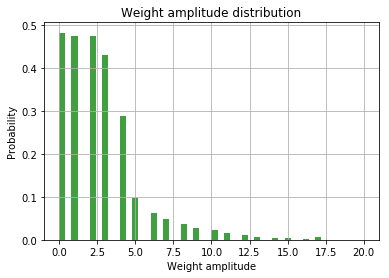

In [9]:
print_hist(torch.tensor(proj))

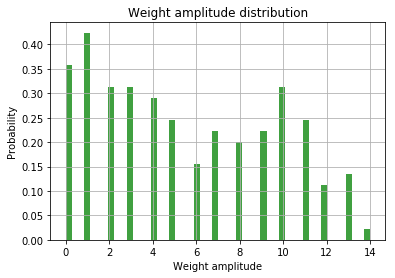

In [10]:
print_hist(torch.tensor(diag))

In [14]:
assert len(proj) == (784 + 1)
assert len(proj[0]) == len(diag)
assert len(diag[0]) == 4
model = (proj,diag)

with open('mnist/objects/ml_models/torch_dump.mlm', 'wb') as f:
    pickle.dump(model, f)